In [1]:
!pwd

/ix/djishnu/Zak/AIM1-2/O-PPI_jason_lab


In [ ]:
!conda create -n rapids-24.06 -c rapidsai -c nvidia -c conda-forge cudf=24.06 python=3.10 cudatoolkit=11.8
!conda activate rapids-24.06

In [3]:
!pip3 install --upgrade --force-reinstall pyarrow
!pip3 install matplotlib
!pip3 install Scipy
!pip3 install wordcloud 
!pip3 install pandas
!pip3 install scikit-learn
!pip3 install seaborn
!pip3 install biopython==1.79
!pip3 install prody
 bhh!pip3 install tensorly 
!pip3 install seaborn
!pip3 install prody

Defaulting to user installation because normal site-packages is not writeable
  Using cached pyarrow-21.0.0.tar.gz (1.1 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for pyarrow (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [880 lines of output]
      /scratch/slurm-1251457/pip-build-env-uuwb4yxa/overlay/lib/python3.10/site-packages/setuptools/config/_apply_pyprojecttoml.py:82: SetuptoolsDeprecationWarning: `project.license` as a TOML table is deprecated
      !!
      
              ********************************************************************************
              Please use a simple string containing a SPDX expression for `project.license`. You can also use `project.license-files`. (Both options available on setuptools>=77.0.0).
      
              By 2026-Feb-18, you need to update your project and r

In [7]:
# Load the beast!
#from CSG_object_V7 import OPPI
from CSG_object_V8 import OPPI
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.rcParams['text.usetex'] = False
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.figsize'] = (8.5, 8.5)
plt.rcParams['lines.markersize'] = 4
plt.rcParams['lines.linewidth'] = 1.5
#plt.rcParams['font.family'] = 'serif'
#plt.rcParams['font.serif'] = 'Computer Modern Roman'
plt.rcParams['font.size'] = 12
plt.rcParams['legend.title_fontsize'] = 'medium'

In [8]:
!conda env list

# conda environments:
#
base                  *  /ihome/crc/install/pytorch/2.0.1/python3.10
OPPI_env                 /ihome/djishnu/zakaria/.conda/envs/OPPI_env
rapids-23.12             /ihome/djishnu/zakaria/.conda/envs/rapids-23.12



# Load IL2 data

In [9]:
import prody as pr
import numpy as np

# Essentials
training_MSA_path = 'IL2_IL2RB_pfam_concat_alignment_refined.fasta'
parsed_msa = pr.parseMSA(training_MSA_path, aligned=True)
ind_ref = 427

# 5A interface IL2
IL2 = np.array([12, 13, 15, 16, 19, 20, 23,84, 87, 88, 91, 92, 95])-1+20
IL2RB = np.array([42, 41, 69, 70, 71, 72, 73, 74, 75, 133, 134, 136, 138, 188])-1+153+26
to_mutate = np.append(IL2, IL2RB)

## Trim MSA
end_il2_signaling = 20
end_il2 = 153
end_il2rb_signaling = 26
end_relevant_il2rb = 210 + end_il2 + end_il2rb_signaling
start_relevant_il2rb = end_il2 + end_il2rb_signaling

relevant_il2 = list(range(end_il2_signaling, end_il2))  
relevant_il2rb = list(range(start_relevant_il2rb, end_relevant_il2rb))
relevant_regions = relevant_il2 + relevant_il2rb

total_len_p1 = len(relevant_il2)
print('total_len IL2 = ', total_len_p1)
total_len_p2 = len(relevant_il2rb)
print('total_len IL2RB = ', total_len_p2)

parsed_msa_alternative = parsed_msa[:,relevant_regions]
#print(parsed_msa_alternative)

#SASA intreface IL2
il2rb_sasa_interface = np.array([41, 42, 70, 73, 74, 75, 133, 134, 188])-1+153-20
il2_sasa_interface = np.array([12, 15, 16, 19, 20, 23, 84, 88, 91, 95])-1
to_mutate_alternative = np.sort(np.append(il2_sasa_interface, il2rb_sasa_interface))

#Garcia interface
IL2_garcia = np.array([15, 16, 19, 20, 22, 23, 81, 88])-1
IL2RB_garcia = np.array([133, 134])-1+153-20
to_mutate_alternative = np.sort(np.append(IL2_garcia, IL2RB_garcia))
parsed_msa_alternative[427,:].getArray()[to_mutate_alternative]
#np.shape(parsed_msa_alternative.getArray())

@> 571 sequence(s) with 704 residues were parsed in 0.42s.


total_len IL2 =  133
total_len IL2RB =  210


array([b'E', b'H', b'L', b'D', b'Q', b'M', b'R', b'N', b'H', b'Y'],
      dtype='|S1')

# Load IL15 data

In [67]:
import prody as pr
import numpy as np

# Essentials
training_MSA_path = 'IL15_IL2RB_pfam_concat_alignment_refined.fasta'
parsed_msa = pr.parseMSA(training_MSA_path, aligned=True)
ind_ref = 952

## Trim MSA
gap_il15 = 9 
end_il15_signaling = 29 + gap_il15
end_il15 = 162
# 1 st index in pdb (6) correspond to uniprot (29)
#gap_il2rb = 7
end_il2rb_signaling = 8#+ gap_il2rb
end_relevant_il2rb = 210 + end_il15 + end_il2rb_signaling
start_relevant_il2rb = end_il15 + end_il2rb_signaling

relevant_il15 = list(range(end_il15_signaling, end_il15))  
relevant_il2rb = list(range(start_relevant_il2rb, end_relevant_il2rb))
relevant_regions = relevant_il15 + relevant_il2rb

total_len_p1 = len(relevant_il15)
print('total_len IL15 = ', total_len_p1)
total_len_p2 = len(relevant_il2rb)
print('total_len IL2RB = ', total_len_p2)

parsed_msa_alternative = parsed_msa[:,relevant_regions]

#SASA intreface IL15
numbering_pdb_start_il2rb = 6
il2rb_sasa_interface = np.array([41, 42, 70, 73, 74, 75, 133, 134, 136])-1+total_len_p1-15
il15_sasa_interface = np.array([1, 4, 7, 8, 65, 68, 69, 72])-1
to_mutate_alternative = np.sort(np.append(il15_sasa_interface, il2rb_sasa_interface))


@> 1064 sequence(s) with 625 residues were parsed in 0.01s.


total_len IL15 =  124
total_len IL2RB =  210


In [64]:
parsed_msa_alternative.getArray()[ind_ref, total_len_p1+133-16:total_len_p1+135-16]

array([b'H', b'Y'], dtype='|S1')

In [68]:
parsed_msa_alternative.getArray()[ind_ref, il2rb_sasa_interface]

array([b'T', b'S', b'S', b'L', b'T', b'T', b'H', b'Y', b'E'], dtype='|S1')

# Constrained Sequence Generator

In [10]:
import torch
torch.cuda.is_available()

True

In [14]:
import os
# Important 
output_path = 'interfaces/Garcia/multiple_chains_3/'
#'IL15_IL2RB/interfaces/sasa/single_replica_1/'
output_path_seqs = os.path.join(output_path, 'IL2_IL2RB_mutants_pfam_scaled.fasta')
os.system(f'mkdir {output_path}')

mkdir: cannot create directory ‘interfaces/Garcia/multiple_chains_3/’

256

: File exists


In [15]:
ind_ref = 427#952#
del_t=0.001*1e-2
T=2
lamda=0.0001
N_training_samples=5
steps_per_traj=10
n_seq_gen=100
kappa=50
num_uniform_random_sequences=100
#random_msa_path='5A_interface/random_mutants/random_mutants_sasa.fasta'
#'./IL15_IL2RB/interfaces/sasa/random_mutants/random_mutants_sasa.fasta'
random_msa_path = None
random_msa_dir = os.path.join(output_path, 'random_mutants')
#None#'interfaces/Garcia/multiple_chains_2/all_random_msa.fasta'
deletions=True
constraint=True
constraint_index= list(range(total_len_p1, parsed_msa_alternative.numResidues()))

oppi = OPPI(parsed_msa_alternative, del_t=del_t, steps_per_traj=steps_per_traj, n_seq_gen=n_seq_gen
            , N_training_samples=N_training_samples, T=T, lamda=lamda, random_msa_path=random_msa_path, 
            q_ind=to_mutate_alternative, ind_ref=ind_ref, kappa=kappa, deletions=deletions, random_msa_dir=random_msa_dir,
            num_uniform_random_sequences=num_uniform_random_sequences, constraint=constraint, constraint_index=constraint_index)

num sequences before cleaning =  571
Number of parameters in the model =  44310
If random_msa_dir option is specified a random MSA will be generated at that address 


/ix/djishnu/Zak/AIM1-2/O-PPI_jason_lab/CSG_object_V8.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.indices_1_21 = torch.tensor(torch.arange(1, len(self.alphabet_bytes)+1))
/ix/djishnu/Zak/AIM1-2/O-PPI_jason_lab/CSG_object_V8.py:59: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.alphabet_int = torch.tensor(torch.arange(0, len(self.alphabet_bytes)-1))


Generating 100 random sequences


@> 100 sequence(s) with 343 residues were parsed in 0.01s.


Random sample generated!
Random sample size =  100
Each CSG iteration will use 50000 random sequences
num sequences after cleaning =  559
The reference sequence corresponding to the following indices will be used to constraint the design of the 2nd sequence
[133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 2

### IMPORTANT: CHECK YOUR RANDOM MSA

In [16]:
str(oppi.random_msa[90])

'APTSSSTKKTQLQLKWLLNWLDPILNGINNYKNPKLTRMLTFKFYMPKKATELKHLQCLEEELKPLEEVLNLAQSKNFHLLPRDLISKINVIVLELKGSETTFMCEYADETATIVEFLNRWITFCQSIISTLTAVNGTSQFTCFYNSRANISCVWSQDGALQDTSCQVHAWPDRRRWNQTCELLPVSQASWACNLILGAPDSQKLTTVDIVTLRVLCREGVRWRVMAIQDFKPFENLRLMAPISLQVVHVETHRCNISWEISQASDKFERHLEFEARTLSPGHTWEEAPLLTLKQKQEWICLETLTPDTQYEFQVRVKPLQGEFTTWSPWSQPLAFRTKPAAL'

## Calculate couplings

In [17]:
kronecker_matrix = oppi.kronecker_matrix()

pre_freq_matrix_shape :  (21, 10)
3D tensor shape :  (333, 10, 1, 21)
4D tensor shape :  (10, 10, 21, 21)
CALCULATING 3D COUPLINGS
DONE CALCULATING 3D COUPLINGS


# Optimize CSG parameters (single replica)

/ix/djishnu/Zak/AIM1-2/O-PPI_jason_lab/CSG_object_V8.py:589: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  freq_vector = torch.tensor(freq_vector, requires_grad=True)#.clone().detach()#.requires_grad_(True)
/ix/djishnu/Zak/AIM1-2/O-PPI_jason_lab/CSG_object_V8.py:591: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  coupling_vector_2 = torch.tensor(coupling_vector_2, requires_grad=True)#.clone().detach()#.requires_grad_(True)


Mutants generated by Boltzmann-Dirichlet-Multinomial process!
Expected log prior =  tensor(-3.4441)
L2 penalty term =  tensor(4.3903, device='cuda:0', dtype=torch.float64, requires_grad=True)
HMC momentum =  tensor(104.8022, device='cuda:0')
k*(Ha - Hr)/T =  tensor(-3828957.0395, device='cuda:0', dtype=torch.float64)
k*(Hg - Hr)/T =  tensor(-3803244.8053, device='cuda:0', dtype=torch.float64)
k*Hcnst/T =  6562.725620254282
Sample - log likelihood (Ht/T) =  tensor(-7632201.8448, device='cuda:0', dtype=torch.float64)
Expected L2 regularized log likelihood  =  tensor(76391.5120, device='cuda:0', dtype=torch.float64,
       grad_fn=<AddBackward0>)
########################################
####################  TRAINING SAMPLE : 0 /5
U =  tensor([1.7195], device='cuda:0', grad_fn=<AddBackward0>)


/ix/djishnu/Zak/AIM1-2/O-PPI_jason_lab/CSG_object_V8.py:707: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  momenta_tensor = torch.tensor(momenta, requires_grad=True, dtype=torch.double)


Parameter optimization with Hamiltonian MC done!
Hamiltonian = [106.40435]
HMC kinetic Temperature = 0.0023625721223652363
Mutants generated by Boltzmann-Dirichlet-Multinomial process!
Expected log prior =  tensor(-0.9025)
L2 penalty term =  tensor(4.3903, device='cuda:0')
HMC momentum =  tensor(104.6856, device='cuda:0')
k*(Ha - Hr)/T =  tensor(-3829267.8550, device='cuda:0', dtype=torch.float64)
k*(Hg - Hr)/T =  tensor(-3801895.7672, device='cuda:0', dtype=torch.float64)
k*Hcnst/T =  8072.448130066671
Sample - log likelihood (Ht/T) =  tensor(-7631163.6222, device='cuda:0', dtype=torch.float64)
Expected L2 regularized log likelihood  =  tensor(76396.2275, device='cuda:0', dtype=torch.float64)
E1 ( - ELBO i) =  tensor(-76394.9560, device='cuda:0', dtype=torch.float64,
       grad_fn=<NegBackward0>)
E2 (- ELBO i+1) =  tensor(-76397.1300, device='cuda:0', dtype=torch.float64)
Move accepted! M-H criterion = 8.793045635216412
########################################
####################  T

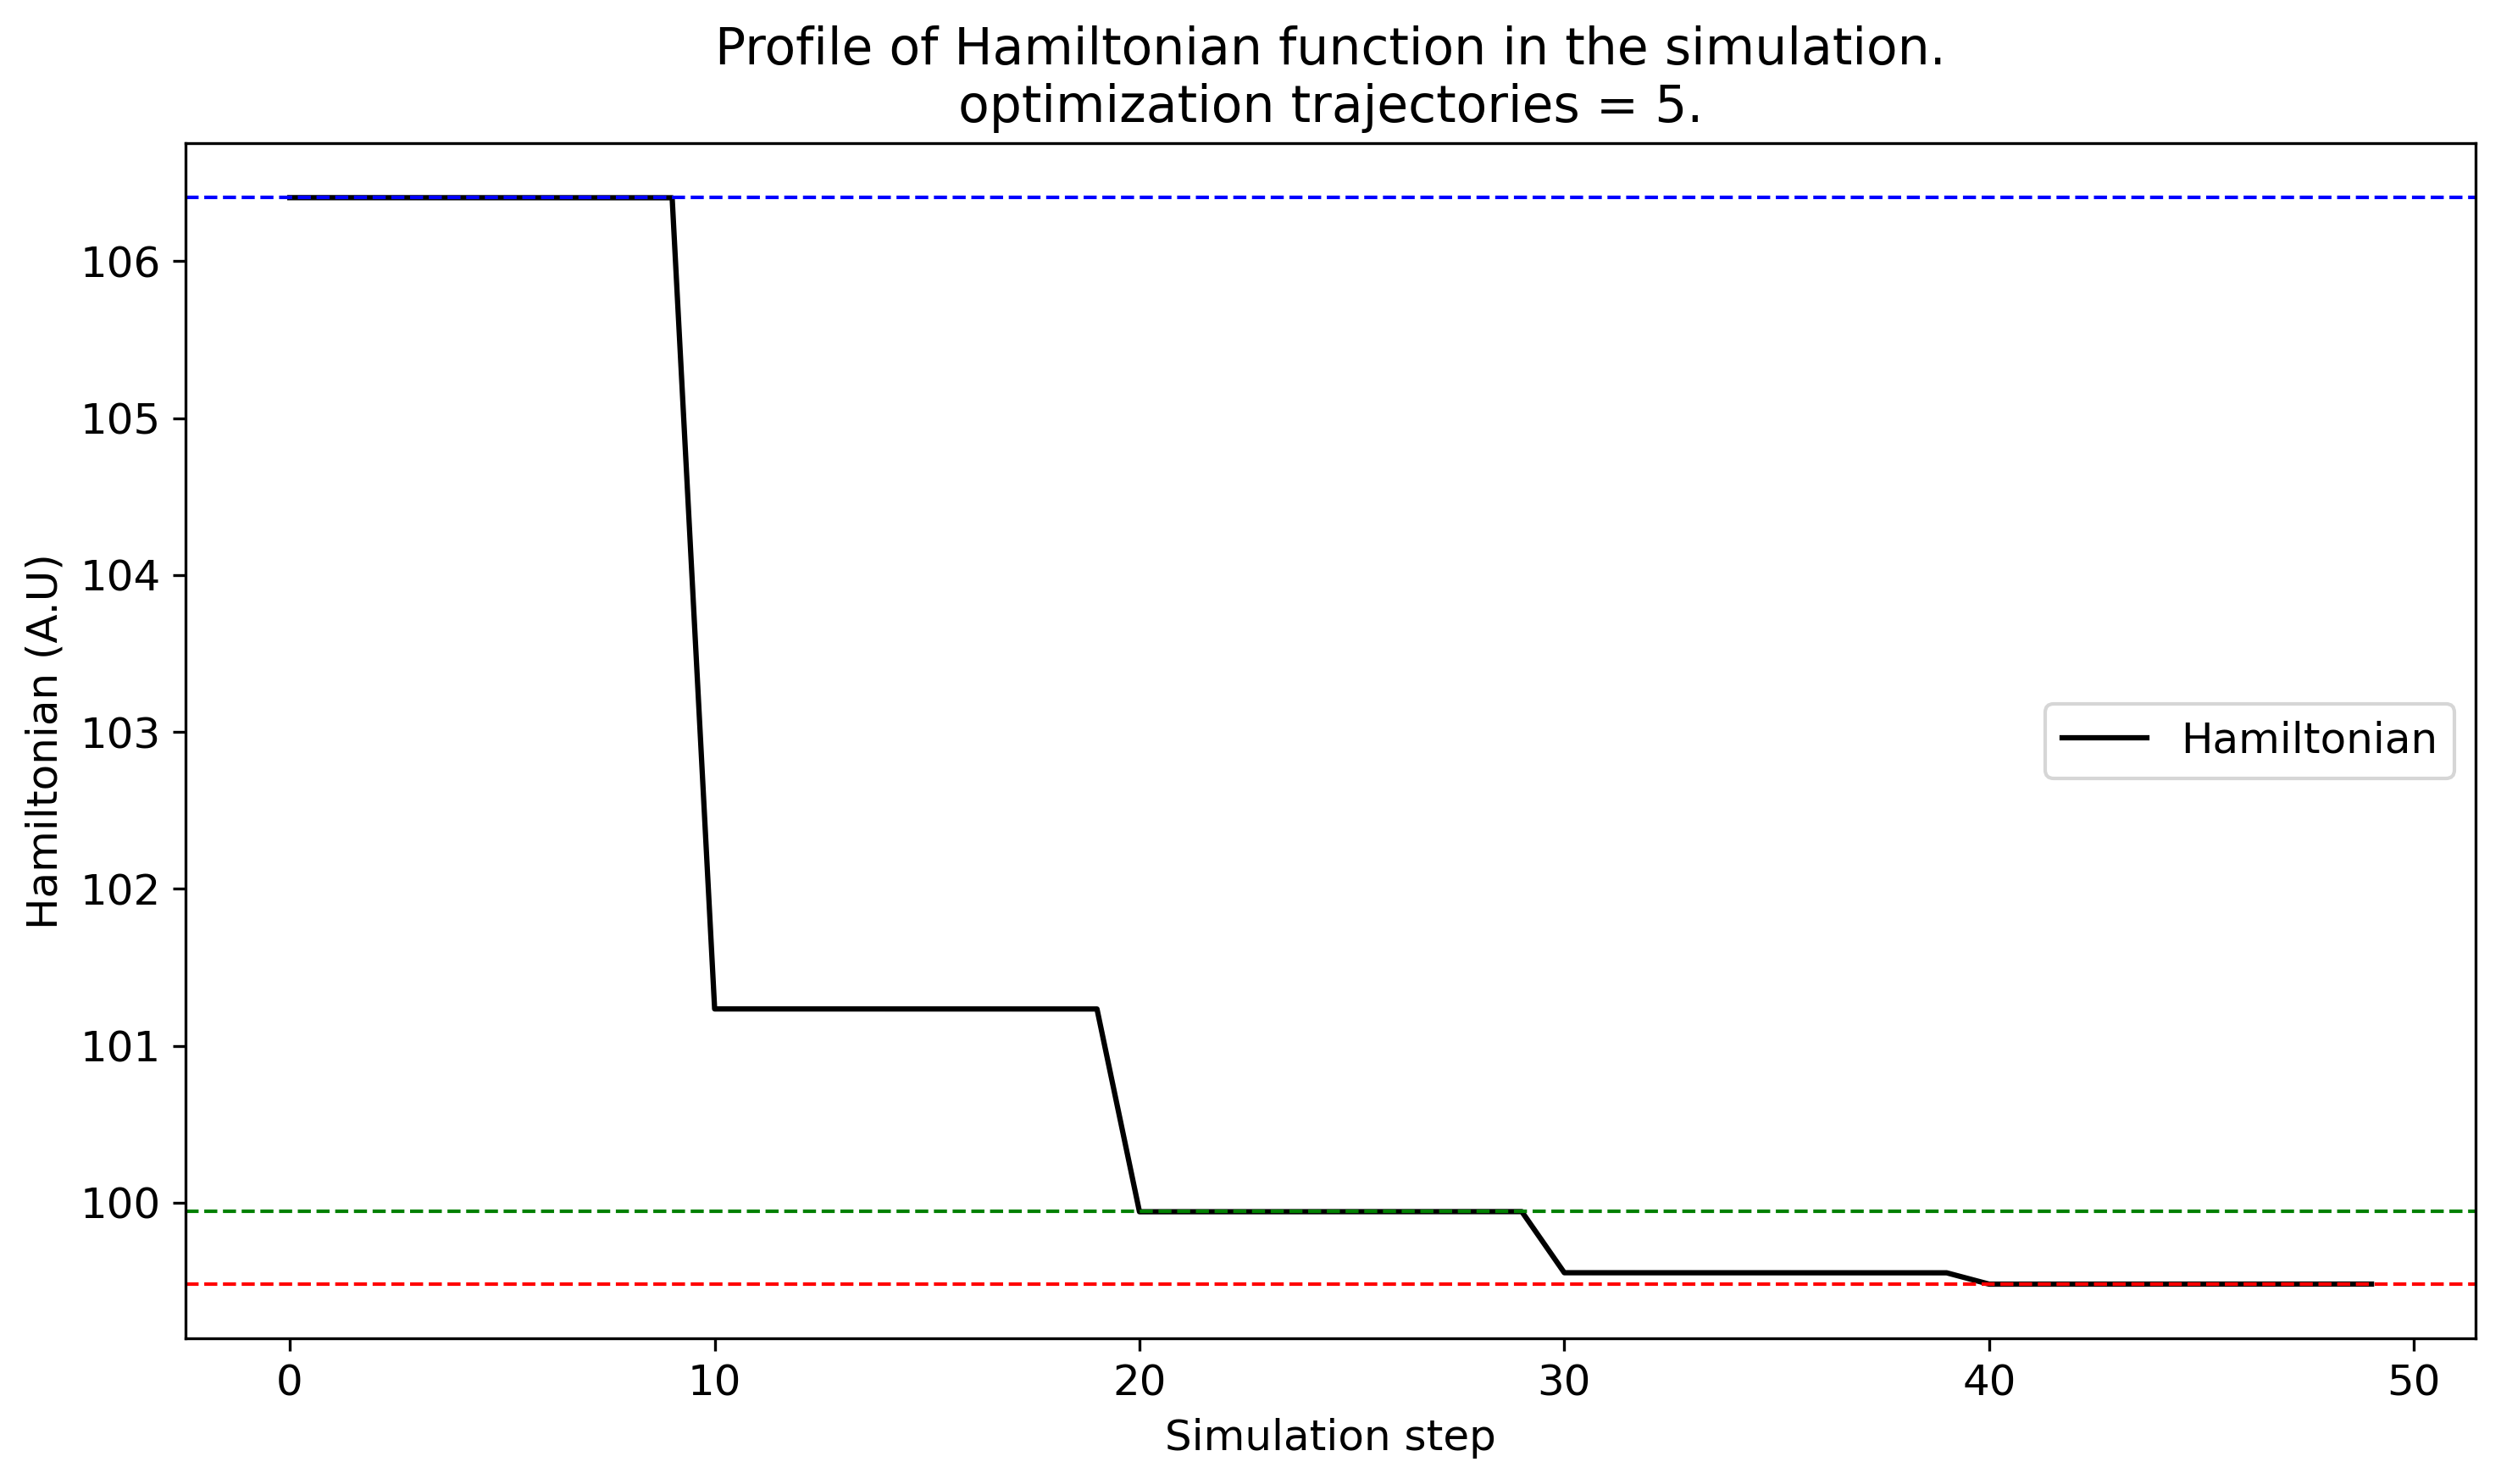

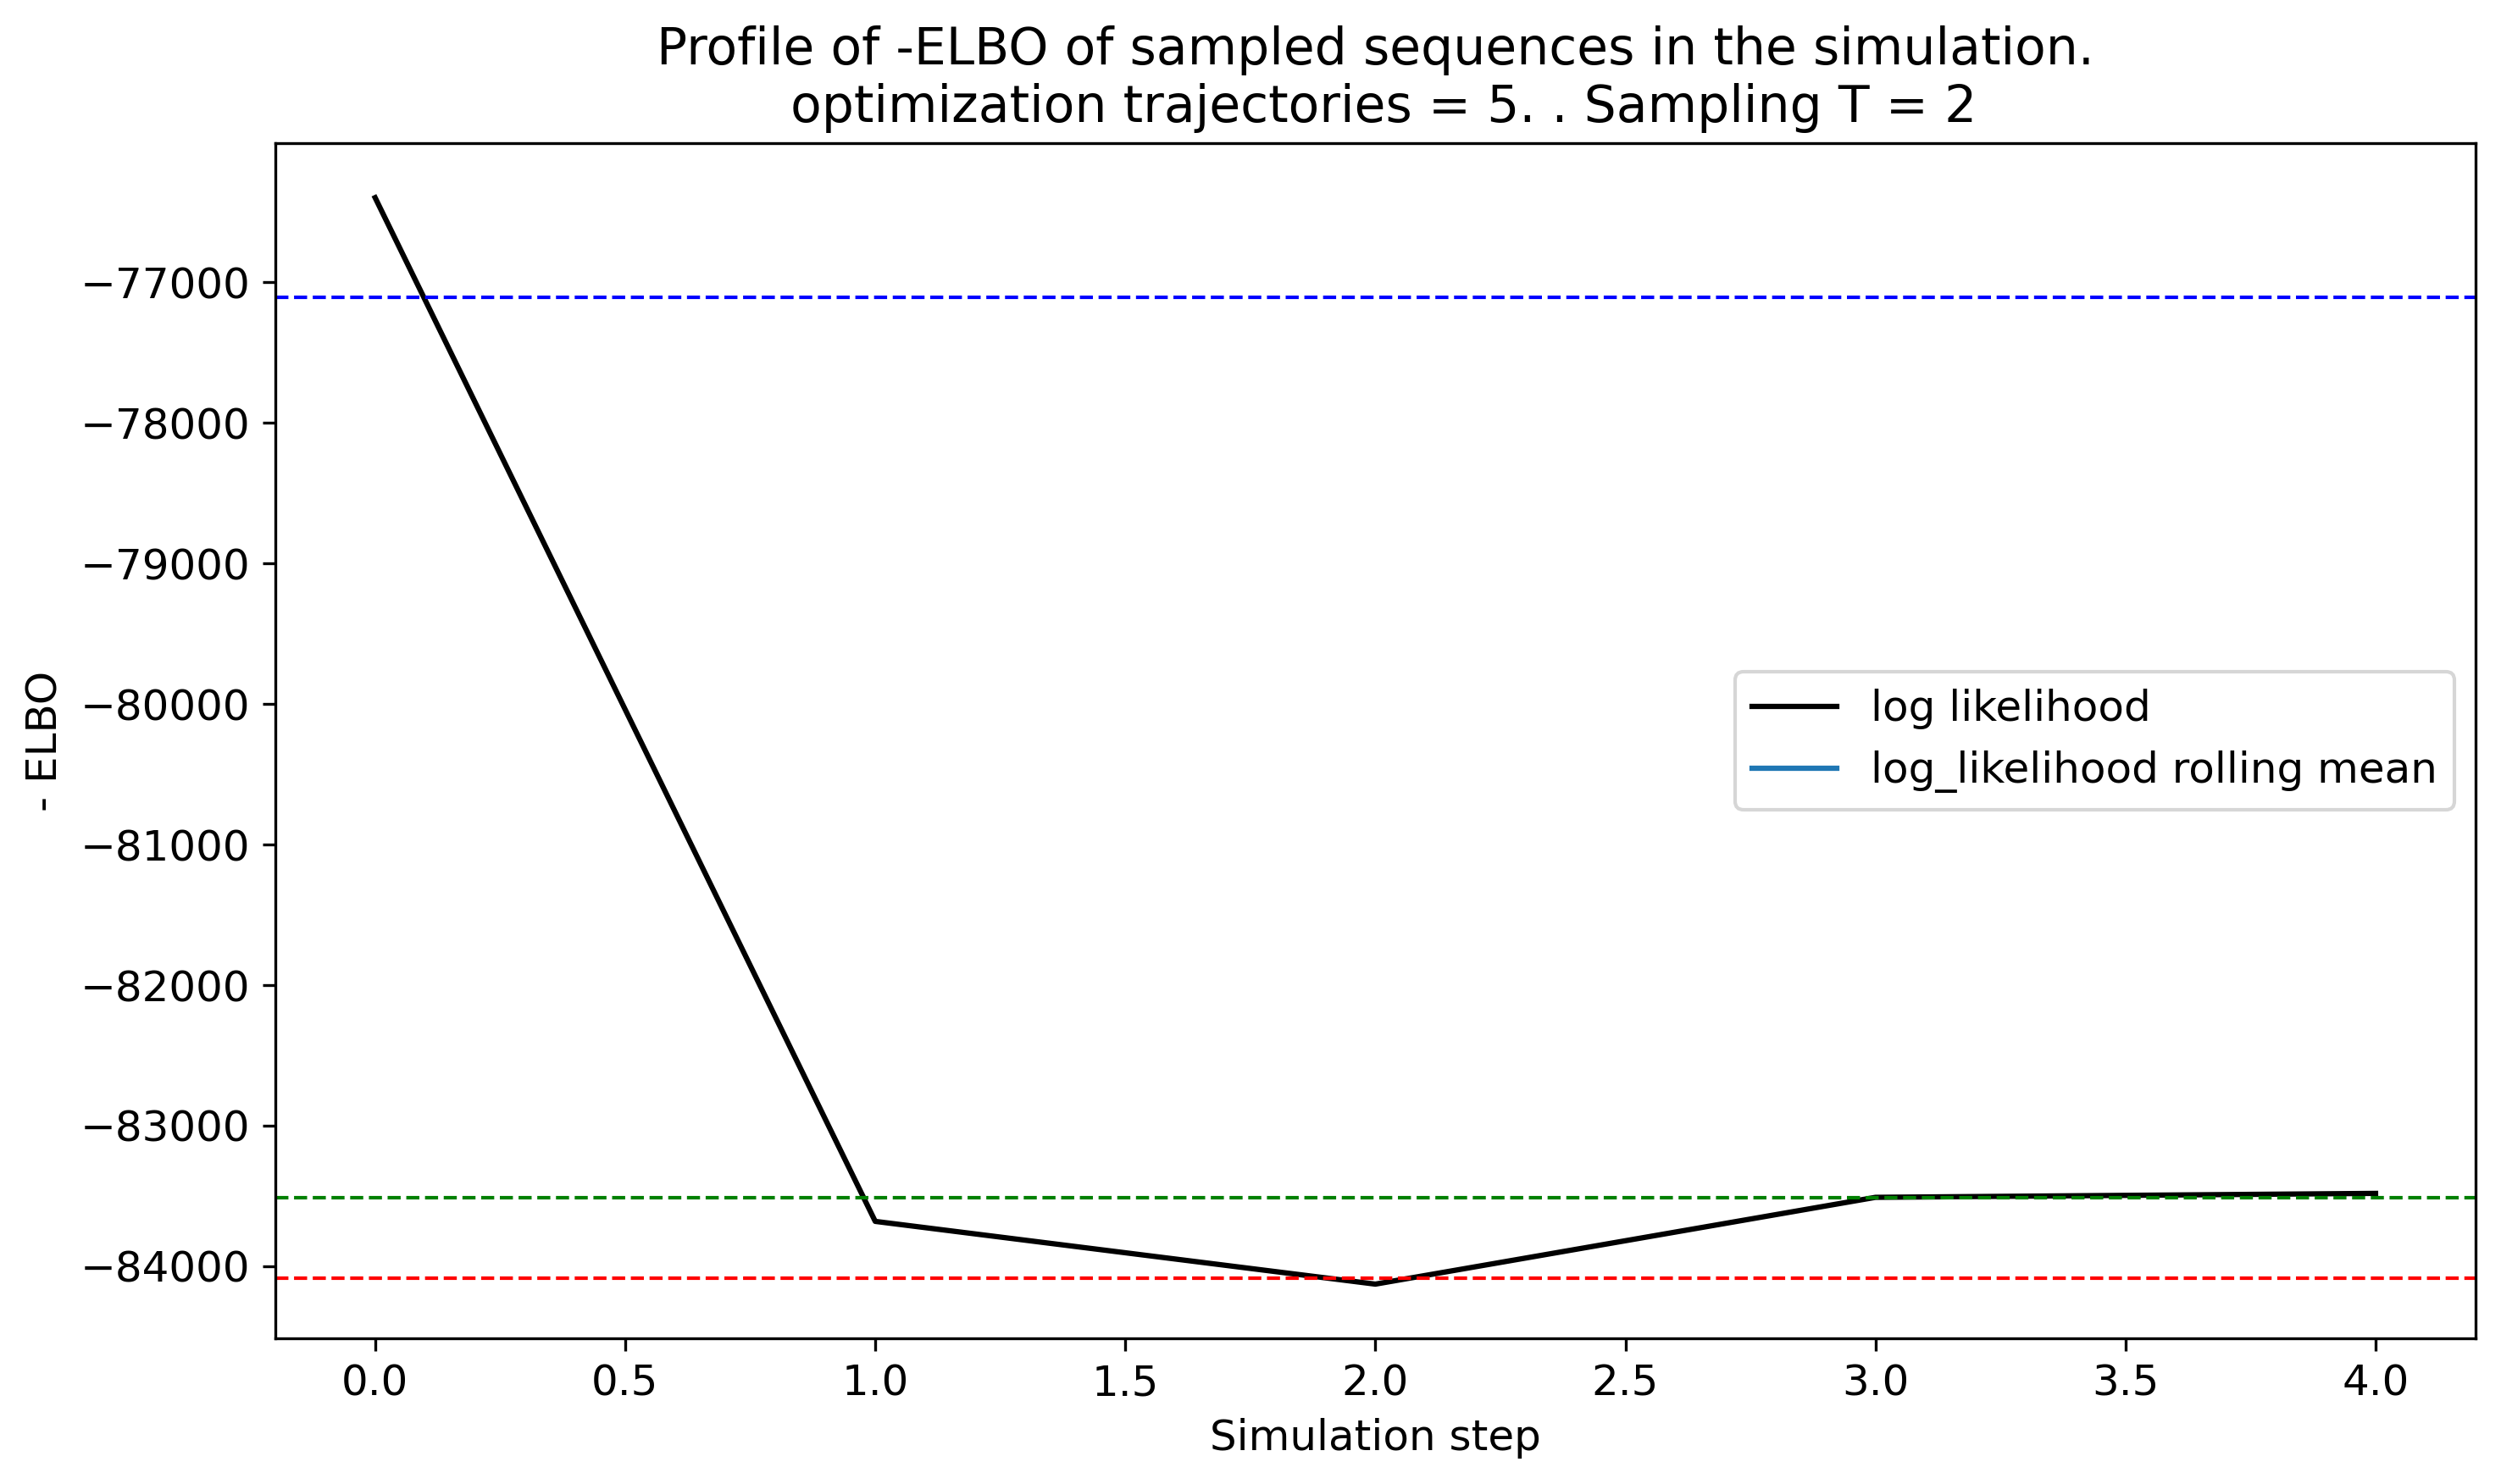

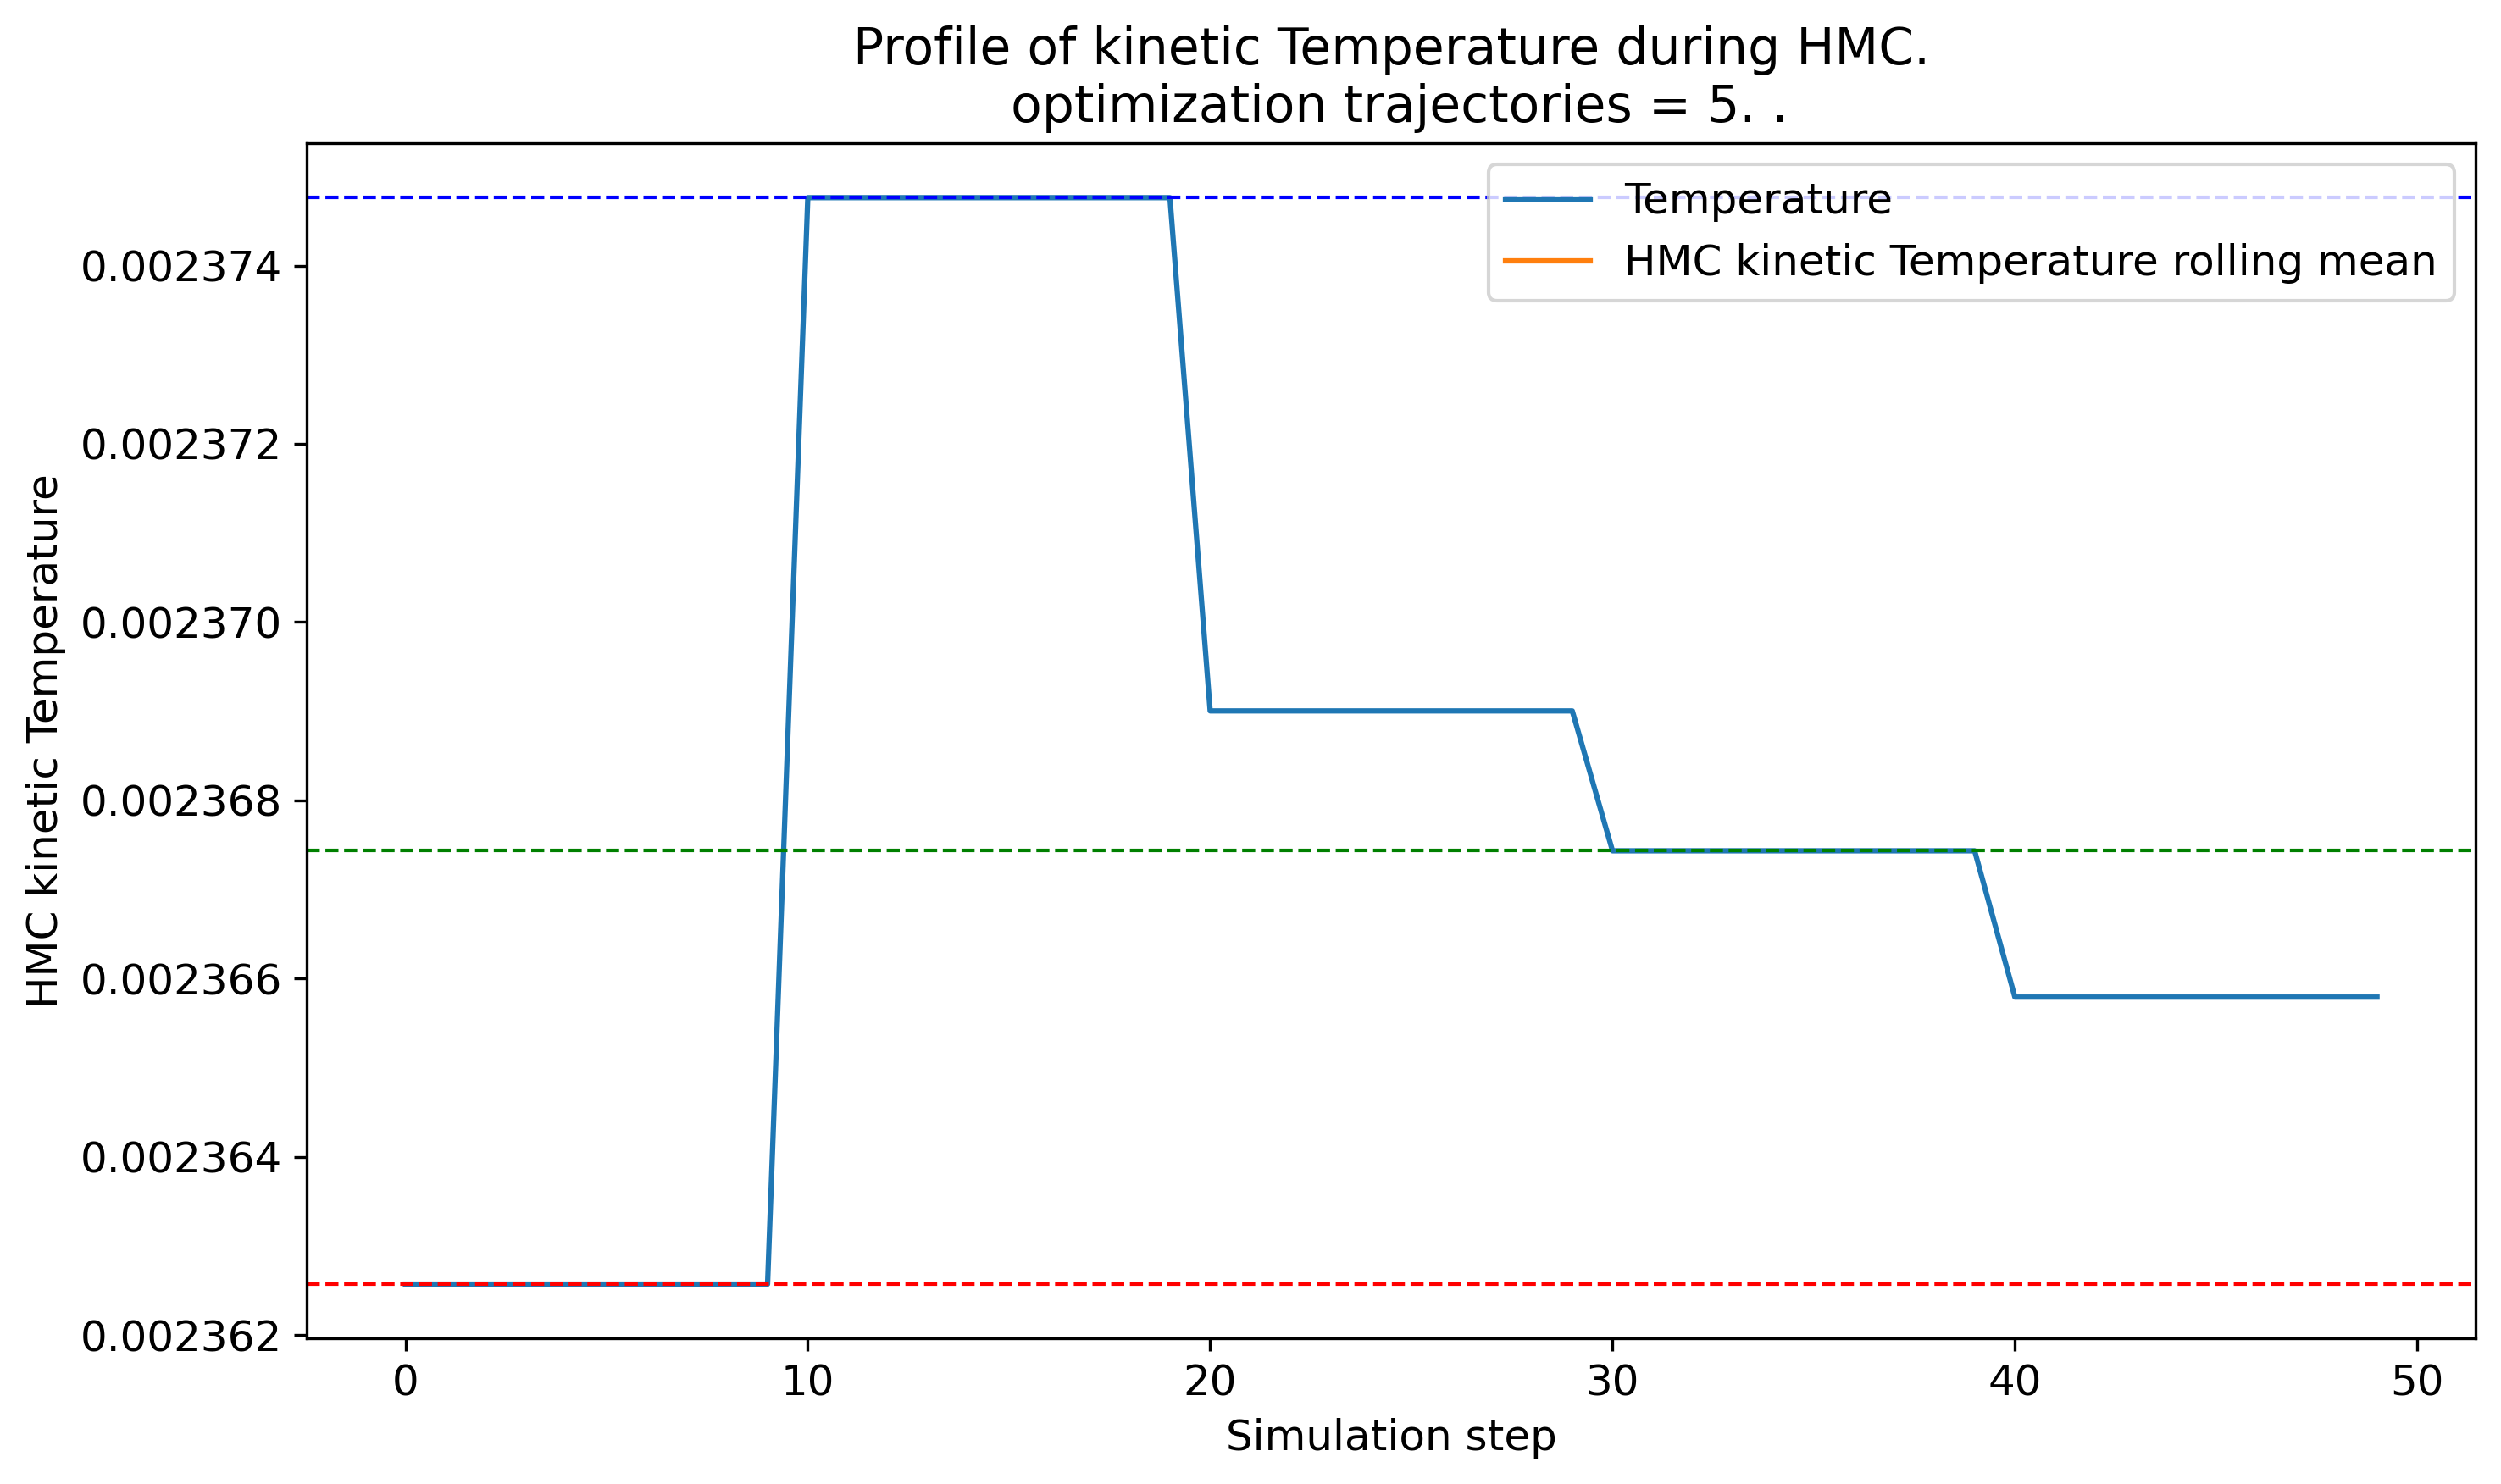

In [9]:
reduced = True
minibatch_integration = False
output_path_params = os.path.join(output_path, 'csg_parameters.npy')
#Optimize model
hmc_result = oppi.HamiltonianMC(kronecker_matrix=kronecker_matrix, reduced=reduced, minibatch_integration=minibatch_integration)#
#Save BDM training sample
first_mutants = pr.MSA(hmc_result[0])
pr.writeMSA(output_path_seqs, first_mutants)

expected_proba_mat = hmc_result[-1]
coupling_data = hmc_result[-2]
frequencies_i = coupling_data[0]

if not reduced:
    couplings_i = coupling_data[1]
    couplings_2_i = coupling_data[2]
    freq_matrix_dimension = coupling_data[3]
else:
    couplings_2_i = coupling_data[1]
    freq_matrix_dimension = coupling_data[2]
    couplings_i = None

oppi.write_param(output_path_params=output_path_params, reduced=reduced, frequencies_i=frequencies_i, 
                 couplings_i=couplings_i, couplings_2_i=couplings_2_i, expected_proba_mat=expected_proba_mat)

oppi.simulation_QC(hmc_result=hmc_result, dump_dir=output_path)

# Sample or read in CSG mutant sample (single replica)

In [8]:
import os
# Important 
output_path = 'interfaces/test_folder/'
#'IL15_IL2RB/interfaces/sasa/single_replica_1/'
output_path_seqs = os.path.join(output_path, 'IL2_IL2RB_mutants_pfam_scaled.fasta')
os.system(f'mkdir {output_path}')

mkdir: cannot create directory ‘interfaces/test_folder/’: File exists


256

In [13]:
reduced = True
minibatch_integration = False
bdm_sample = True
bdm_sampling=100
generic_mutant_file_name='IL2_IL2RB_mutants_pfam_scaled.fasta'
#generic_mutant_file_name='IL2_IL2RB_mutants_pfam_scaled_FINAL_SAMPLE_3.fasta'

output_path_params = os.path.join(output_path, 'csg_parameters.npy')
hmc_result = oppi.read_replica_param(output_path_params=output_path_params, kronecker_matrix=kronecker_matrix, reduced=reduced)

############################## SAVE MODEL PARAMETERS ########################################################
expected_proba_mat = hmc_result[-1]
coupling_data = hmc_result[-2]
evol_param_tuple = hmc_result[0]

frequencies_i = coupling_data[0]

if not reduced:
    couplings_i = coupling_data[1]
    couplings_2_i = coupling_data[2]
else:
    couplings_2_i = coupling_data[1]
    couplings_i = None


#def Replica_sample(self, where:str, reduced:bool, generic_mutant_file_name:str, kronecker_matrix:tuple, output_path:str, 
#                       bdm_sampling=10e6, bdm_sample=True, chain=00, type_='random')
#return (generated_i, individual_hamiltonians)

replica_result = oppi.Replica_sample(where=output_path, reduced=reduced, generic_mutant_file_name=generic_mutant_file_name,#IL2_IL2RB_mutants_pfam_scaled_FINAL_SAMPLE_3.fasta 
                                     kronecker_matrix=kronecker_matrix, output_path=output_path, bdm_sampling=bdm_sampling, 
                                     bdm_sample=bdm_sample, type_='random')


[Errno 2] No such file or directory: 'interfaces/test_folder/training_samples/csg_parameters.npy'
Trying the following address for replica parameters: interfaces/test_folder/csg_parameters.npy
ok
Mutants generated by Boltzmann-Dirichlet-Multinomial process!
Expected log prior =  tensor(-1.0810)
L2 penalty term =  0
HMC momentum =  tensor([0.])
k*(Ha - Hr)/T =  0
k*(Hg - Hr)/T =  155.86842494753506
k*Hcnst/T =  163.47364484138677
Sample - log likelihood (Ht/T) =  155.86842494753506
Expected L2 regularized log likelihood  =  tensor([0.0761], device='cuda:0')


# calc loglikelihood random sequences single replica

In [15]:
output_path_params = os.path.join(output_path, 'csg_parameters.npy')
type_='random'
random_msa_path = os.path.join(output_path, 'random_mutants/random_mutants.fasta')

random_results = oppi.calc_energy_replica(output_path_params=output_path_params, reduced=reduced, 
                                              kronecker_matrix_=kronecker_matrix, 
                                              type_=type_, msa_path=random_msa_path, chain=0)

#pr.writeMSA(os.path.join(output_path, 'random_msa.fasta'), random_results[1])
random_results[0].to_csv(os.path.join(output_path, 'random_seq_energy.csv'))
df_random = random_results[0]
msa_random = random_results[1]

@> 1000000 sequence(s) with 343 residues were parsed in 6.18s.


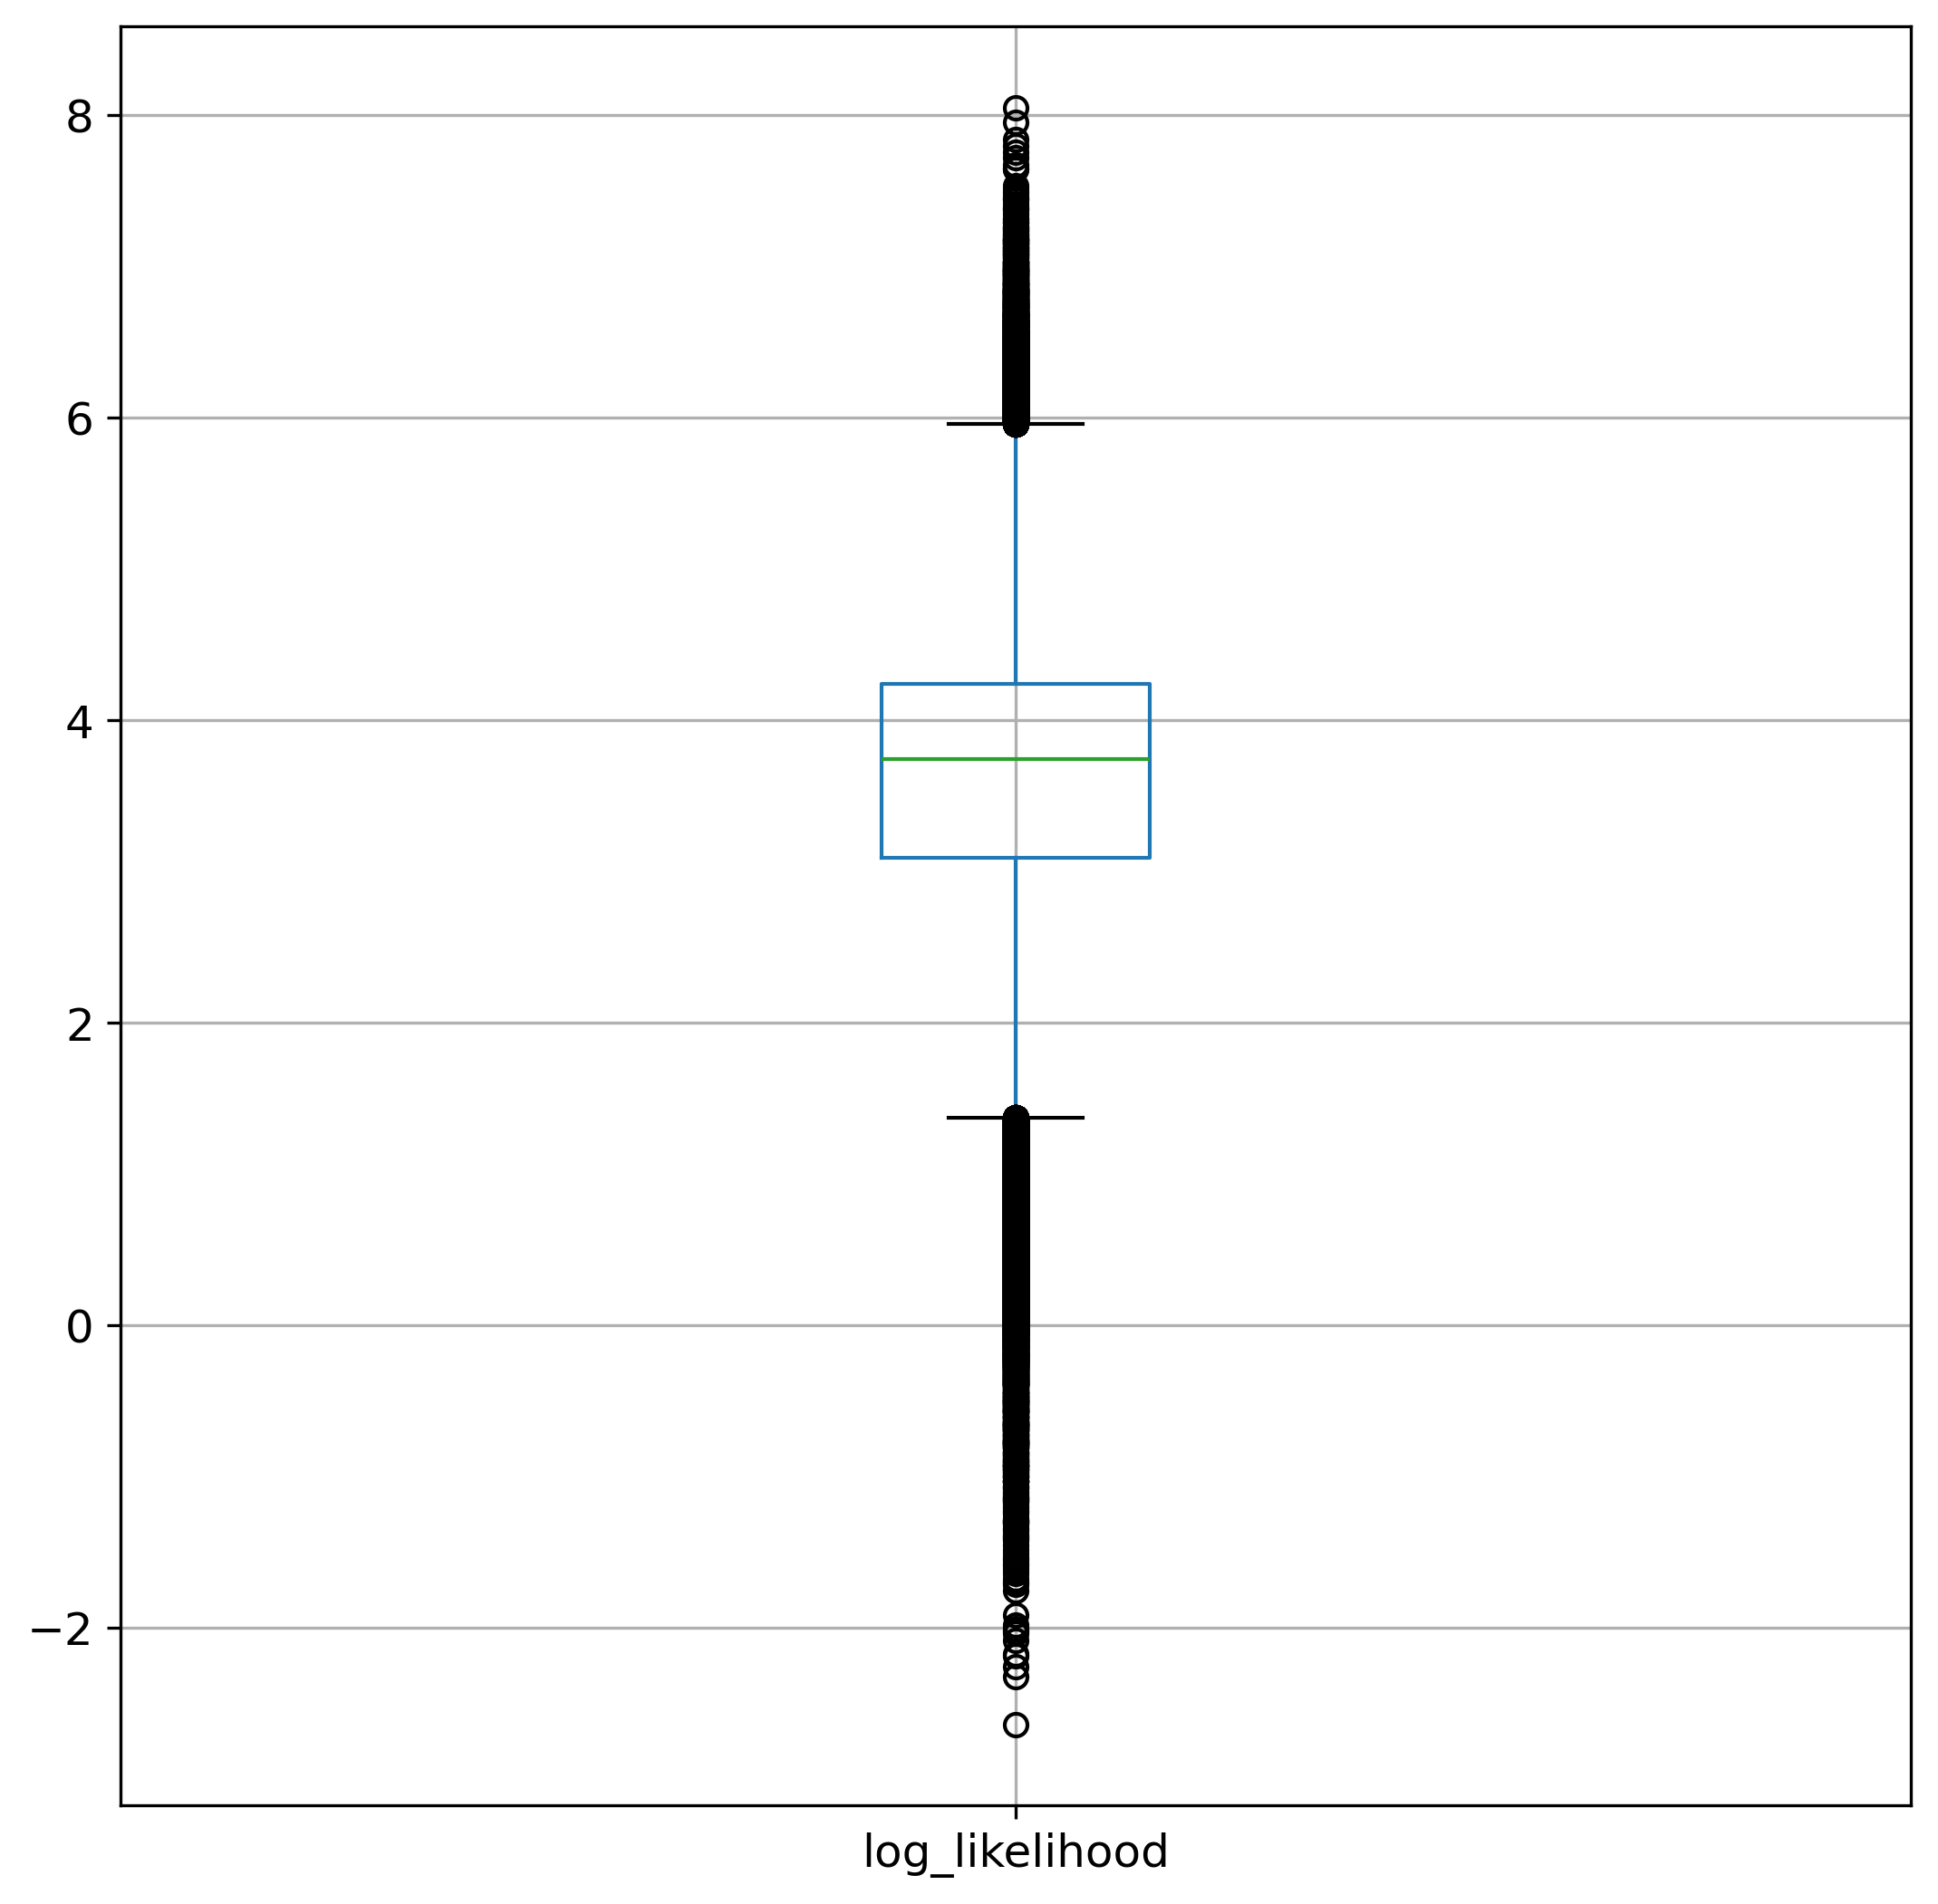

In [16]:
plt.show(random_results[0].boxplot('log_likelihood'))

/ihome/djishnu/zakaria/.local/lib/python3.10/site-packages/numpy/core/_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


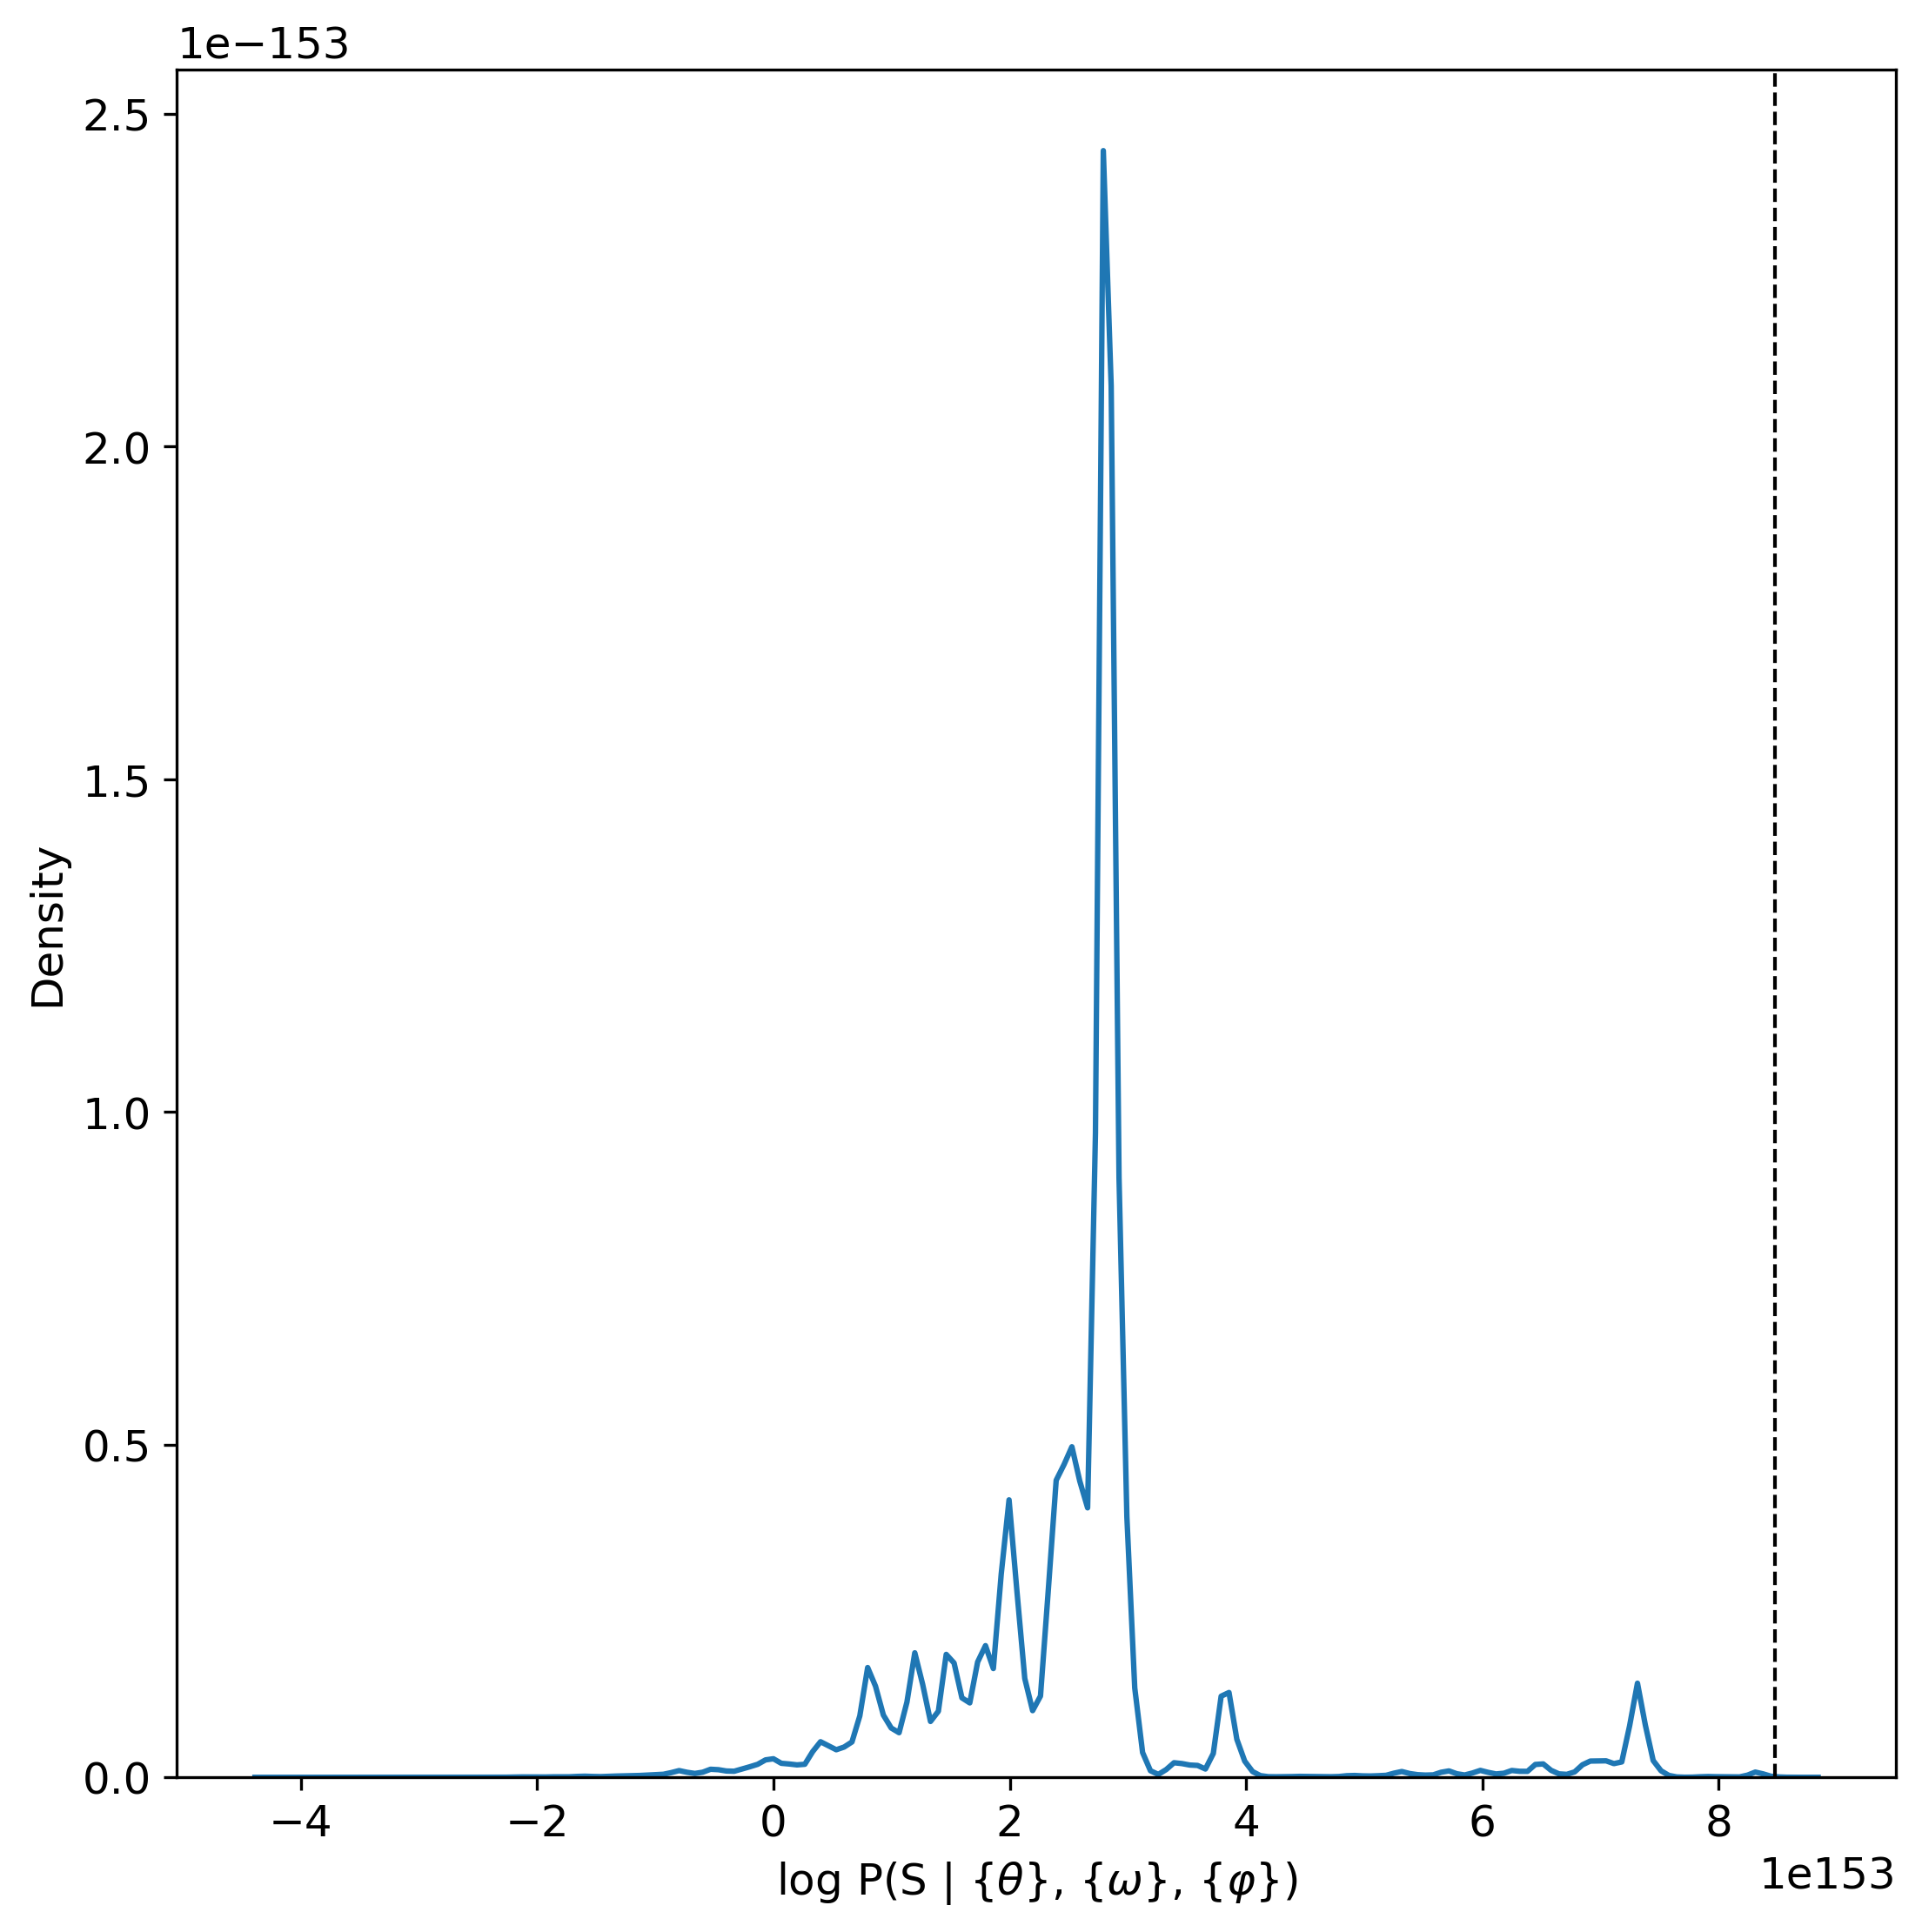

In [46]:
sns.kdeplot(data=df_random, x='log_likelihood')#, hue='label')#, legend=False)#, stat='density', kde=True)
confidence_threshold = 0.99995
lower = df_random['log_likelihood'].quantile(confidence_threshold)
plt.axvline(x=lower, color='black', linestyle='--', linewidth=1, label='95%')
plt.xlabel("log P(S | {$\\theta$}, {$\\omega$}, {$\\varphi$})")
#plt.savefig(f'{output_path}/energy_hist_rand_2.png')
plt.show()

In [59]:
#ind_unique = pr.uniqueSequences(generated)
confidence_threshold = 0.99999
print('Random hit confidence threshold = ', confidence_threshold)
#generated_df = generated_df.loc[ind_unique,:]
generated_hit_threshold = df_random['log_likelihood'].quantile(confidence_threshold)
print('log likelihood threshold value = ', generated_hit_threshold)
generated_hit_ind = df_random['log_likelihood']> generated_hit_threshold
generated_hits = df_random.loc[generated_hit_ind,:]

top100_gen_index = np.array(generated_hits.index)
generated_top100 = msa_random[top100_gen_index]

Random hit confidence threshold =  0.99999
log likelihood threshold value =  8.5244375231386e+153


In [61]:
pr.writeMSA(os.path.join(output_path, 'random_hits.fasta'), generated_top100)

'interfaces/Garcia/multiple_chains_3/chain_6/random_hits.fasta'

In [12]:
output_path = 'interfaces/Garcia/multiple_chains_3/'

# Read in and calculate log likelihood of multireplica samples

In [ ]:
ind_ref = 427#952#
del_t=0.001*1e-2
T=2
lamda=0.0001
N_training_samples=5
steps_per_traj=10
bdm_sampling=int(10e6)
n_seq_gen=bdm_sampling
kappa=50
num_uniform_random_sequences=25000000
random_msa_path = 'random_mutants/random_mutants.fasta'#random_hits.fasta'#
deletions=True
constraint=True
constraint_index= list(range(total_len_p1, parsed_msa_alternative.numResidues()))

oppi = OPPI(parsed_msa_alternative, del_t=del_t, steps_per_traj=steps_per_traj, n_seq_gen=n_seq_gen
            , N_training_samples=N_training_samples, T=T, lamda=lamda, random_msa_path=random_msa_path, 
            q_ind=to_mutate_alternative, ind_ref=ind_ref, kappa=kappa, deletions=deletions, 
            num_uniform_random_sequences=num_uniform_random_sequences, constraint=constraint, constraint_index=constraint_index)

#kronecker_matrix = oppi.kronecker_matrix()

reduced = True
bdm_sample = True
generic_mutant_file_name = 'IL2_IL2RB_mutants_pfam_scaled_FINAL_SAMPLE_3.fasta'
output_df_name = 'per_chain_sampled_seq_log_likelihood_3MR.csv'

oppi.Multi_replica_sample(kronecker_matrix=kronecker_matrix, where=output_path, reduced=reduced, 
                          generic_mutant_file_name=generic_mutant_file_name, bdm_sampling=bdm_sampling, 
                          bdm_sample=bdm_sample, output_df_name=output_df_name, type_='generated')

generated_df = pd.read_csv(os.path.join(output_path, output_df_name))
generated_df['log_likelihood'] = -1*generated_df['log_likelihood']
generated_df.to_csv(os.path.join(output_path, output_df_name))

num sequences before cleaning =  571


/ix/djishnu/Zak/AIM1-2/O-PPI_jason_lab/CSG_object_V8.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.indices_1_21 = torch.tensor(torch.arange(1, len(self.alphabet_bytes)+1))
/ix/djishnu/Zak/AIM1-2/O-PPI_jason_lab/CSG_object_V8.py:59: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.alphabet_int = torch.tensor(torch.arange(0, len(self.alphabet_bytes)-1))


Number of parameters in the model =  44310


@> 10000000 sequence(s) with 343 residues were parsed in 33.92s.


Random sample size =  10000000
Each CSG iteration will use 50000 random sequences
num sequences after cleaning =  559
The reference sequence corresponding to the following indices will be used to constraint the design of the 2nd sequence
[133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 2

In [18]:
generic_mutant_file_name = 'IL2_IL2RB_mutants_pfam_scaled_FINAL_SAMPLE_3.fasta'
output_df_name = 'per_chain_sampled_seq_log_likelihood_3MR.csv'
output_gen_msa_name = 'generated_hits_MR2.fasta'

generated_df = pd.read_csv(os.path.join(output_path, output_df_name))
generated = oppi.collect_MR_samples(where=output_path, generic_mutant_file_name=generic_mutant_file_name, type_='generated')[0]
uniq_ind = pr.uniqueSequences(generated)
generated = generated[uniq_ind]
generated_df = generated_df.iloc[uniq_ind,:].reset_index()
pr.writeMSA(os.path.join(output_path, output_gen_msa_name), generated)
generated

interfaces/Garcia/multiple_chains_3/chain_15/./


@> 113 sequence(s) with 343 residues were parsed in 0.42s.
@> 110 sequence(s) with 343 residues were parsed in 0.01s.
@> 118 sequence(s) with 343 residues were parsed in 0.03s.


interfaces/Garcia/multiple_chains_3/chain_1/./
Unable to process chain 1 because of the following error : 
[Errno 2] No such file or directory: 'interfaces/Garcia/multiple_chains_3/chain_1/./IL2_IL2RB_mutants_pfam_scaled_FINAL_SAMPLE_3.fasta'
interfaces/Garcia/multiple_chains_3/chain_20/./
Unable to process chain 20 because of the following error : 
[Errno 2] No such file or directory: 'interfaces/Garcia/multiple_chains_3/chain_20/./IL2_IL2RB_mutants_pfam_scaled_FINAL_SAMPLE_3.fasta'
interfaces/Garcia/multiple_chains_3/chain_12/./
interfaces/Garcia/multiple_chains_3/chain_6/./
interfaces/Garcia/multiple_chains_3/chain_18/./


@> 105 sequence(s) with 343 residues were parsed in 0.17s.
@> 120 sequence(s) with 343 residues were parsed in 0.19s.


interfaces/Garcia/multiple_chains_3/chain_8/./
interfaces/Garcia/multiple_chains_3/chain_2/./
interfaces/Garcia/multiple_chains_3/chain_16/./
Unable to process chain 16 because of the following error : 
[Errno 2] No such file or directory: 'interfaces/Garcia/multiple_chains_3/chain_16/./IL2_IL2RB_mutants_pfam_scaled_FINAL_SAMPLE_3.fasta'
interfaces/Garcia/multiple_chains_3/chain_5/./


@> 118 sequence(s) with 343 residues were parsed in 0.05s.
@> 108 sequence(s) with 343 residues were parsed in 0.02s.
@> 120 sequence(s) with 343 residues were parsed in 0.02s.
@> 112 sequence(s) with 343 residues were parsed in 0.04s.


interfaces/Garcia/multiple_chains_3/chain_11/./
interfaces/Garcia/multiple_chains_3/chain_19/./
interfaces/Garcia/multiple_chains_3/chain_7/./


@> 95 sequence(s) with 343 residues were parsed in 0.20s.


interfaces/Garcia/multiple_chains_3/chain_13/./


@> 95 sequence(s) with 343 residues were parsed in 0.04s.
@> 103 sequence(s) with 343 residues were parsed in 0.06s.


interfaces/Garcia/multiple_chains_3/chain_14/./
interfaces/Garcia/multiple_chains_3/chain_10/./


@> 101 sequence(s) with 343 residues were parsed in 0.04s.
@> 101 sequence(s) with 343 residues were parsed in 0.03s.


interfaces/Garcia/multiple_chains_3/chain_4/./
Unable to process chain 4 because of the following error : 
[Errno 2] No such file or directory: 'interfaces/Garcia/multiple_chains_3/chain_4/./IL2_IL2RB_mutants_pfam_scaled_FINAL_SAMPLE_3.fasta'
interfaces/Garcia/multiple_chains_3/chain_17/./
interfaces/Garcia/multiple_chains_3/chain_3/./
interfaces/Garcia/multiple_chains_3/chain_9/./


<MSA: Unknown (59 sequences, 343 residues)>

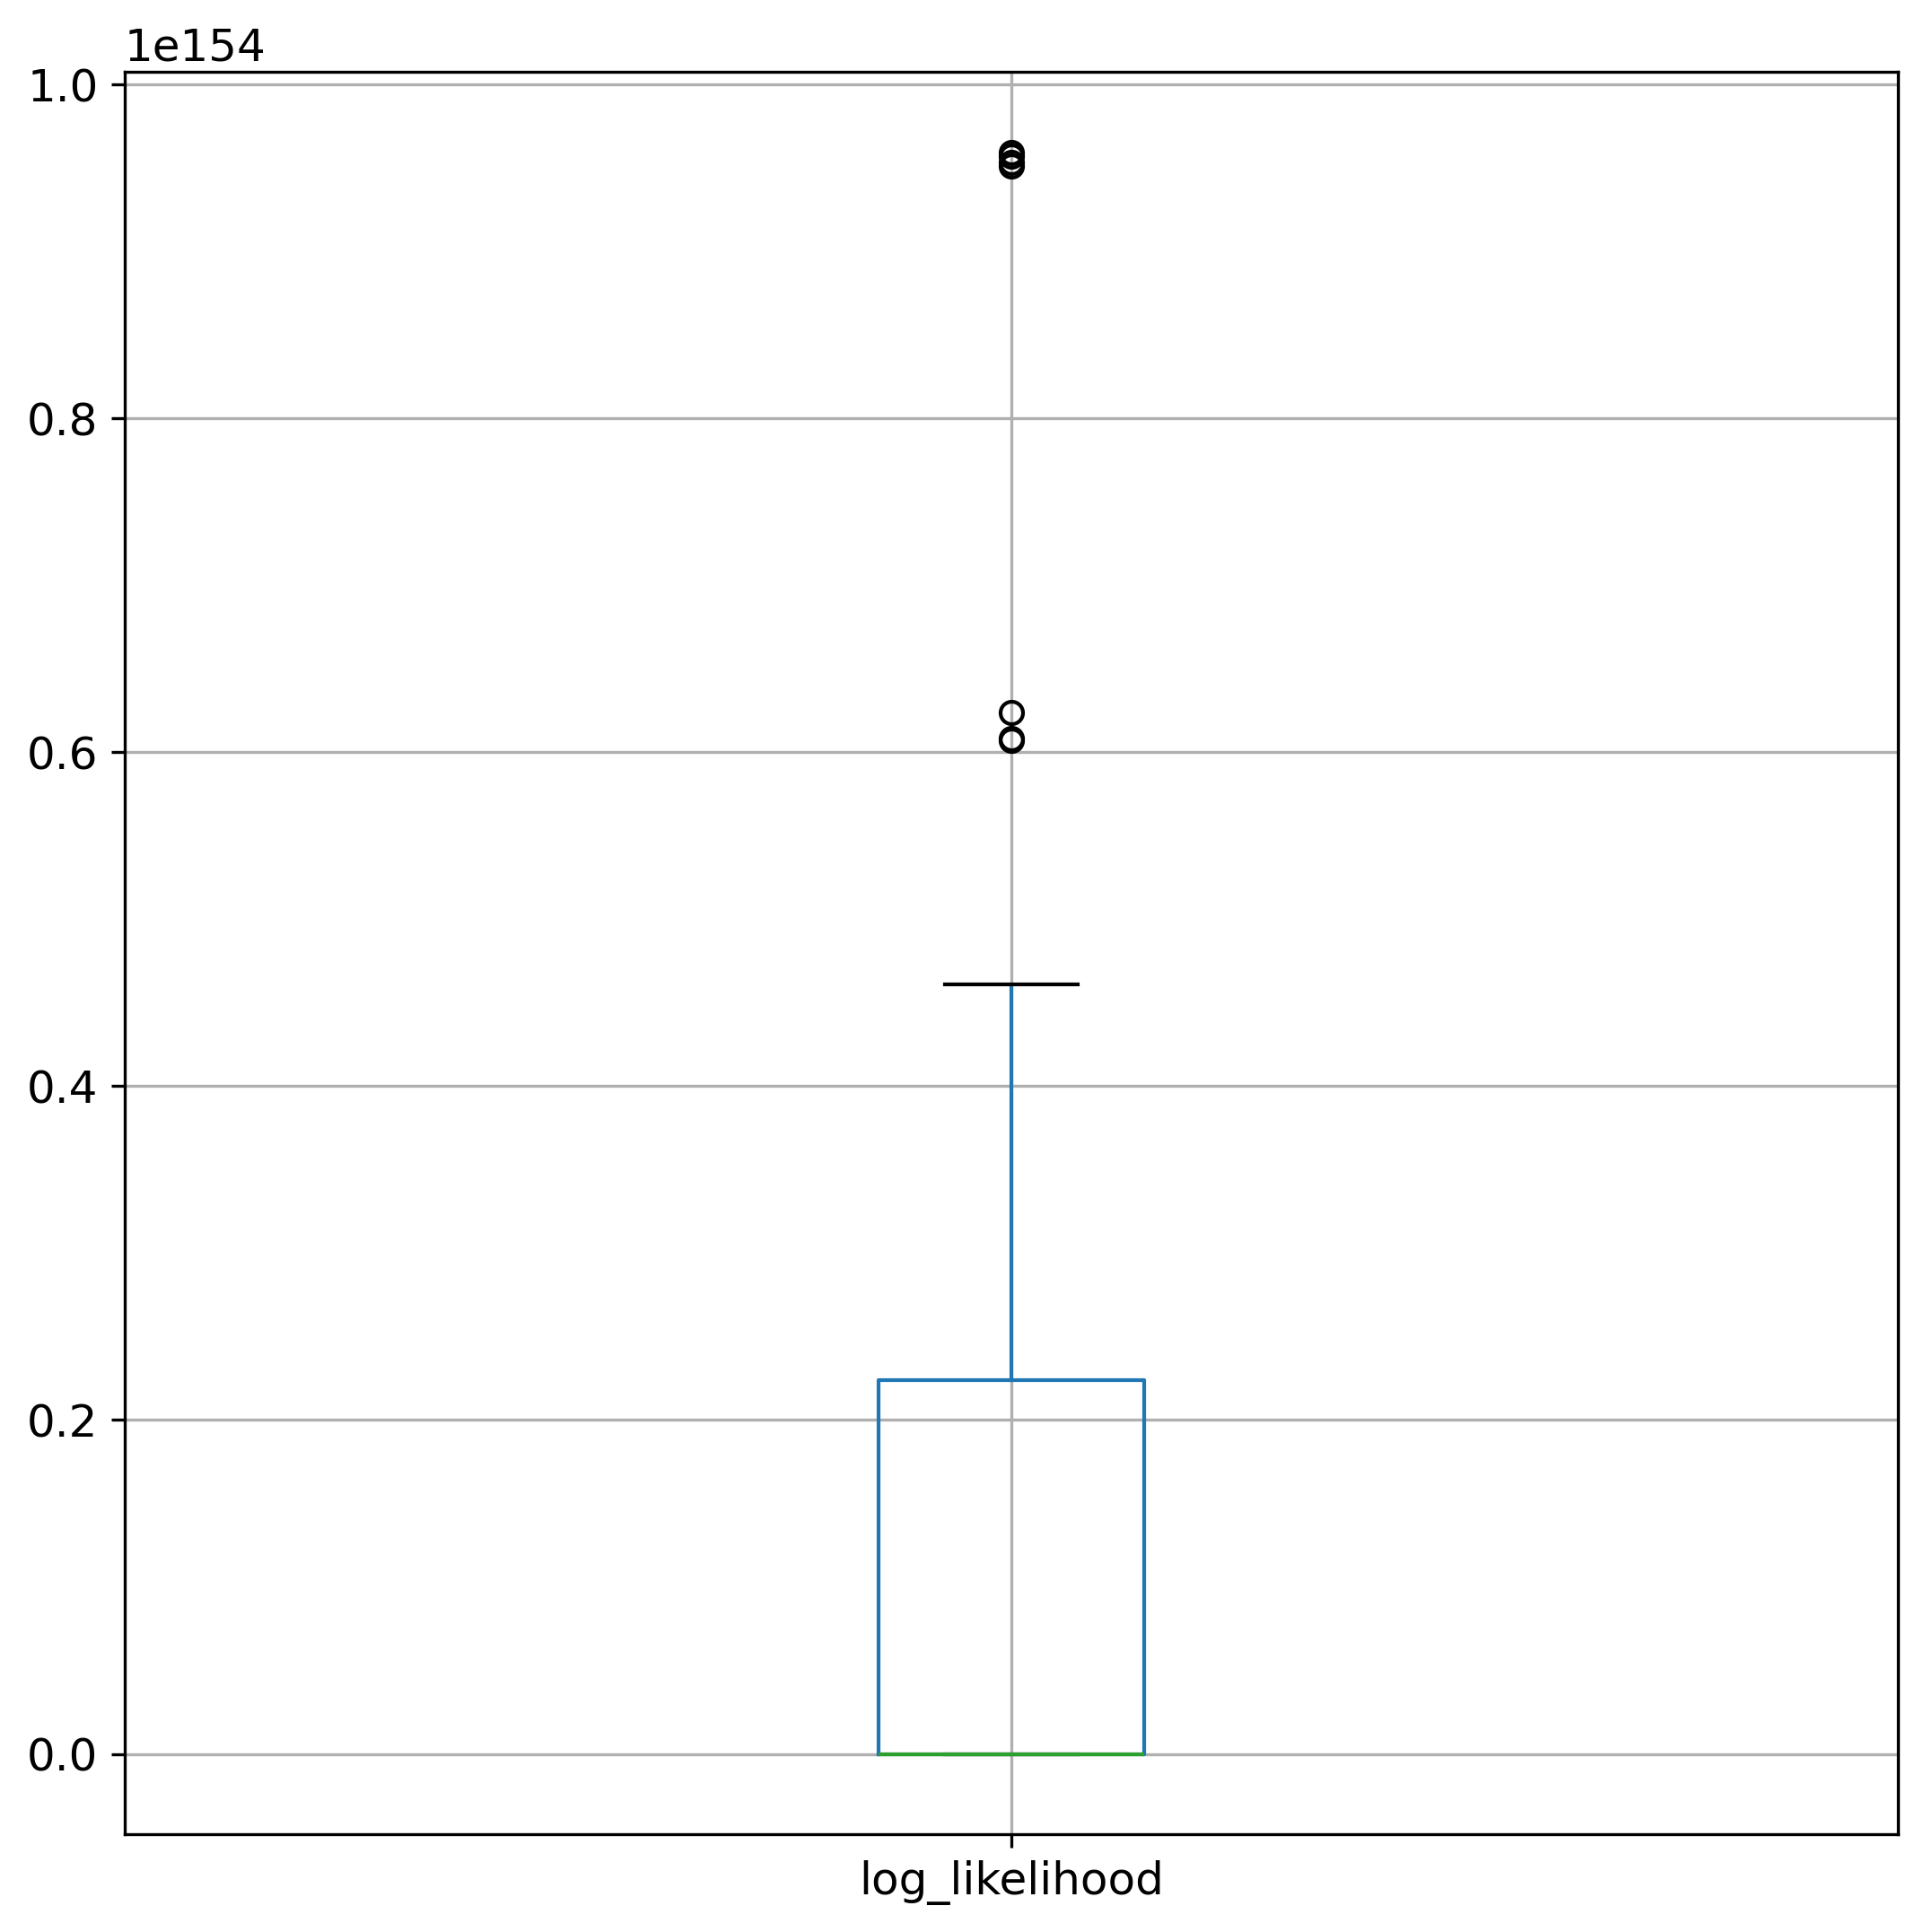

In [19]:
plt.show(generated_df.boxplot('log_likelihood'))

In [24]:
generated_df

,index,Unnamed: 0.1,Unnamed: 0,log_likelihood,Chain
0,0,0,0,-2.675718e+00,15
1,15,15,15,-2.706148e+00,15
2,38,38,38,-1.898390e+00,15
3,61,61,61,-2.263386e+00,15
4,105,105,105,-3.151605e+00,15
5,115,115,2,-4.260575e+00,12
6,127,127,14,-4.225152e+00,12
7,167,167,54,-3.293163e+00,12
8,206,206,93,-2.934659e+00,12
9,219,219,106,-5.116855e+00,12


/ihome/djishnu/zakaria/.local/lib/python3.10/site-packages/numpy/core/_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


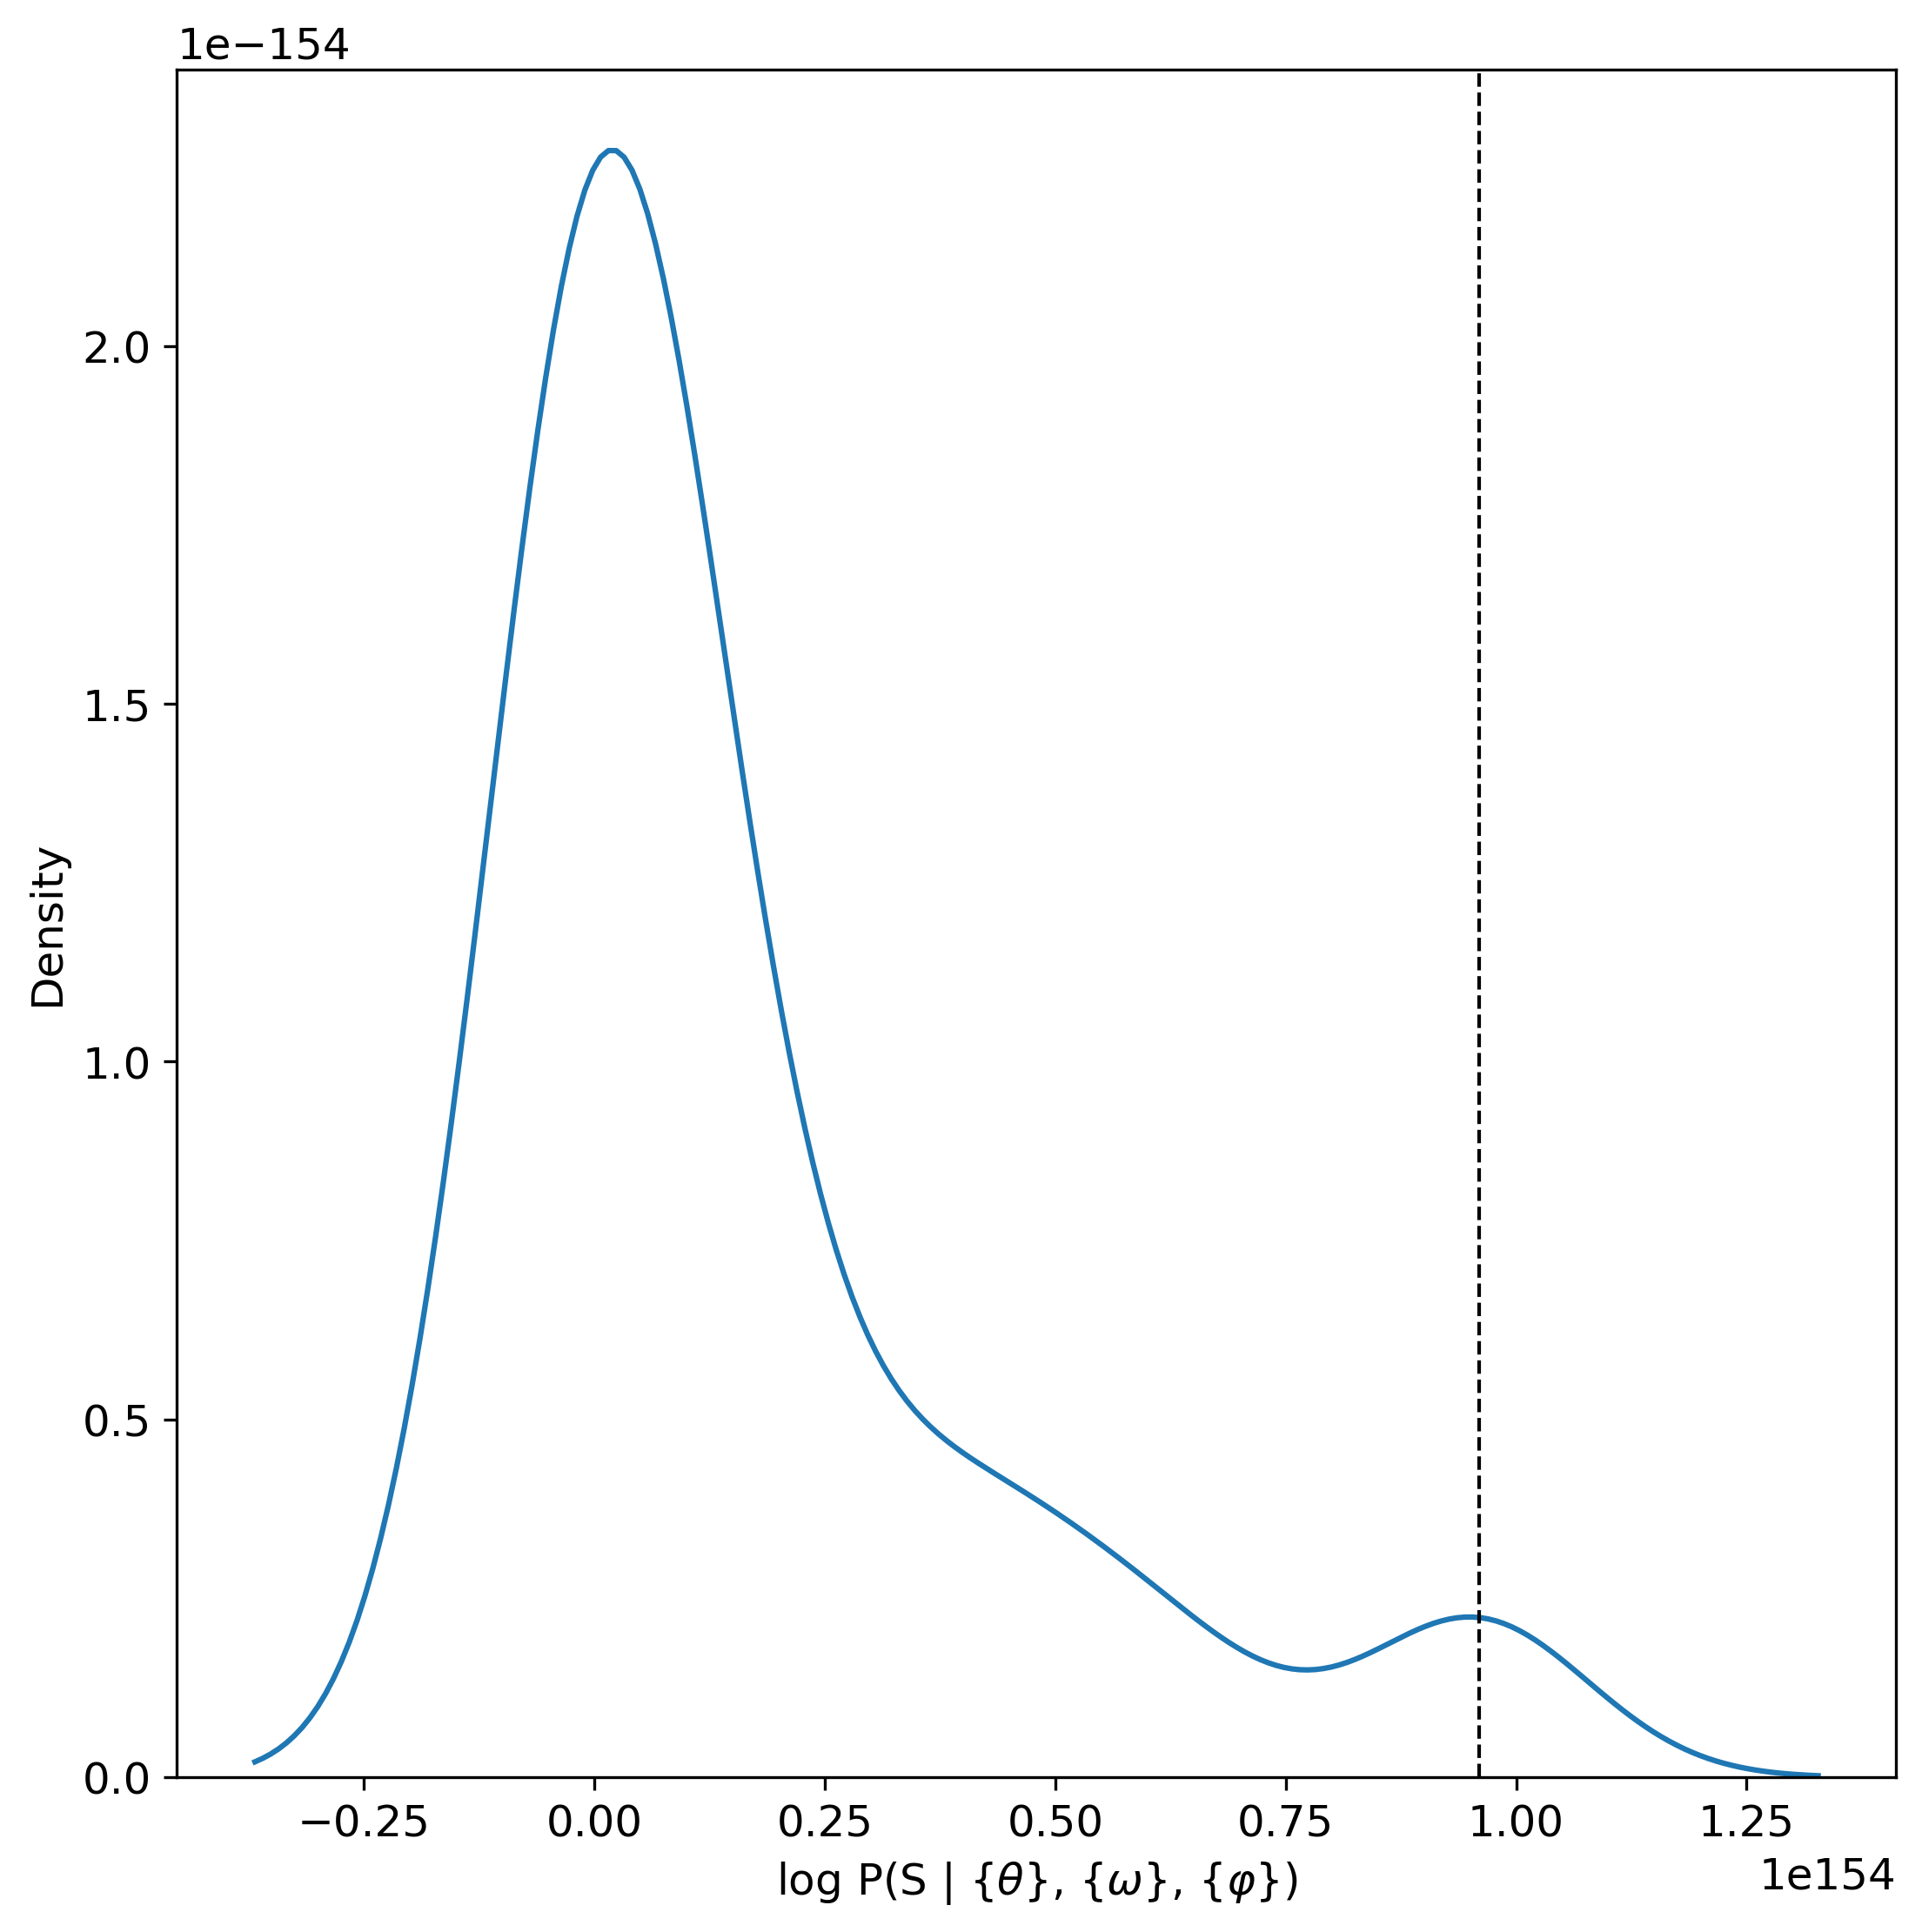

In [21]:
sns.kdeplot(data=generated_df, x='log_likelihood')#, hue='label')#, legend=False)#, stat='density', kde=True)
confidence_threshold = 0.99995
lower = generated_df['log_likelihood'].quantile(confidence_threshold)
plt.axvline(x=lower, color='black', linestyle='--', linewidth=1, label='95%')
plt.xlabel("log P(S | {$\\theta$}, {$\\omega$}, {$\\varphi$})")
#plt.savefig(f'{output_path}/energy_hist_rand_2.png')
plt.show()

# Read in and calculate log likelihood of Ensemble sample

In [23]:
reduced = True
generic_mutant_file_name='IL2_IL2RB_mutants_pfam_scaled_FINAL_SAMPLE_3.fasta'
output_df_name='AVRG_PARAM_unique_proba_matLL_3.csv'

ind_ref = 427#952#
del_t=0.001*1e-2
T=2
lamda=0.0001
N_training_samples=5
steps_per_traj=10
bdm_sampling=int(10e6)
n_seq_gen=bdm_sampling
kappa=50
num_uniform_random_sequences=25000000
random_msa_path = os.path.join(output_path, './random_mutants/random_mutants.fasta')#random_hits.fasta'#
deletions=True
constraint=True
constraint_index= list(range(total_len_p1, parsed_msa_alternative.numResidues()))

oppi = OPPI(parsed_msa_alternative, del_t=del_t, steps_per_traj=steps_per_traj, n_seq_gen=n_seq_gen
           , N_training_samples=N_training_samples, T=T, lamda=lamda, random_msa_path=random_msa_path, 
          q_ind=to_mutate_alternative, ind_ref=ind_ref, kappa=kappa, deletions=deletions, 
            num_uniform_random_sequences=num_uniform_random_sequences, constraint=constraint, constraint_index=constraint_index)

ensemble_results = oppi.Ensemble_sample(where=output_path, reduced=reduced, generic_mutant_file_name=generic_mutant_file_name,
                     kronecker_matrix=kronecker_matrix, output_df_name=output_df_name)
generated = ensemble_results[0]
generated_df = ensemble_results[1]
generated_df

/ix/djishnu/Zak/AIM1-2/O-PPI_jason_lab/CSG_object_V8.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.indices_1_21 = torch.tensor(torch.arange(1, len(self.alphabet_bytes)+1))
/ix/djishnu/Zak/AIM1-2/O-PPI_jason_lab/CSG_object_V8.py:59: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.alphabet_int = torch.tensor(torch.arange(0, len(self.alphabet_bytes)-1))
@> 100 sequence(s) with 343 residues were parsed in 0.05s.


num sequences before cleaning =  571
Number of parameters in the model =  44310
Random sample size =  100
Each CSG iteration will use 50000 random sequences
num sequences after cleaning =  559
The reference sequence corresponding to the following indices will be used to constraint the design of the 2nd sequence
[133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 2

KeyboardInterrupt: 

In [21]:
ind_uniq = pr.uniqueSequences(generated, seqid=1, turbo=True)
generated[ind_uniq]

<MSA: Sample sequences from expected probability matrix from chain chain_15 (average parameters) (1384 sequences, 343 residues)>

In [15]:
import pandas as pd
import os
import prody as pr
#import cudf

ensemble_df = pd.read_csv('interfaces/Garcia/multiple_chains_3/final_sampling_AVRG_PARAM_unique_proba_mat/AVRG_PARAM_unique_proba_matLL_2.csv', index_col=0)
ensemble_sample = pr.parseMSA('interfaces/Garcia/multiple_chains_3/final_sampling_AVRG_PARAM_unique_proba_mat/AVRG_PARAM_unique_proba_mat_IL2_IL2RB_mutants_pfam_scaled_FINAL_SAMPLE_2.fasta',
                              aligned=True)
#os.path.join(output_path, 'final_sampling_AVRG_PARAM_unique_proba_mat/AVRG_PARAM_unique_proba_mat_IL2_IL2RB_mutants_pfam_scaled_FINAL_SAMPLE.fasta'), aligned=True)
generated = ensemble_sample 
generated_df = ensemble_df
generated

@> 1274 sequence(s) with 343 residues were parsed in 0.02s.


<MSA: AVRG_PARAM_unique_proba_mat_IL2_IL2RB_mutants_pfam_scaled_FINAL_SAMPLE_2 (1274 sequences, 343 residues)>

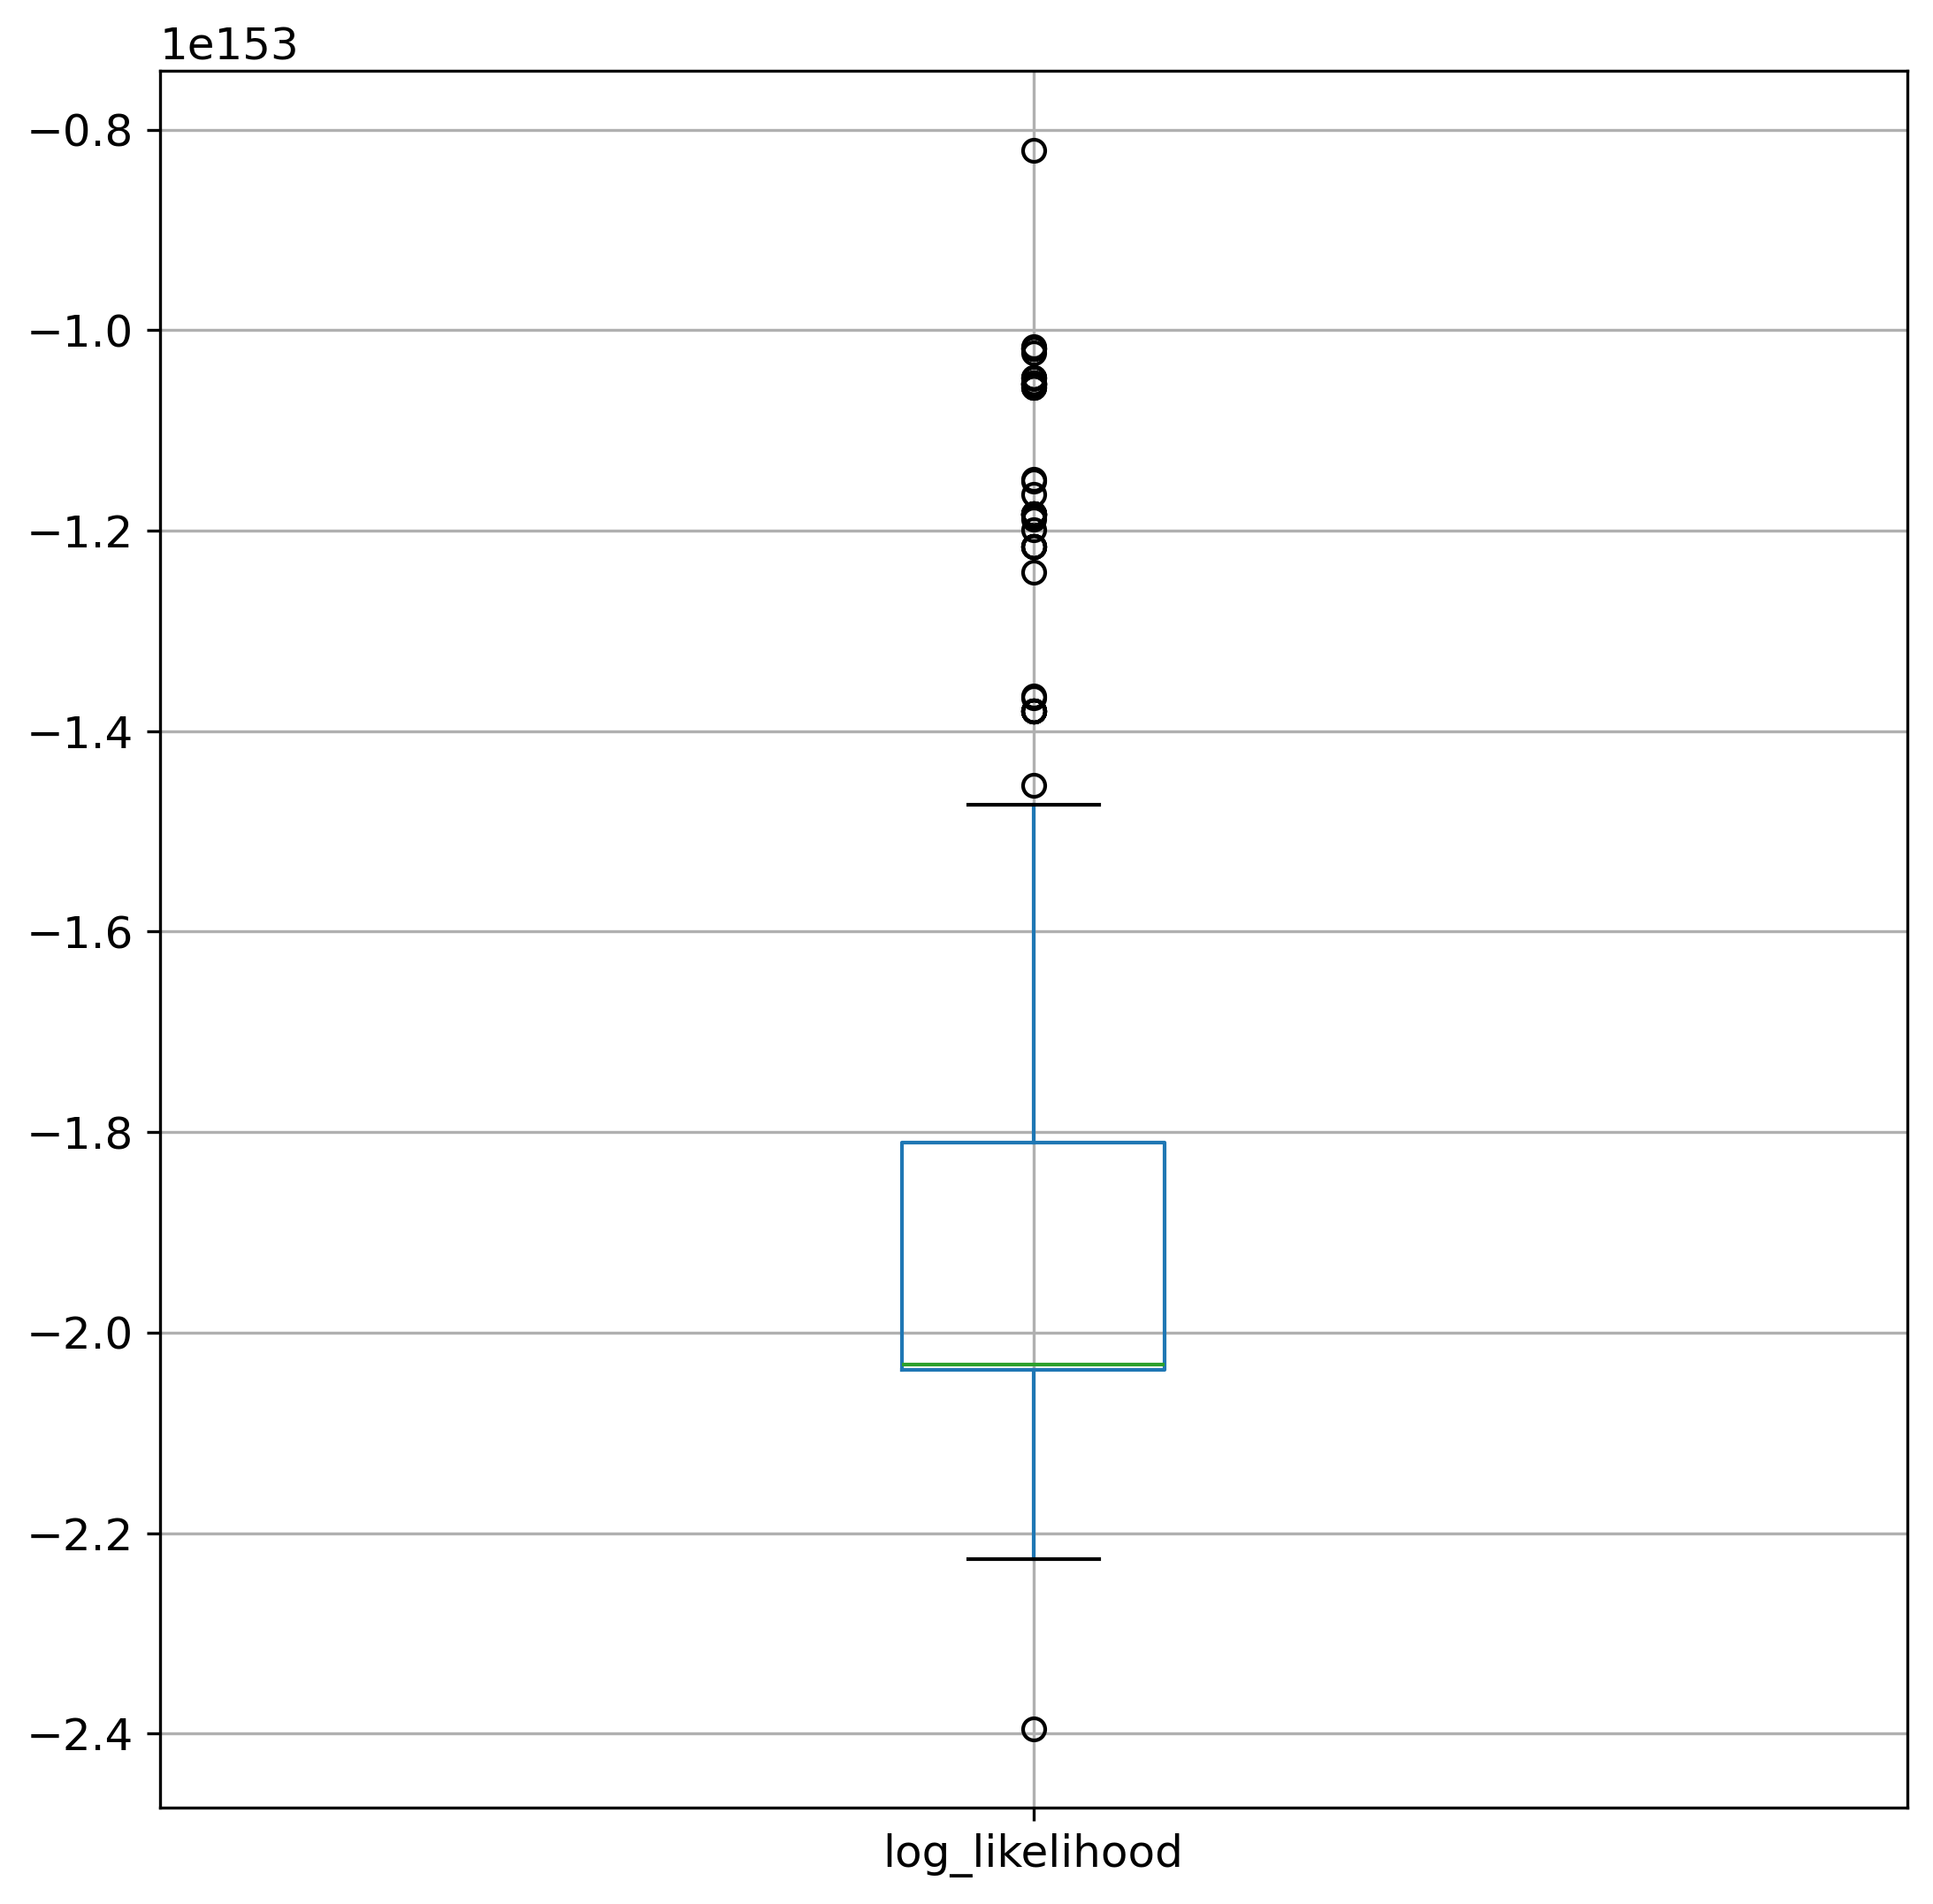

In [22]:
plt.show(generated_df.boxplot())

In [19]:
#ind_unique = pr.uniqueSequences(generated)
confidence_threshold = 0.999
print('Random hit confidence threshold = ', confidence_threshold)
#generated_df = generated_df.loc[ind_unique,:]
generated_hit_threshold = generated_df['log_likelihood'].quantile(confidence_threshold)
print('log likelihood threshold value = ', generated_hit_threshold)
generated_hit_ind = generated_df['log_likelihood']> generated_hit_threshold
generated_hits = generated_df.loc[generated_hit_ind,:]

top100_gen_index = np.array(generated_hits.index)
generated_top100 = generated[top100_gen_index]
generated_top100

Random hit confidence threshold =  0.999
log likelihood threshold value =  -1.1014748076263036e+153


<MSA: AVRG_PARAM_unique_proba_mat_IL2_IL2RB_mutants_pfam_scaled_FINAL_SAMPLE_2 (2 sequences, 343 residues)>

In [24]:
############################################################
pr.writeMSA(os.path.join(output_path, 'generated_hits_ENS.fasta'), generated_top100)

'interfaces/sasa/multiple_chains_6/generated_hits_ENS.fasta'

## writing multirep fasta (to be added to oppi)

In [ ]:
import os
i = 0
generic_mutant_file_name='IL2_IL2RB_mutants_pfam_scaled_FINAL_SAMPLE.fasta'#'random_mutants.fasta'#

for chain in os.listdir(output_path):
    where = os.path.join(output_path, chain)
    
    if not os.path.isdir(where) or chain=='.ipynb_checkpoints' or chain[:5]!='chain':
        continue
    else:
        print(where)
        final_sam_dir = os.path.join(where, f'training_samples/{generic_mutant_file_name}')
        print(final_sam_dir)
        
        try:
            generated_i = pr.parseMSA(final_sam_dir, aligned=True)
            if i<1:
                generated = generated_i
            else:
                generated.extend(generated_i.getArray())
            i+=1
        except Exception as e:
            print(e)

X = np.unique(np.where(generated.getArray()==b'X')[0])
clean_parsed_msa_alternative_ind = list(range(generated.numSequences()))
clean_parsed_msa_alternative_ind = np.where(np.array([x if x not in X else None for x in clean_parsed_msa_alternative_ind])!=None)[0]
generated = generated[clean_parsed_msa_alternative_ind,:]

pr.writeMSA(f'{output_path}/all_generated_msa_2.fasta', generated)


# Clean generated sequences

In [ ]:
import prody as pr
generated = pr.parseMSA(f'{output_path}/all_generated_msa_2.fasta', aligned=True)

# Isolating generated hits

In [41]:
output_path

'interfaces/sasa/multiple_chains_6/'

In [40]:
#ind_unique = pr.uniqueSequences(generated)
confidence_threshold = 0.567
print('Random hit confidence threshold = ', confidence_threshold)
#generated_df = generated_df.loc[ind_unique,:]
generated_hit_threshold = generated_df['log_likelihood'].quantile(confidence_threshold)
print('log likelihood threshold value = ', generated_hit_threshold)
generated_hit_ind = generated_df['log_likelihood']> generated_hit_threshold
generated_hits = generated_df.loc[generated_hit_ind,:]

top100_gen_index = np.array(generated_hits.index)
generated_top100 = generated[top100_gen_index]

generated_top100

Random hit confidence threshold =  0.567
log likelihood threshold value =  1.4875225107625933


<MSA: Unknown (26 sequences, 343 residues)>

In [41]:
############################################################
pr.writeMSA(os.path.join(output_path, 'generated_hits_MR2.fasta'), generated_top100)

'interfaces/Garcia/multiple_chains_3/generated_hits_MR2.fasta'

## Interface entropy of generated hits

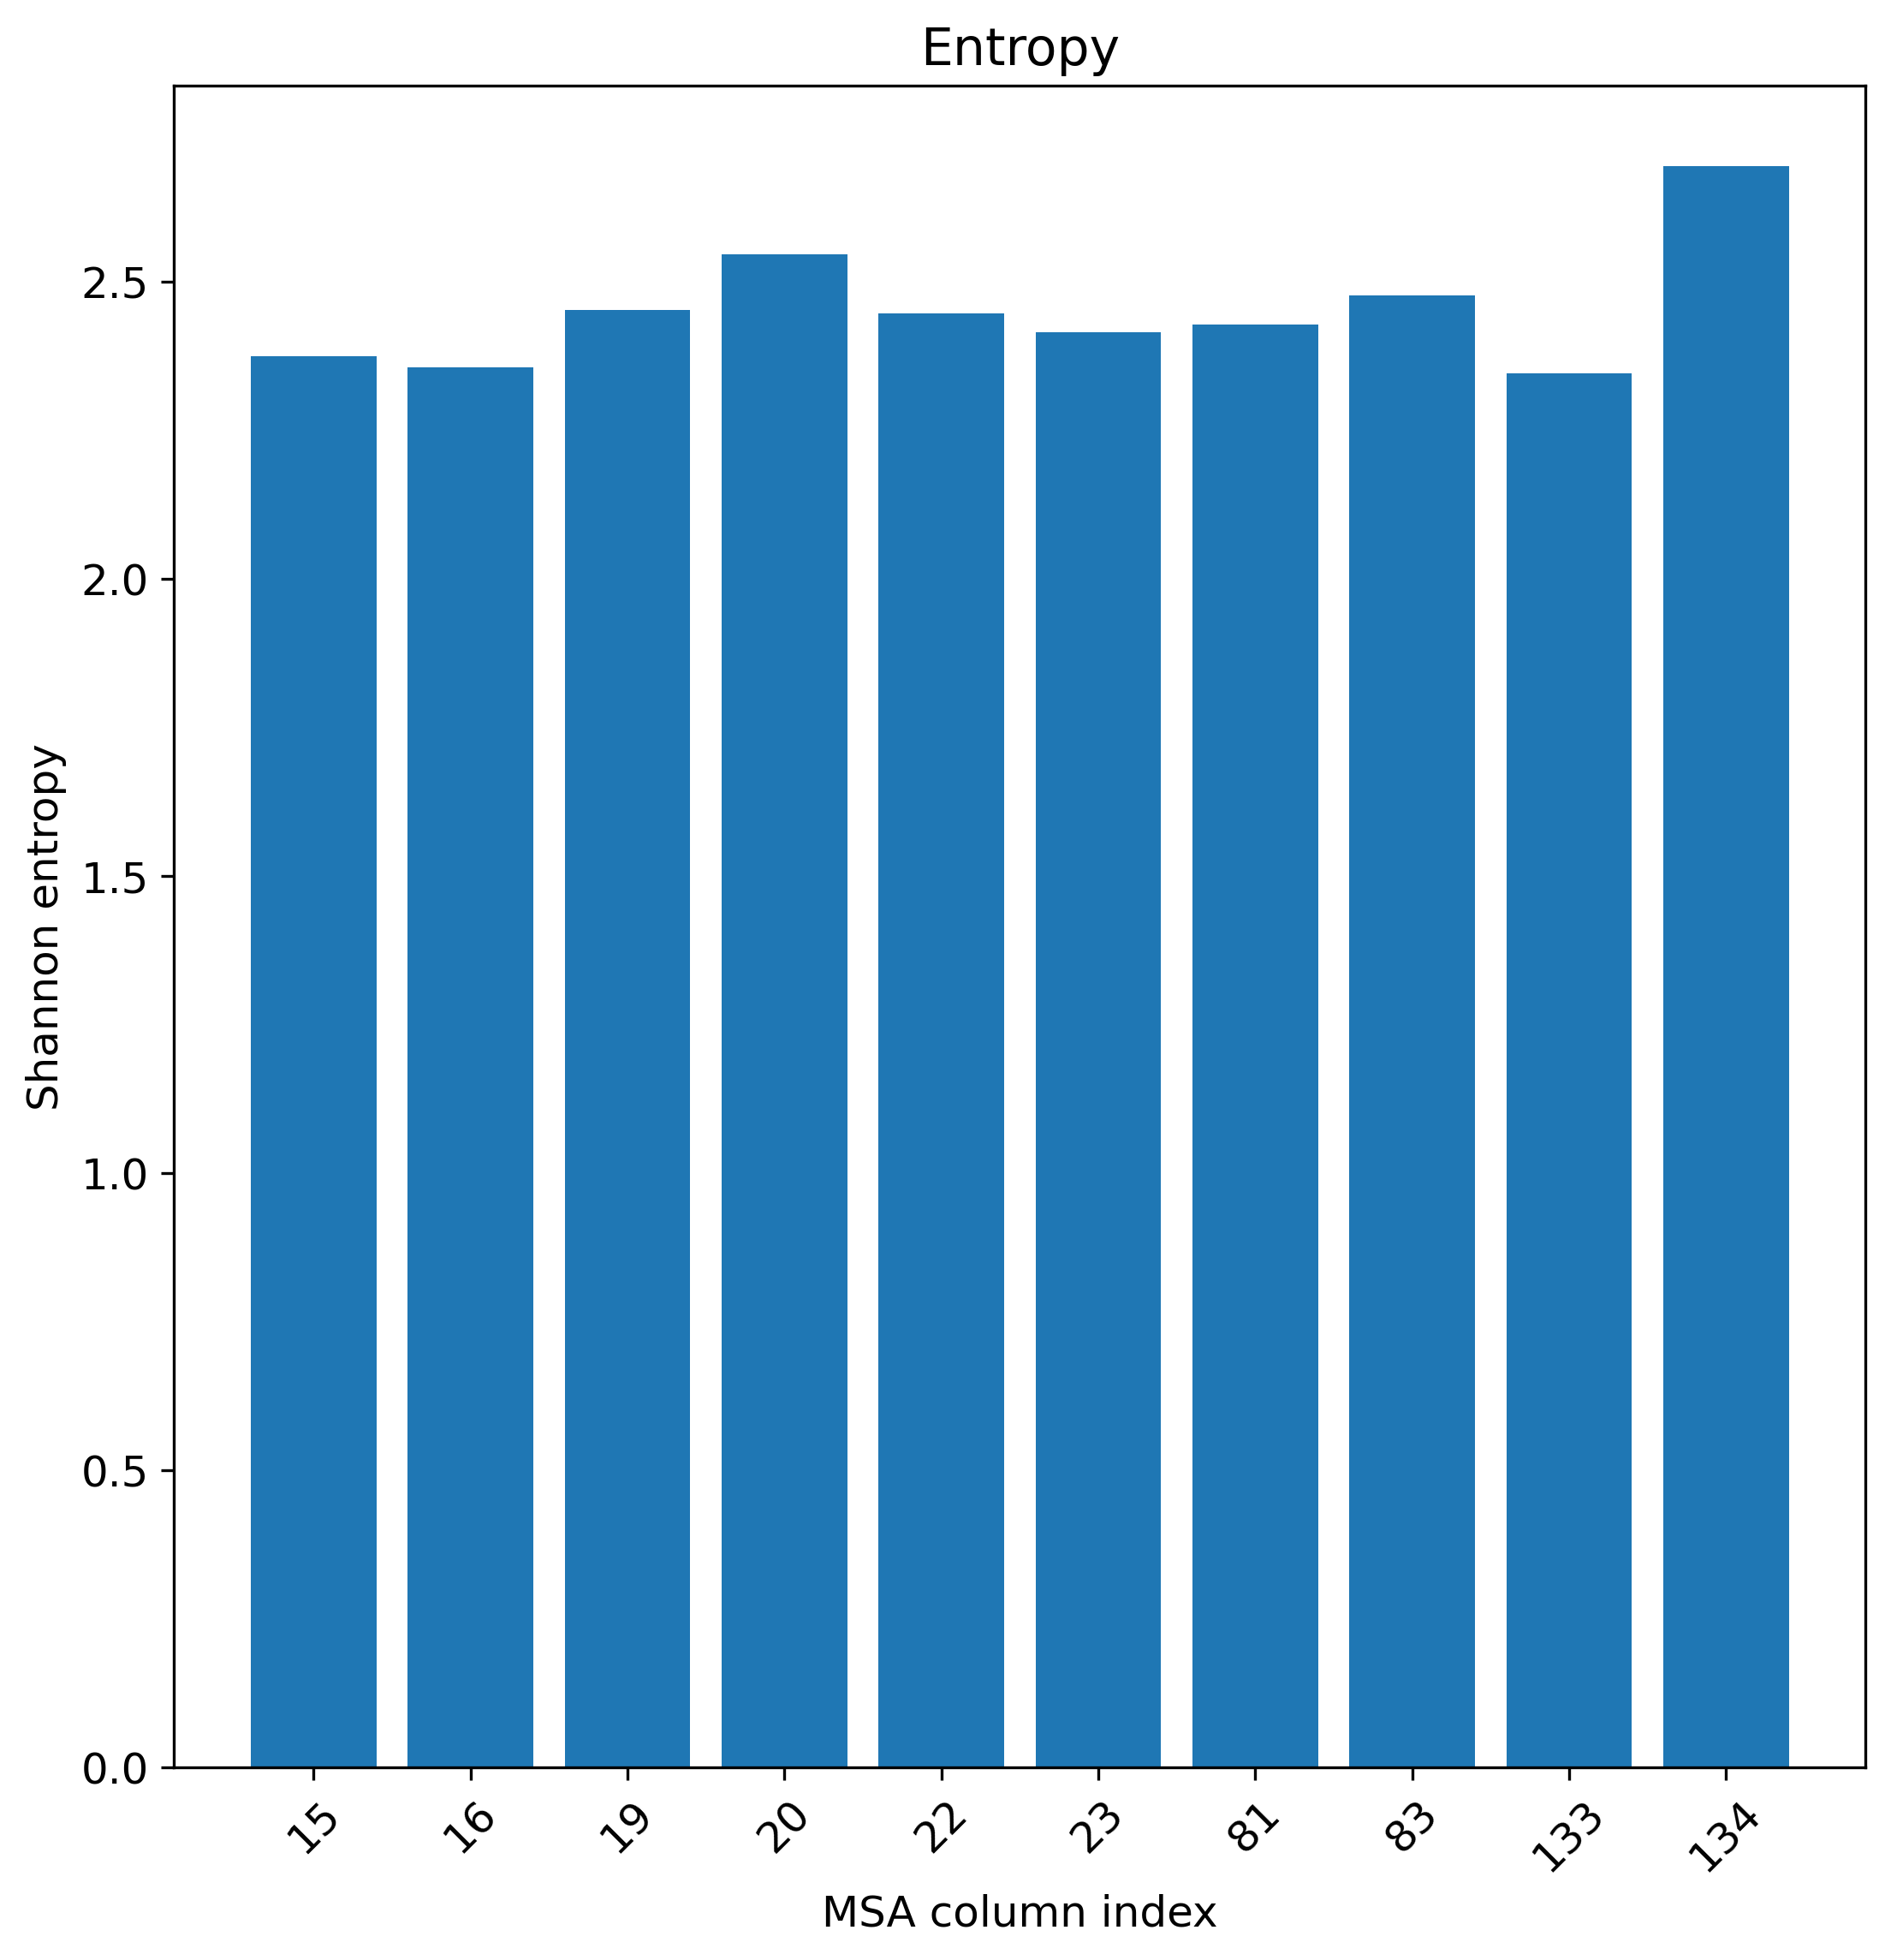

In [43]:
entropy_1 = pr.calcShannonEntropy(generated_top100[:,to_mutate_alternative])#[:,to_mutate])
# interface
S = pr.showShannonEntropy(entropy_1)#[to_mutate_alternative])
# Ticks
IL2_ticks = np.array([15, 16, 19, 20, 22, 23, 81, 83])#np.array([41, 42, 70, 73, 74, 75, 133, 134, 188])
IL2RB_ticks = np.array([133, 134])#np.array([12, 15, 16, 19, 20, 23, 84, 88, 91, 95])
xticks_labels = np.append(IL2_ticks, IL2RB_ticks)
xticks = list(range(1,len(xticks_labels)+1))
plt.xticks(ticks=xticks, labels=xticks_labels, rotation=45)
#plt.savefig('entropy_IL2RB_interface.png', bbox_inches='tight')
plt.show(S)

/scratch/slurm-1335274/ipykernel_62993/275847597.py:10: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  summary = actual_seq_dict.iloc[:,to_mutate_alternative].describe()
/scratch/slurm-1335274/ipykernel_62993/275847597.py:10: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  summary = actual_seq_dict.iloc[:,to_mutate_alternative].describe()
/scratch/slurm-1335274/ipykernel_62993/275847597.py:10: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = resu

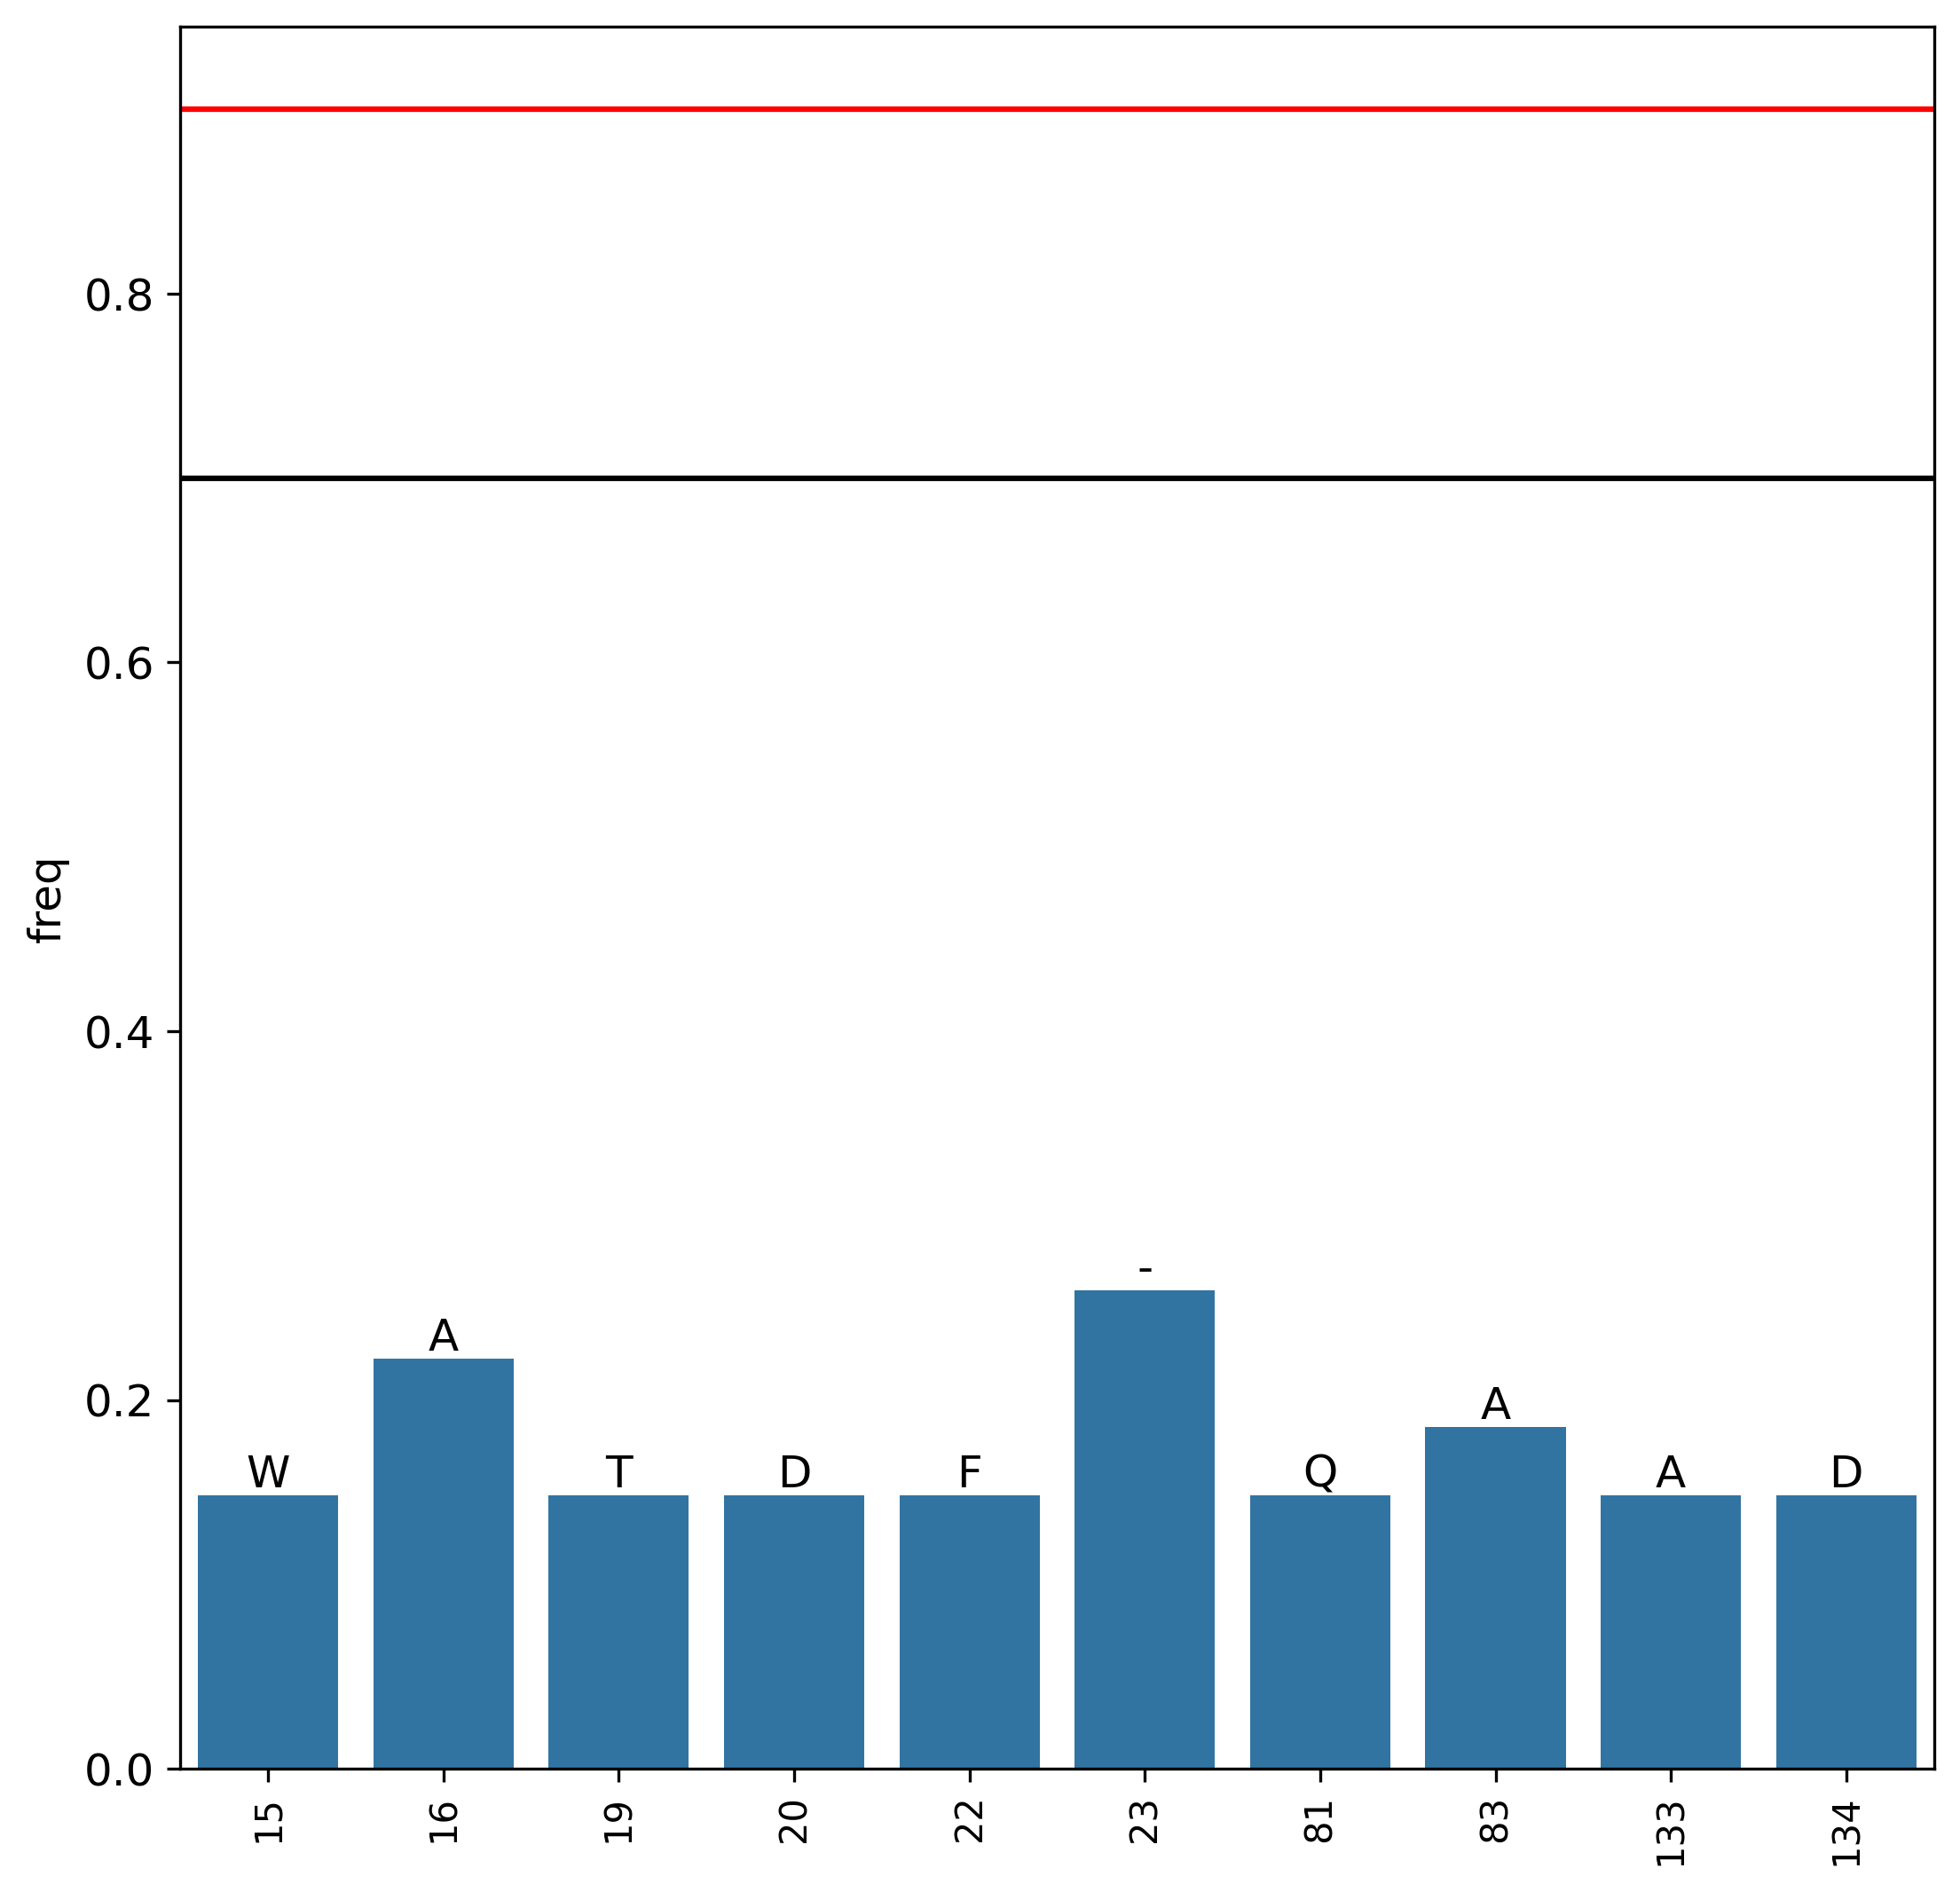

In [22]:
import pandas as pd
import seaborn as sns

######################### Ticks
IL2_ticks = np.array([15, 16, 19, 20, 22, 23, 81, 83])#np.array([41, 42, 70, 73, 74, 75, 133, 134, 188])
IL2RB_ticks = np.array([133, 134])#np.array([12, 15, 16, 19, 20, 23, 84, 88, 91, 95])
xticks_labels = np.append(IL2_ticks, IL2RB_ticks)
########################################################################################
actual_seq_dict = pd.DataFrame(generated_top100.getArray())
summary = actual_seq_dict.iloc[:,to_mutate_alternative].describe()
interface_freq = summary.iloc[-1,:]/generated_top100.numSequences()

ax = sns.barplot(interface_freq)
plt.xticks(rotation=90, fontsize=10)
plt.axhline(y=0.9, c='r')
plt.axhline(y=0.7, c='black')
plt.xticks(list(range(len(interface_freq))), xticks_labels)

for bar, label in zip(ax.patches, summary.iloc[-2,:]):
    ax.text(bar.get_x() + bar.get_width() / 2,  # Center x
            bar.get_height(),                  # Top of the bar
            label.decode('utf-8'),                             # Label text
            ha='center', va='bottom')   
plt.show(ax)
#plt.savefig('mutation_interface_8A_freq.png')

# Write AF3 json for hits

In [12]:
generic_mutant_file_name='IL2_IL2RB_mutants_pfam_scaled_FINAL_SAMPLE_3.fasta'
confidence_threshold = 0.95

oppi.make_af3_json_multireplica(output_path=output_path, confidence_threshold=0.95, 
                                generic_mutant_file_name=generic_mutant_file_name, 
                                energy_csv='per_chain_sampled_seq_log_likelihood.csv', 
                                type_='generated', hits_filename='generated_hits_2.fasta', 
                                model_type = 'AF3_models_2', template_file_dir='af3_input.json')

interfaces/sasa/multiple_chains_5/chain_7/final_sampling/IL2_IL2RB_mutants_pfam_scaled_FINAL_SAMPLE_3.fasta


@> 500000 sequence(s) with 343 residues were parsed in 0.94s.


interfaces/sasa/multiple_chains_5/chain_28/final_sampling/IL2_IL2RB_mutants_pfam_scaled_FINAL_SAMPLE_3.fasta


@> 500000 sequence(s) with 343 residues were parsed in 0.94s.


interfaces/sasa/multiple_chains_5/chain_22/final_sampling/IL2_IL2RB_mutants_pfam_scaled_FINAL_SAMPLE_3.fasta


@> 500000 sequence(s) with 343 residues were parsed in 0.94s.


interfaces/sasa/multiple_chains_5/chain_10/final_sampling/IL2_IL2RB_mutants_pfam_scaled_FINAL_SAMPLE_3.fasta


@> 500000 sequence(s) with 343 residues were parsed in 0.93s.


interfaces/sasa/multiple_chains_5/chain_17/final_sampling/IL2_IL2RB_mutants_pfam_scaled_FINAL_SAMPLE_3.fasta


@> 500000 sequence(s) with 343 residues were parsed in 1.12s.


interfaces/sasa/multiple_chains_5/chain_25/final_sampling/IL2_IL2RB_mutants_pfam_scaled_FINAL_SAMPLE_3.fasta


@> 500000 sequence(s) with 343 residues were parsed in 0.93s.


interfaces/sasa/multiple_chains_5/chain_4/final_sampling/IL2_IL2RB_mutants_pfam_scaled_FINAL_SAMPLE_3.fasta


@> 500000 sequence(s) with 343 residues were parsed in 0.93s.


interfaces/sasa/multiple_chains_5/chain_21/final_sampling/IL2_IL2RB_mutants_pfam_scaled_FINAL_SAMPLE_3.fasta


@> 500000 sequence(s) with 343 residues were parsed in 0.93s.


interfaces/sasa/multiple_chains_5/chain_13/final_sampling/IL2_IL2RB_mutants_pfam_scaled_FINAL_SAMPLE_3.fasta


@> 500000 sequence(s) with 343 residues were parsed in 1.10s.


interfaces/sasa/multiple_chains_5/chain_19/final_sampling/IL2_IL2RB_mutants_pfam_scaled_FINAL_SAMPLE_3.fasta


@> 500000 sequence(s) with 343 residues were parsed in 0.94s.


interfaces/sasa/multiple_chains_5/chain_14/final_sampling/IL2_IL2RB_mutants_pfam_scaled_FINAL_SAMPLE_3.fasta


@> 500000 sequence(s) with 343 residues were parsed in 0.94s.


interfaces/sasa/multiple_chains_5/chain_26/final_sampling/IL2_IL2RB_mutants_pfam_scaled_FINAL_SAMPLE_3.fasta
[Errno 2] No such file or directory: 'interfaces/sasa/multiple_chains_5/chain_26/final_sampling/IL2_IL2RB_mutants_pfam_scaled_FINAL_SAMPLE_3.fasta'
interfaces/sasa/multiple_chains_5/chain_9/final_sampling/IL2_IL2RB_mutants_pfam_scaled_FINAL_SAMPLE_3.fasta


@> 500000 sequence(s) with 343 residues were parsed in 0.95s.


interfaces/sasa/multiple_chains_5/chain_3/final_sampling/IL2_IL2RB_mutants_pfam_scaled_FINAL_SAMPLE_3.fasta


@> 500000 sequence(s) with 343 residues were parsed in 0.93s.


interfaces/sasa/multiple_chains_5/chain_1/final_sampling/IL2_IL2RB_mutants_pfam_scaled_FINAL_SAMPLE_3.fasta


@> 500000 sequence(s) with 343 residues were parsed in 0.98s.


interfaces/sasa/multiple_chains_5/chain_16/final_sampling/IL2_IL2RB_mutants_pfam_scaled_FINAL_SAMPLE_3.fasta


@> 500000 sequence(s) with 343 residues were parsed in 0.95s.


interfaces/sasa/multiple_chains_5/chain_24/final_sampling/IL2_IL2RB_mutants_pfam_scaled_FINAL_SAMPLE_3.fasta


@> 500000 sequence(s) with 343 residues were parsed in 0.94s.


interfaces/sasa/multiple_chains_5/chain_23/final_sampling/IL2_IL2RB_mutants_pfam_scaled_FINAL_SAMPLE_3.fasta


@> 500000 sequence(s) with 343 residues were parsed in 0.94s.


interfaces/sasa/multiple_chains_5/chain_29/final_sampling/IL2_IL2RB_mutants_pfam_scaled_FINAL_SAMPLE_3.fasta


@> 500000 sequence(s) with 343 residues were parsed in 0.94s.


interfaces/sasa/multiple_chains_5/chain_11/final_sampling/IL2_IL2RB_mutants_pfam_scaled_FINAL_SAMPLE_3.fasta


@> 500000 sequence(s) with 343 residues were parsed in 0.95s.


interfaces/sasa/multiple_chains_5/chain_30/final_sampling/IL2_IL2RB_mutants_pfam_scaled_FINAL_SAMPLE_3.fasta


@> 500000 sequence(s) with 343 residues were parsed in 0.95s.


interfaces/sasa/multiple_chains_5/chain_6/final_sampling/IL2_IL2RB_mutants_pfam_scaled_FINAL_SAMPLE_3.fasta


@> 500000 sequence(s) with 343 residues were parsed in 0.96s.


interfaces/sasa/multiple_chains_5/chain_2/final_sampling/IL2_IL2RB_mutants_pfam_scaled_FINAL_SAMPLE_3.fasta


@> 500000 sequence(s) with 343 residues were parsed in 0.94s.


interfaces/sasa/multiple_chains_5/chain_8/final_sampling/IL2_IL2RB_mutants_pfam_scaled_FINAL_SAMPLE_3.fasta


@> 500000 sequence(s) with 343 residues were parsed in 1.08s.


interfaces/sasa/multiple_chains_5/chain_15/final_sampling/IL2_IL2RB_mutants_pfam_scaled_FINAL_SAMPLE_3.fasta


@> 500000 sequence(s) with 343 residues were parsed in 1.13s.


interfaces/sasa/multiple_chains_5/chain_27/final_sampling/IL2_IL2RB_mutants_pfam_scaled_FINAL_SAMPLE_3.fasta
[Errno 2] No such file or directory: 'interfaces/sasa/multiple_chains_5/chain_27/final_sampling/IL2_IL2RB_mutants_pfam_scaled_FINAL_SAMPLE_3.fasta'
interfaces/sasa/multiple_chains_5/chain_20/final_sampling/IL2_IL2RB_mutants_pfam_scaled_FINAL_SAMPLE_3.fasta
[Errno 2] No such file or directory: 'interfaces/sasa/multiple_chains_5/chain_20/final_sampling/IL2_IL2RB_mutants_pfam_scaled_FINAL_SAMPLE_3.fasta'
interfaces/sasa/multiple_chains_5/chain_18/final_sampling/IL2_IL2RB_mutants_pfam_scaled_FINAL_SAMPLE_3.fasta


@> 500000 sequence(s) with 343 residues were parsed in 1.43s.


interfaces/sasa/multiple_chains_5/chain_12/final_sampling/IL2_IL2RB_mutants_pfam_scaled_FINAL_SAMPLE_3.fasta


@> 500000 sequence(s) with 343 residues were parsed in 1.09s.


interfaces/sasa/multiple_chains_5/chain_5/final_sampling/IL2_IL2RB_mutants_pfam_scaled_FINAL_SAMPLE_3.fasta


@> 500000 sequence(s) with 343 residues were parsed in 1.52s.


Start!
Alright!
generated hit confidence_threshold =  0.95


In [44]:
import prody as pr
import os 
import json

hitfile = 'generated_hits_MR2.fasta'#'random_hits.fasta'#'generated_hits_ENS.fasta'
generated_top100 = pr.parseMSA(os.path.join(output_path, hitfile),aligned=True)

template_file_dir = 'af3_input.json'
model_type = 'AF3_MR_models_2'
af_dir = os.path.join(output_path, model_type)
os.system(f'mkdir {af_dir}')

af_models_dir = os.path.join(af_dir, 'json')
os.system(f'mkdir {af_models_dir}')

af_models_prediction =  os.path.join(af_dir, 'models')
os.system(f'mkdir {af_models_prediction}')

for index, sequence in enumerate(generated_top100): 
        #for index in top1000_index:
            #sequence = generated_i[index]
            sequence_str = str(sequence)
            sequence_str_nogap = sequence_str.replace('-', '')
                
            with open(f"{template_file_dir}", "r") as f:
                data = json.load(f)
                data.pop("userCCD")
                data.pop("bondedAtomPairs")
        
                ###################
                #del data["sequences"][0]
                new_protein_data = {"protein":{"id":"IL",
                            "sequence":sequence_str_nogap[:153-20],
                            }}#"pairedMsaPath":paired_il2_il2rb
                data["sequences"][0] = new_protein_data
                ###############
                new_protein_data = {"protein":{"id": "ILRB", 
                            "sequence":sequence_str_nogap[153-20:],
                            }}#"pairedMsaPath":paired_il2_il2rb
                data["sequences"][1] = new_protein_data
                ###############
                del data["sequences"][2:]
                ###############
                data["version"] = 1
                ###############
                data["name"] = f"IL_ILRB_{index}"
        
            output_json = os.path.join(af_models_dir, f'af3_complex_{index}.json')
            
            with open(output_json, "w") as f:
                json.dump(data, f, indent=2)

@> 26 sequence(s) with 343 residues were parsed in 0.87s.


# Calculate -log probabilities of large random subset

In [ ]:
# GENERATE
msa_path = os.path.join(output_path, 'all_random_msa.fasta')
msa_random = oppi.random_mutant_generator(random_msa_path=msa_path, num_uniform_random_sequences=50000000)[0]
msa_random

In [12]:
# OR LOAD
msa_path = os.path.join(output_path, 'chain_1/random_mutants/random_mutants.fasta')
msa_random = pr.parseMSA(msa_path, aligned=True)#oppi.random_msa
msa_random

@> 10000000 sequence(s) with 343 residues were parsed in 68.51s.


<MSA: random_mutants (10000000 sequences, 343 residues)>

# Calculate random -log likelihood

In [27]:
output_path = 

'interfaces/Garcia/multiple_chains_3/chain_6/'

In [23]:
oppi.calc_ensemble_param(kronecker_matrix=kronecker_matrix, where=output_path, reduced=True, just_str_path=True)

interfaces/Garcia/multiple_chains_3/chain_15
[Errno 2] No such file or directory: 'interfaces/Garcia/multiple_chains_3/chain_15/training_samples/csg_parameters.npy'
Trying the following address for replica parameters: interfaces/Garcia/multiple_chains_3/chain_15/csg_parameters.npy
interfaces/Garcia/multiple_chains_3/chain_1
[Errno 2] No such file or directory: 'interfaces/Garcia/multiple_chains_3/chain_1/training_samples/csg_parameters.npy'
Trying the following address for replica parameters: interfaces/Garcia/multiple_chains_3/chain_1/csg_parameters.npy
Unable to process <built-in function dir> because of the following error : 
[Errno 2] No such file or directory: 'interfaces/Garcia/multiple_chains_3/chain_1/csg_parameters.npy'
interfaces/Garcia/multiple_chains_3/chain_20
[Errno 2] No such file or directory: 'interfaces/Garcia/multiple_chains_3/chain_20/training_samples/csg_parameters.npy'
Trying the following address for replica parameters: interfaces/Garcia/multiple_chains_3/chain_2

'interfaces/Garcia/multiple_chains_3/csg_ensemble_parameters.npy'

In [24]:
type_='random'
ensemble_param = os.path.join(output_path, 'csg_ensemble_parameters.npy')
reduced = True
confidence_threshold = 0.99999
count = 0

#for number_chain in range(5,9):
msa_path = os.path.join('./random_mutants/random_mutants.fasta')#output_path, f'chain_{number_chain}/random_mutants/random_mutants.fasta')
random_results = oppi.calc_energy_replica(output_path_params=ensemble_param, reduced=reduced, 
                                          kronecker_matrix_=kronecker_matrix, 
                                          type_=type_, msa_path=msa_path, chain=0)
energy_df_random_i = random_results[0]
msa_random = random_results[1]
energy_df_random_i['log_likelihood'] = -1*energy_df_random_i['log_likelihood']
energy_df_random_i.to_csv(os.path.join(output_path, 'random_seq_log_likelihood.csv'))

random_hit_threshold = energy_df_random_i['log_likelihood'].quantile(confidence_threshold)
print('log likelihood threshold value = ', random_hit_threshold)
rand_hit_ind = energy_df_random_i['log_likelihood']> random_hit_threshold
random_hits = energy_df_random_i.loc[rand_hit_ind,:]
msa_hits = msa_random[rand_hit_ind]

if count:
    msa_hits_all.extend(msa_hits.getArray())
    energy_df_random = pd.concat([energy_df_random, energy_df_random_i], axis=0)
else:        
    msa_hits_all = msa_hits
    energy_df_random = energy_df_random_i                

count+=1

@> 10000000 sequence(s) with 343 residues were parsed in 34.07s.


ML probability matrix not found in interfaces/Garcia/multiple_chains_3/csg_ensemble_parameters.npy
log likelihood threshold value =  -1.2464601695991664e+152


In [ ]:
energy_df_random.to_csv(os.path.join(output_path, 'random_seq_1_log_likelihood.csv'))

In [25]:
pr.writeMSA(os.path.join(output_path, 'hit_random.fasta'), msa_hits_all)

'interfaces/Garcia/multiple_chains_3/hit_random.fasta'

In [28]:
msa_hits_all

<MSA: random_mutants (100 sequences, 343 residues)>

In [16]:
msa_path=os.path.join(output_path, 'all_random_fasta.fasta')#'all_random_msa.fasta')
type_='random'
ensemble_param = os.path.join(output_path, 'csg_ensemble_parameters.npy')
reduced = True

random_results = oppi.calc_energy_replica(output_path_params=ensemble_param, reduced=reduced, 
                                          kronecker_matrix_=kronecker_matrix, 
                                          type_=type_, msa_path=msa_path, chain=0)
energy_df_random = random_results[0]
msa_random = random_results[1]
energy_df_random['log_likelihood'] = -1*energy_df_random['log_likelihood']
energy_df_random.to_csv(os.path.join(output_path, 'random_seq_3R_log_likelihood.csv'))

@> 25000000 sequence(s) with 343 residues were parsed in 85.04s.


ML probability matrix not found in interfaces/sasa/multiple_chains_5/csg_ensemble_parameters.npy


In [26]:
energy_df_random = pd.read_csv(os.path.join(output_path,'random_seq_log_likelihood.csv'))
energy_df_random

,Unnamed: 0,log_likelihood,Chain,label
0,0,-2.069100e+153,0,random
1,1,-2.063089e+153,0,random
2,2,-2.020761e+153,0,random
3,3,-2.243290e+153,0,random
4,4,-2.030522e+153,0,random
...,...,...,...,...
9999995,9999995,-2.036046e+153,0,random
9999996,9999996,-1.175890e+153,0,random
9999997,9999997,-1.766620e+153,0,random
9999998,9999998,-1.696991e+153,0,random


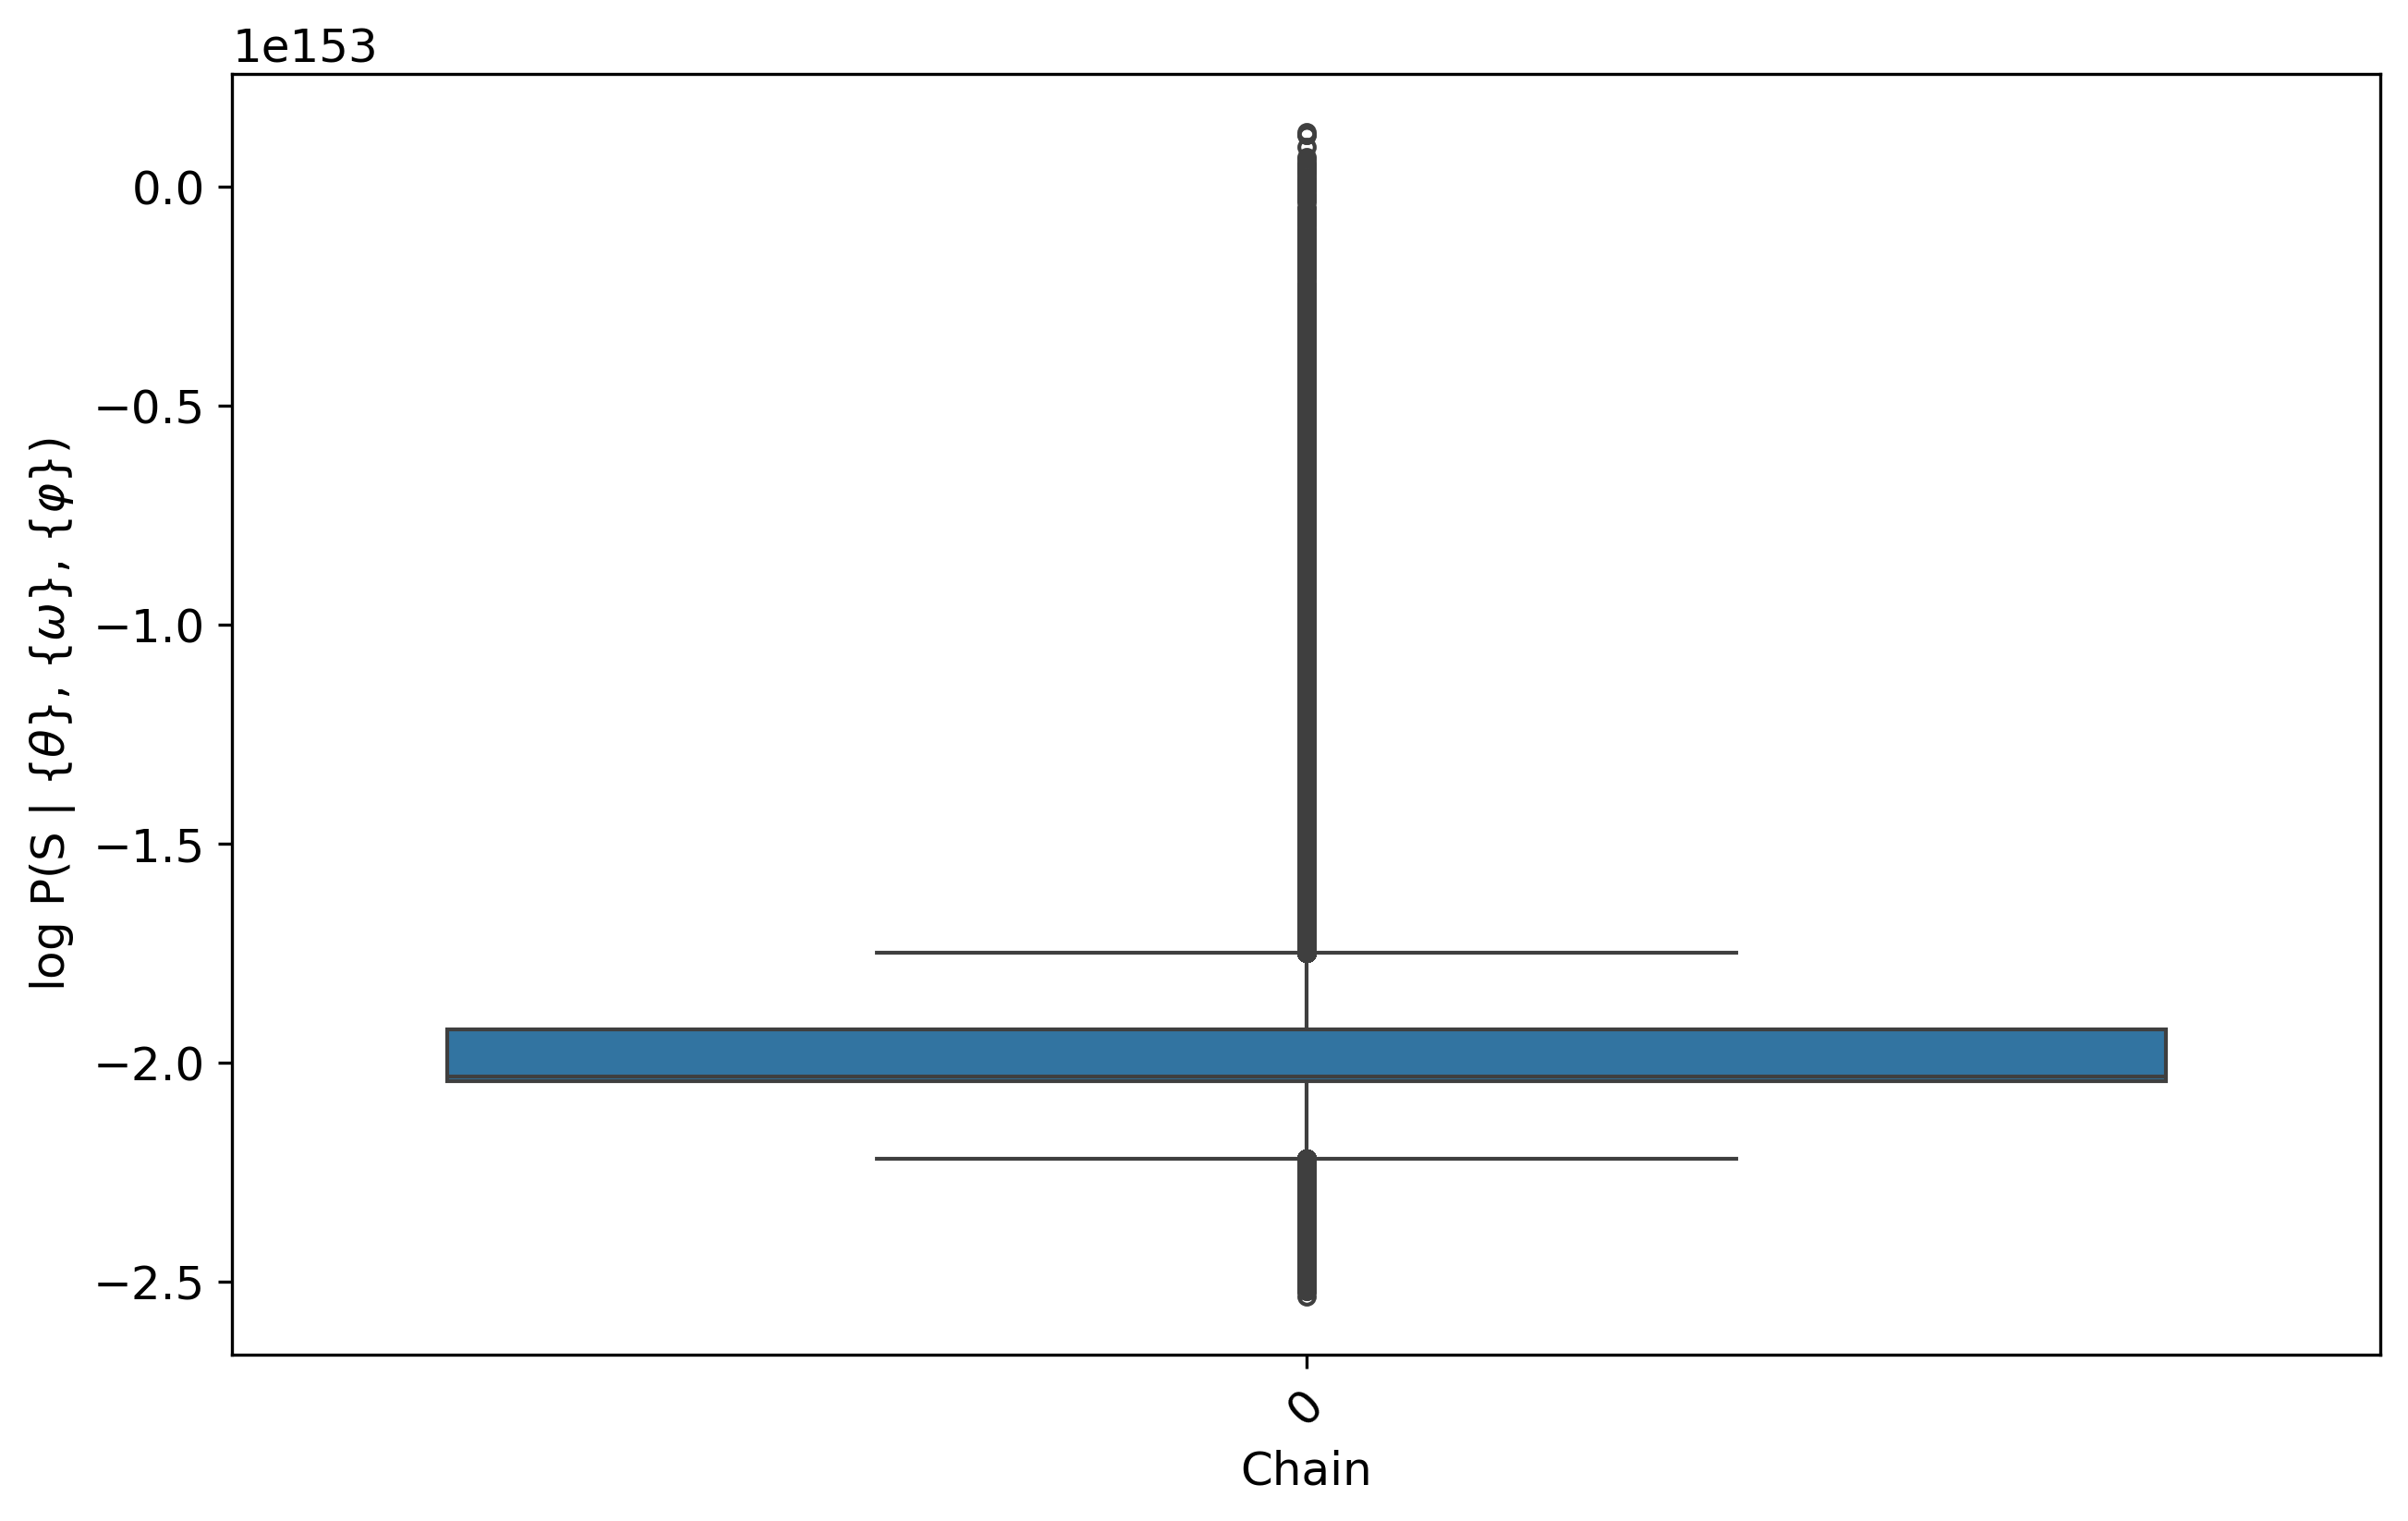

In [31]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 6))
filtered_df = energy_df_random[energy_df_random['Chain'].between(1, 20)]

sns.boxplot(data=energy_df_random, y='log_likelihood', x='Chain')#, hue='Sequence', ax=ax, fill=False)
#sns.scatterplot(x=energy_df_garcia['Chain']-1, y=energy_df_garcia['log_likelihood'], 
          #      markers='+', color ='black', ax=ax, s=100)#, x='Chain', hue='Sequence')
plt.ylabel("log P(S | {$\\theta$}, {$\\omega$}, {$\\varphi$})")
plt.xticks(rotation=45)
plt.show()
plt.close()
#overall_median = energy_df_all['log_likelihood'].quantile([0.5]).iloc[0]
#plt.axhline(y=overall_median, color='black', linestyle='--', linewidth=1, label='Median all')
#plt.savefig(os.path.join(output_path,'energy_boxplot_rand_1.png'))

/ihome/djishnu/zakaria/.local/lib/python3.10/site-packages/numpy/core/_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


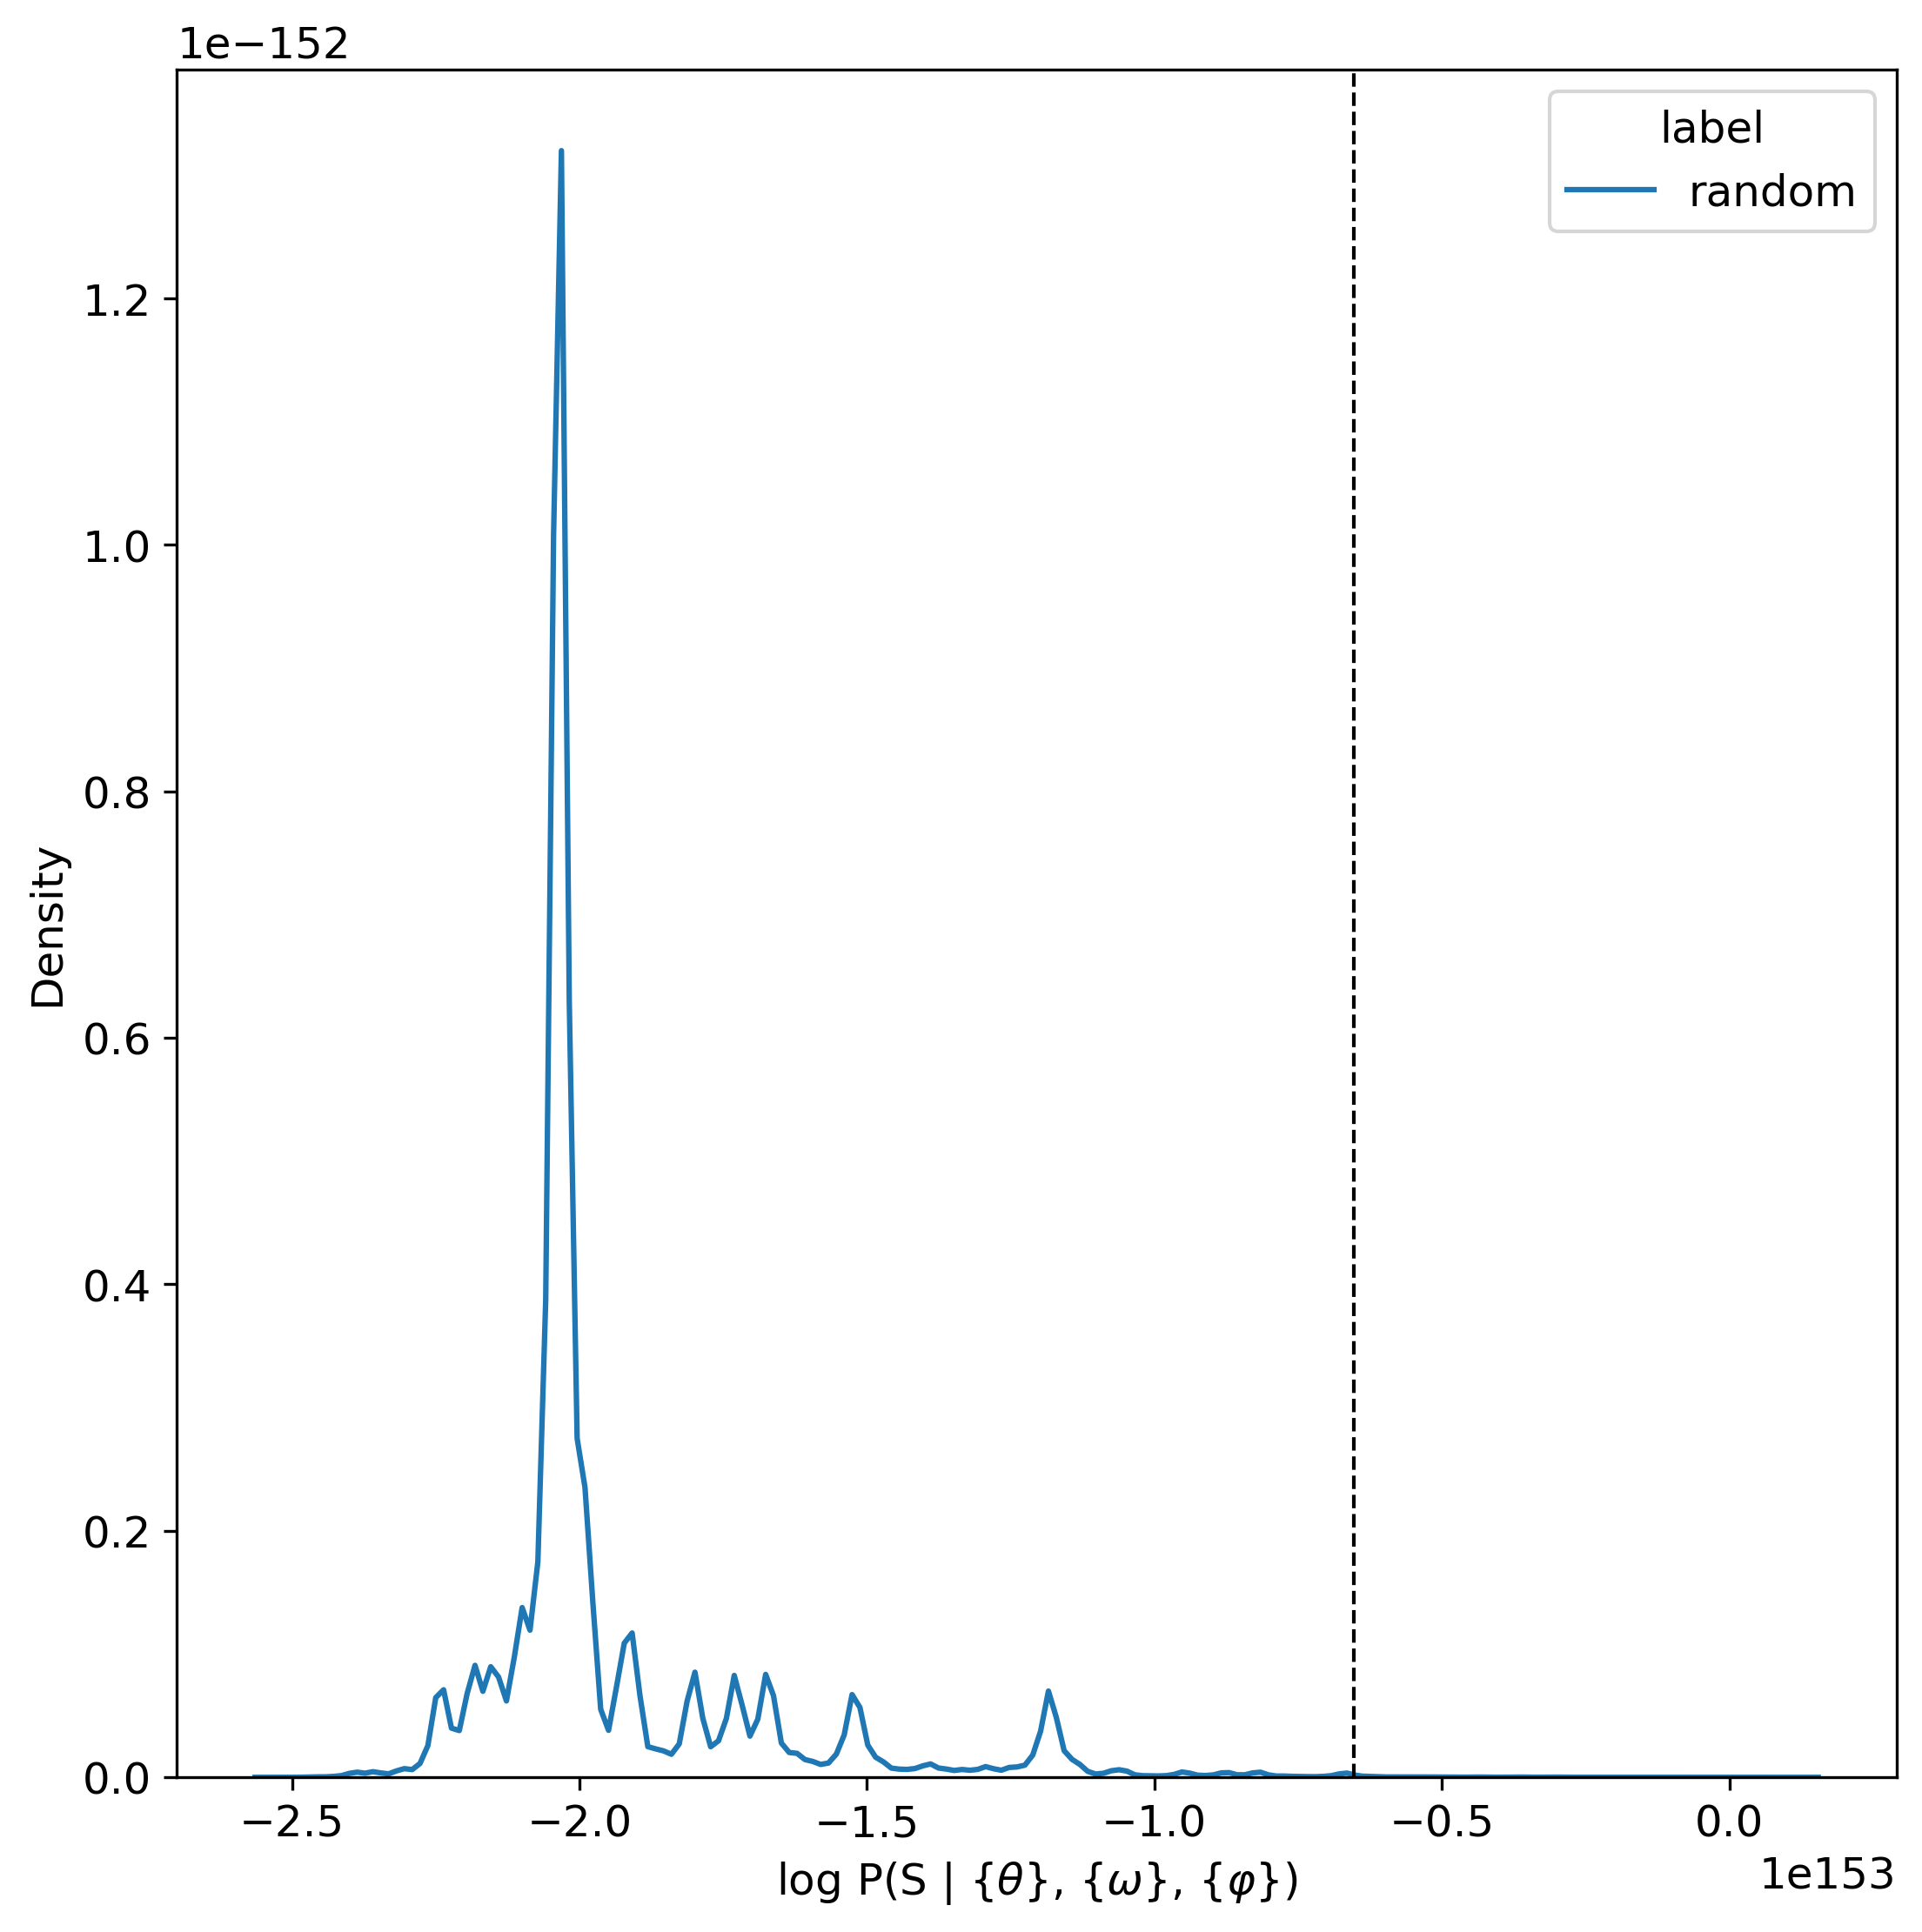

In [32]:
sns.kdeplot(data=energy_df_random, x='log_likelihood', hue='label')#, legend=False)#, stat='density', kde=True)
confidence_threshold = 0.999
lower = energy_df_random['log_likelihood'].quantile(confidence_threshold)
plt.axvline(x=lower, color='black', linestyle='--', linewidth=1, label='95%')
plt.xlabel("log P(S | {$\\theta$}, {$\\omega$}, {$\\varphi$})")
plt.savefig(f'{output_path}/energy_hist_rand_1.png')
plt.show()

# Isolating random hits

In [44]:
confidence_threshold = 0.99999
print('Random hit confidence threshold = ', confidence_threshold)
random_hit_threshold = energy_df_random['log_likelihood'].quantile(confidence_threshold)
print('log likelihood threshold value = ', random_hit_threshold)
rand_hit_ind = energy_df_random['log_likelihood']> random_hit_threshold
random_hits = energy_df_random.loc[rand_hit_ind,:]
random_hits

Random hit confidence threshold =  0.99999
log likelihood threshold value =  -1.2464601695991664e+152


,Unnamed: 0,log_likelihood,Chain,label
112491,112491,-2.077456e+148,0,random
444030,444030,-1.972075e+151,0,random
670115,670115,2.923039e+151,0,random
786334,786334,-3.716213e+150,0,random
1012871,1012871,-5.390489e+151,0,random
...,...,...,...,...
9594847,9594847,-2.725282e+150,0,random
9624709,9624709,-2.810342e+151,0,random
9724776,9724776,7.023819e+149,0,random
9826749,9826749,8.015107e+150,0,random


In [ ]:
# OR LOAD HITS
random_hits_msa_path = os.path.join(output_path, 'random_hits.fasta')
random_hits_msa = pr.parseMSA(random_hits_msa_path, aligned=True)#oppi.random_msa

top100_rand_index = np.array(random_hits.index)
random_top100 = random_hits_msa[top100_rand_index,:]
pr.writeMSA(os.path.join(output_path, 'random_hits_top100.fasta'), random_top100)

In [24]:
#top100_rand = (
#    random_hits.sort_values(by='log_likelihood', ascending=False)
#    .head(100))#.drop_duplicates('log_likelihood')
top100_rand_index = np.array(random_hits.index)
random_top100 = oppi.random_msa[top100_rand_index,:]
pr.writeMSA(os.path.join(output_path, 'random_hits_3.fasta'), random_top100)

'interfaces/sasa/multiple_chains_5/random_hits_3.fasta'

# Check hits

/scratch/slurm-1330180/ipykernel_5863/4104063904.py:10: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  summary = actual_seq_dict.iloc[:,to_mutate_alternative].describe()
/scratch/slurm-1330180/ipykernel_5863/4104063904.py:10: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  summary = actual_seq_dict.iloc[:,to_mutate_alternative].describe()
/scratch/slurm-1330180/ipykernel_5863/4104063904.py:10: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = resu

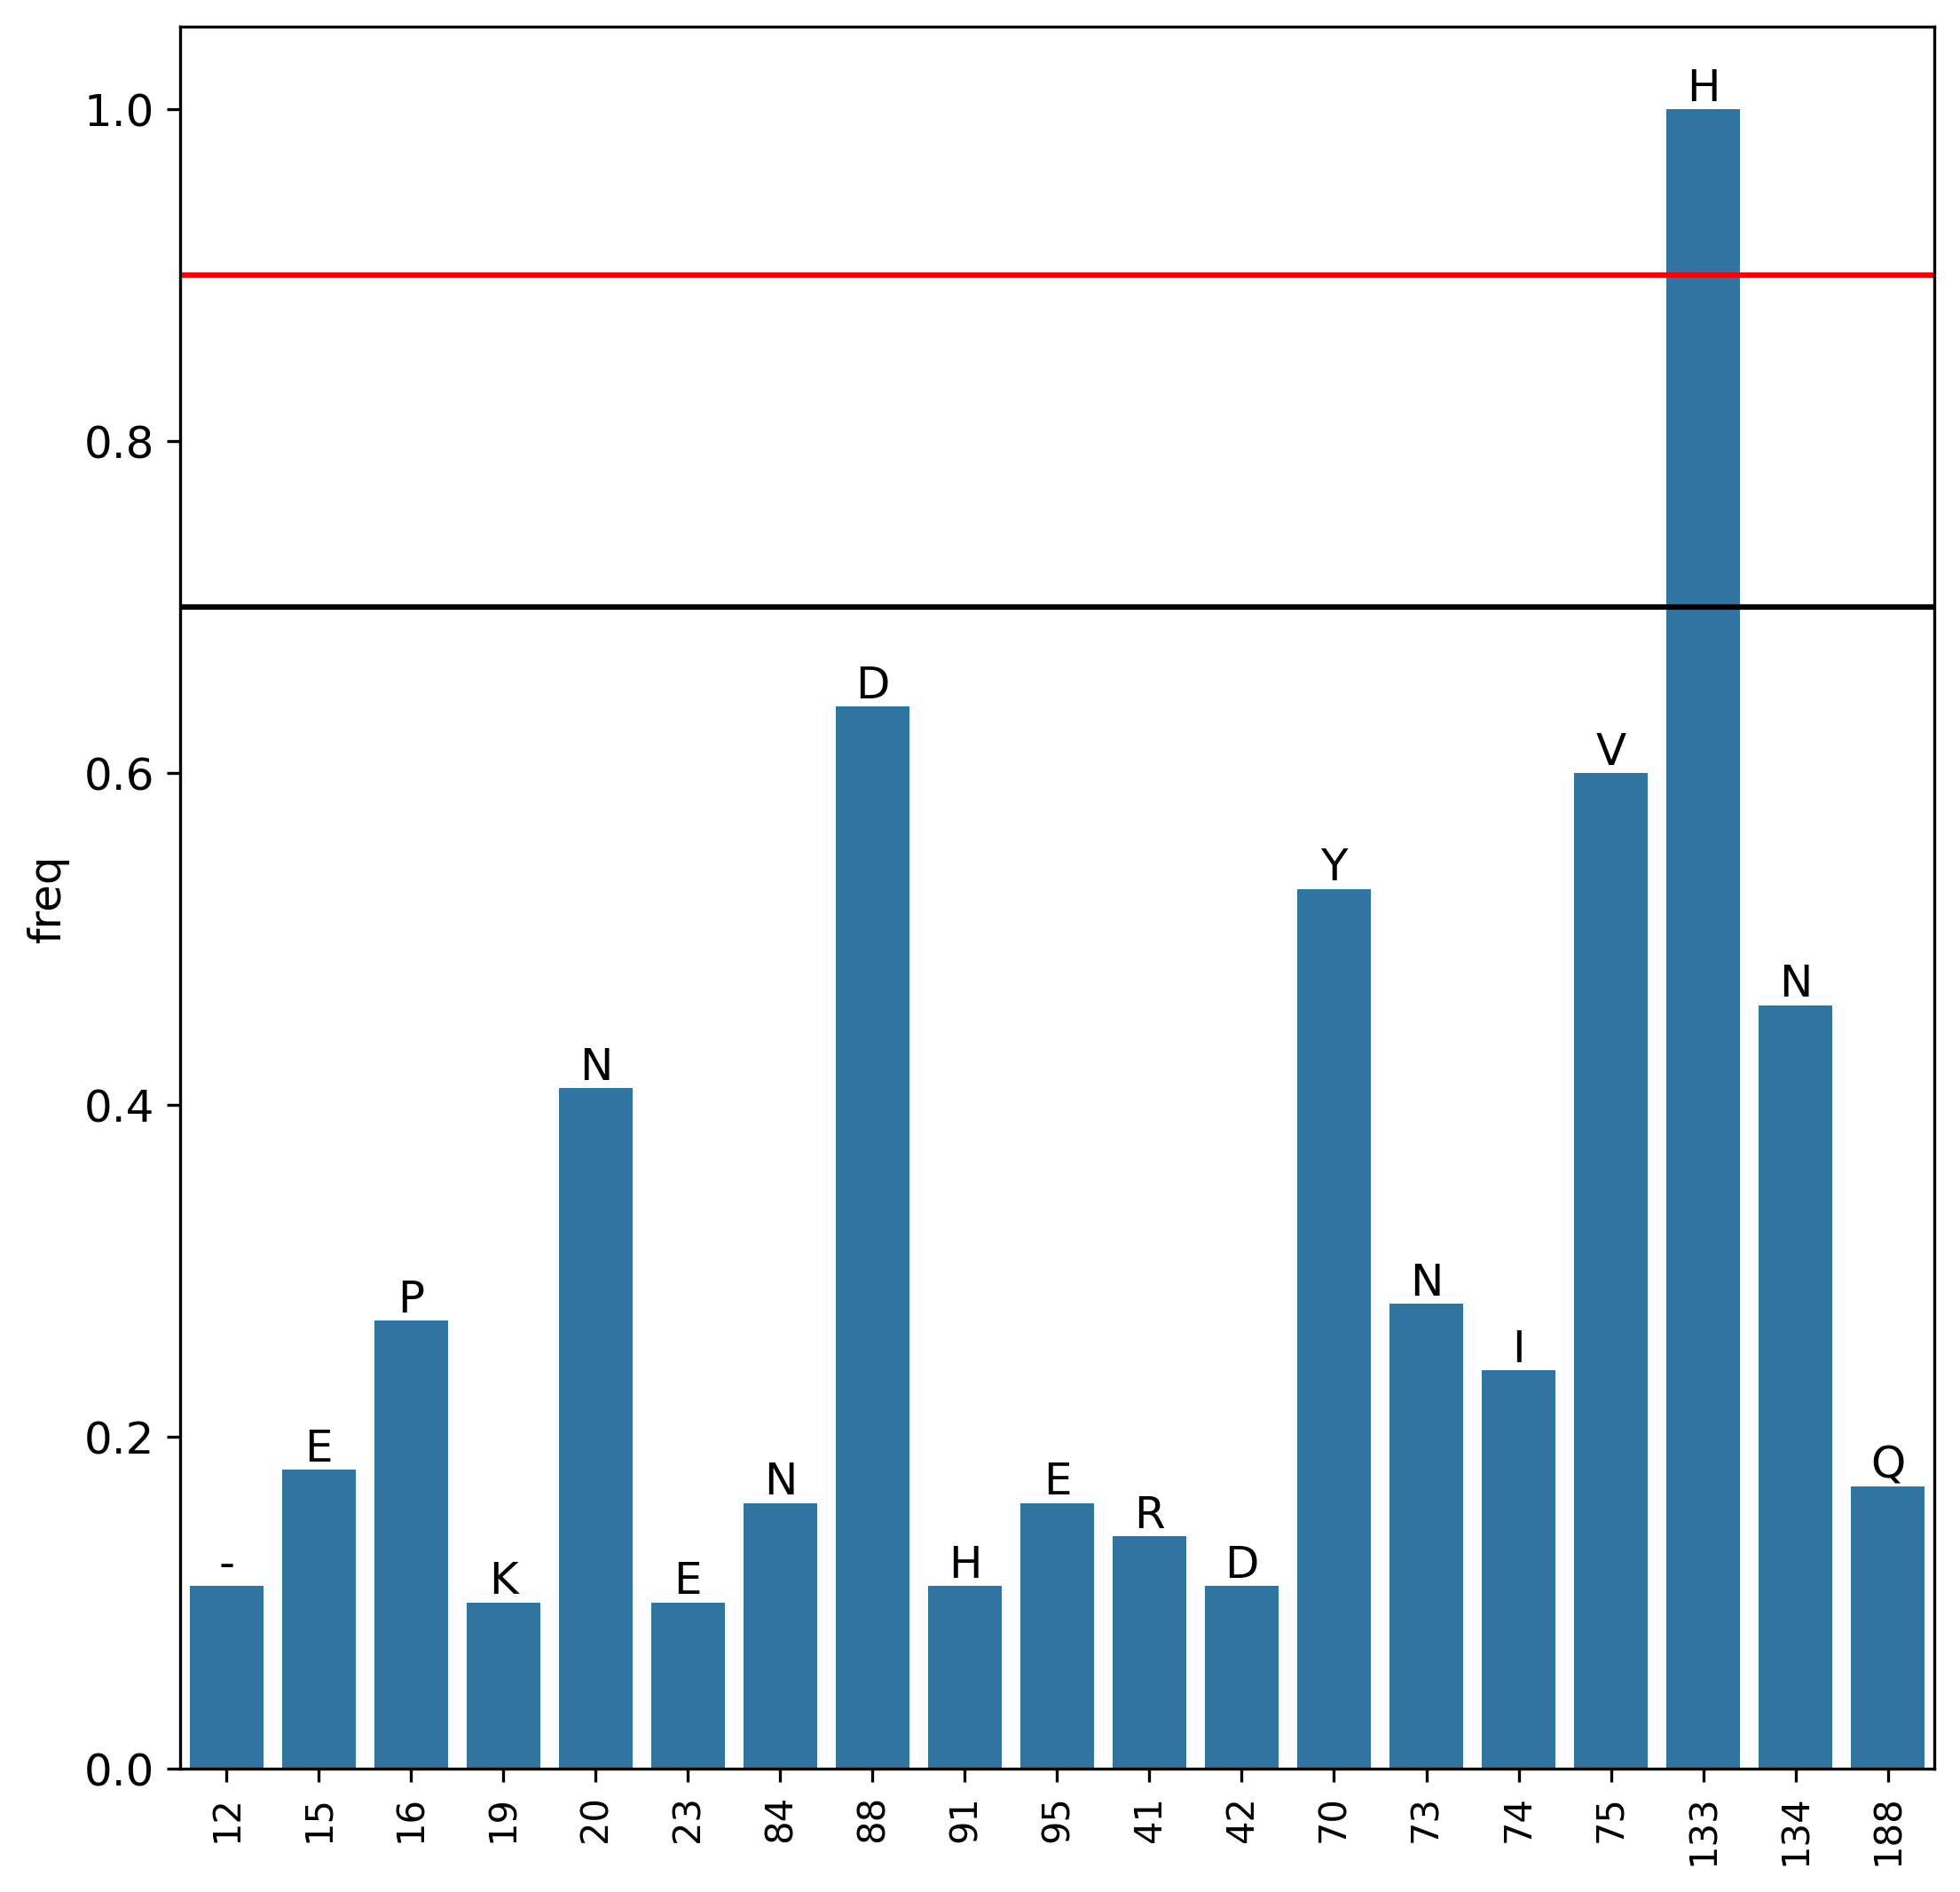

In [29]:
import pandas as pd
import seaborn as sns

######################### Ticks
IL2_ticks = np.array([12, 15, 16, 19, 20, 23, 84, 88, 91, 95])#np.array([15, 16, 19, 20, 22, 23, 81, 83])#
IL2RB_ticks = np.array([41, 42, 70, 73, 74, 75, 133, 134, 188])#np.array([133, 134])#
xticks_labels = np.append(IL2_ticks, IL2RB_ticks)
########################################################################################
actual_seq_dict = pd.DataFrame(random_top100.getArray())
summary = actual_seq_dict.iloc[:,to_mutate_alternative].describe()
interface_freq = summary.iloc[-1,:]/random_top100.numSequences()

ax = sns.barplot(interface_freq)
plt.xticks(rotation=90, fontsize=10)
plt.axhline(y=0.9, c='r')
plt.axhline(y=0.7, c='black')
plt.xticks(list(range(len(interface_freq))), xticks_labels)

for bar, label in zip(ax.patches, summary.iloc[-2,:]):
    ax.text(bar.get_x() + bar.get_width() / 2,  # Center x
            bar.get_height(),                  # Top of the bar
            label.decode('utf-8'),                             # Label text
            ha='center', va='bottom')   
plt.show(ax)
#plt.savefig('mutation_interface_8A_freq.png')

@> Sequence identity matrix was calculated in 0.00s.


<Axes: >

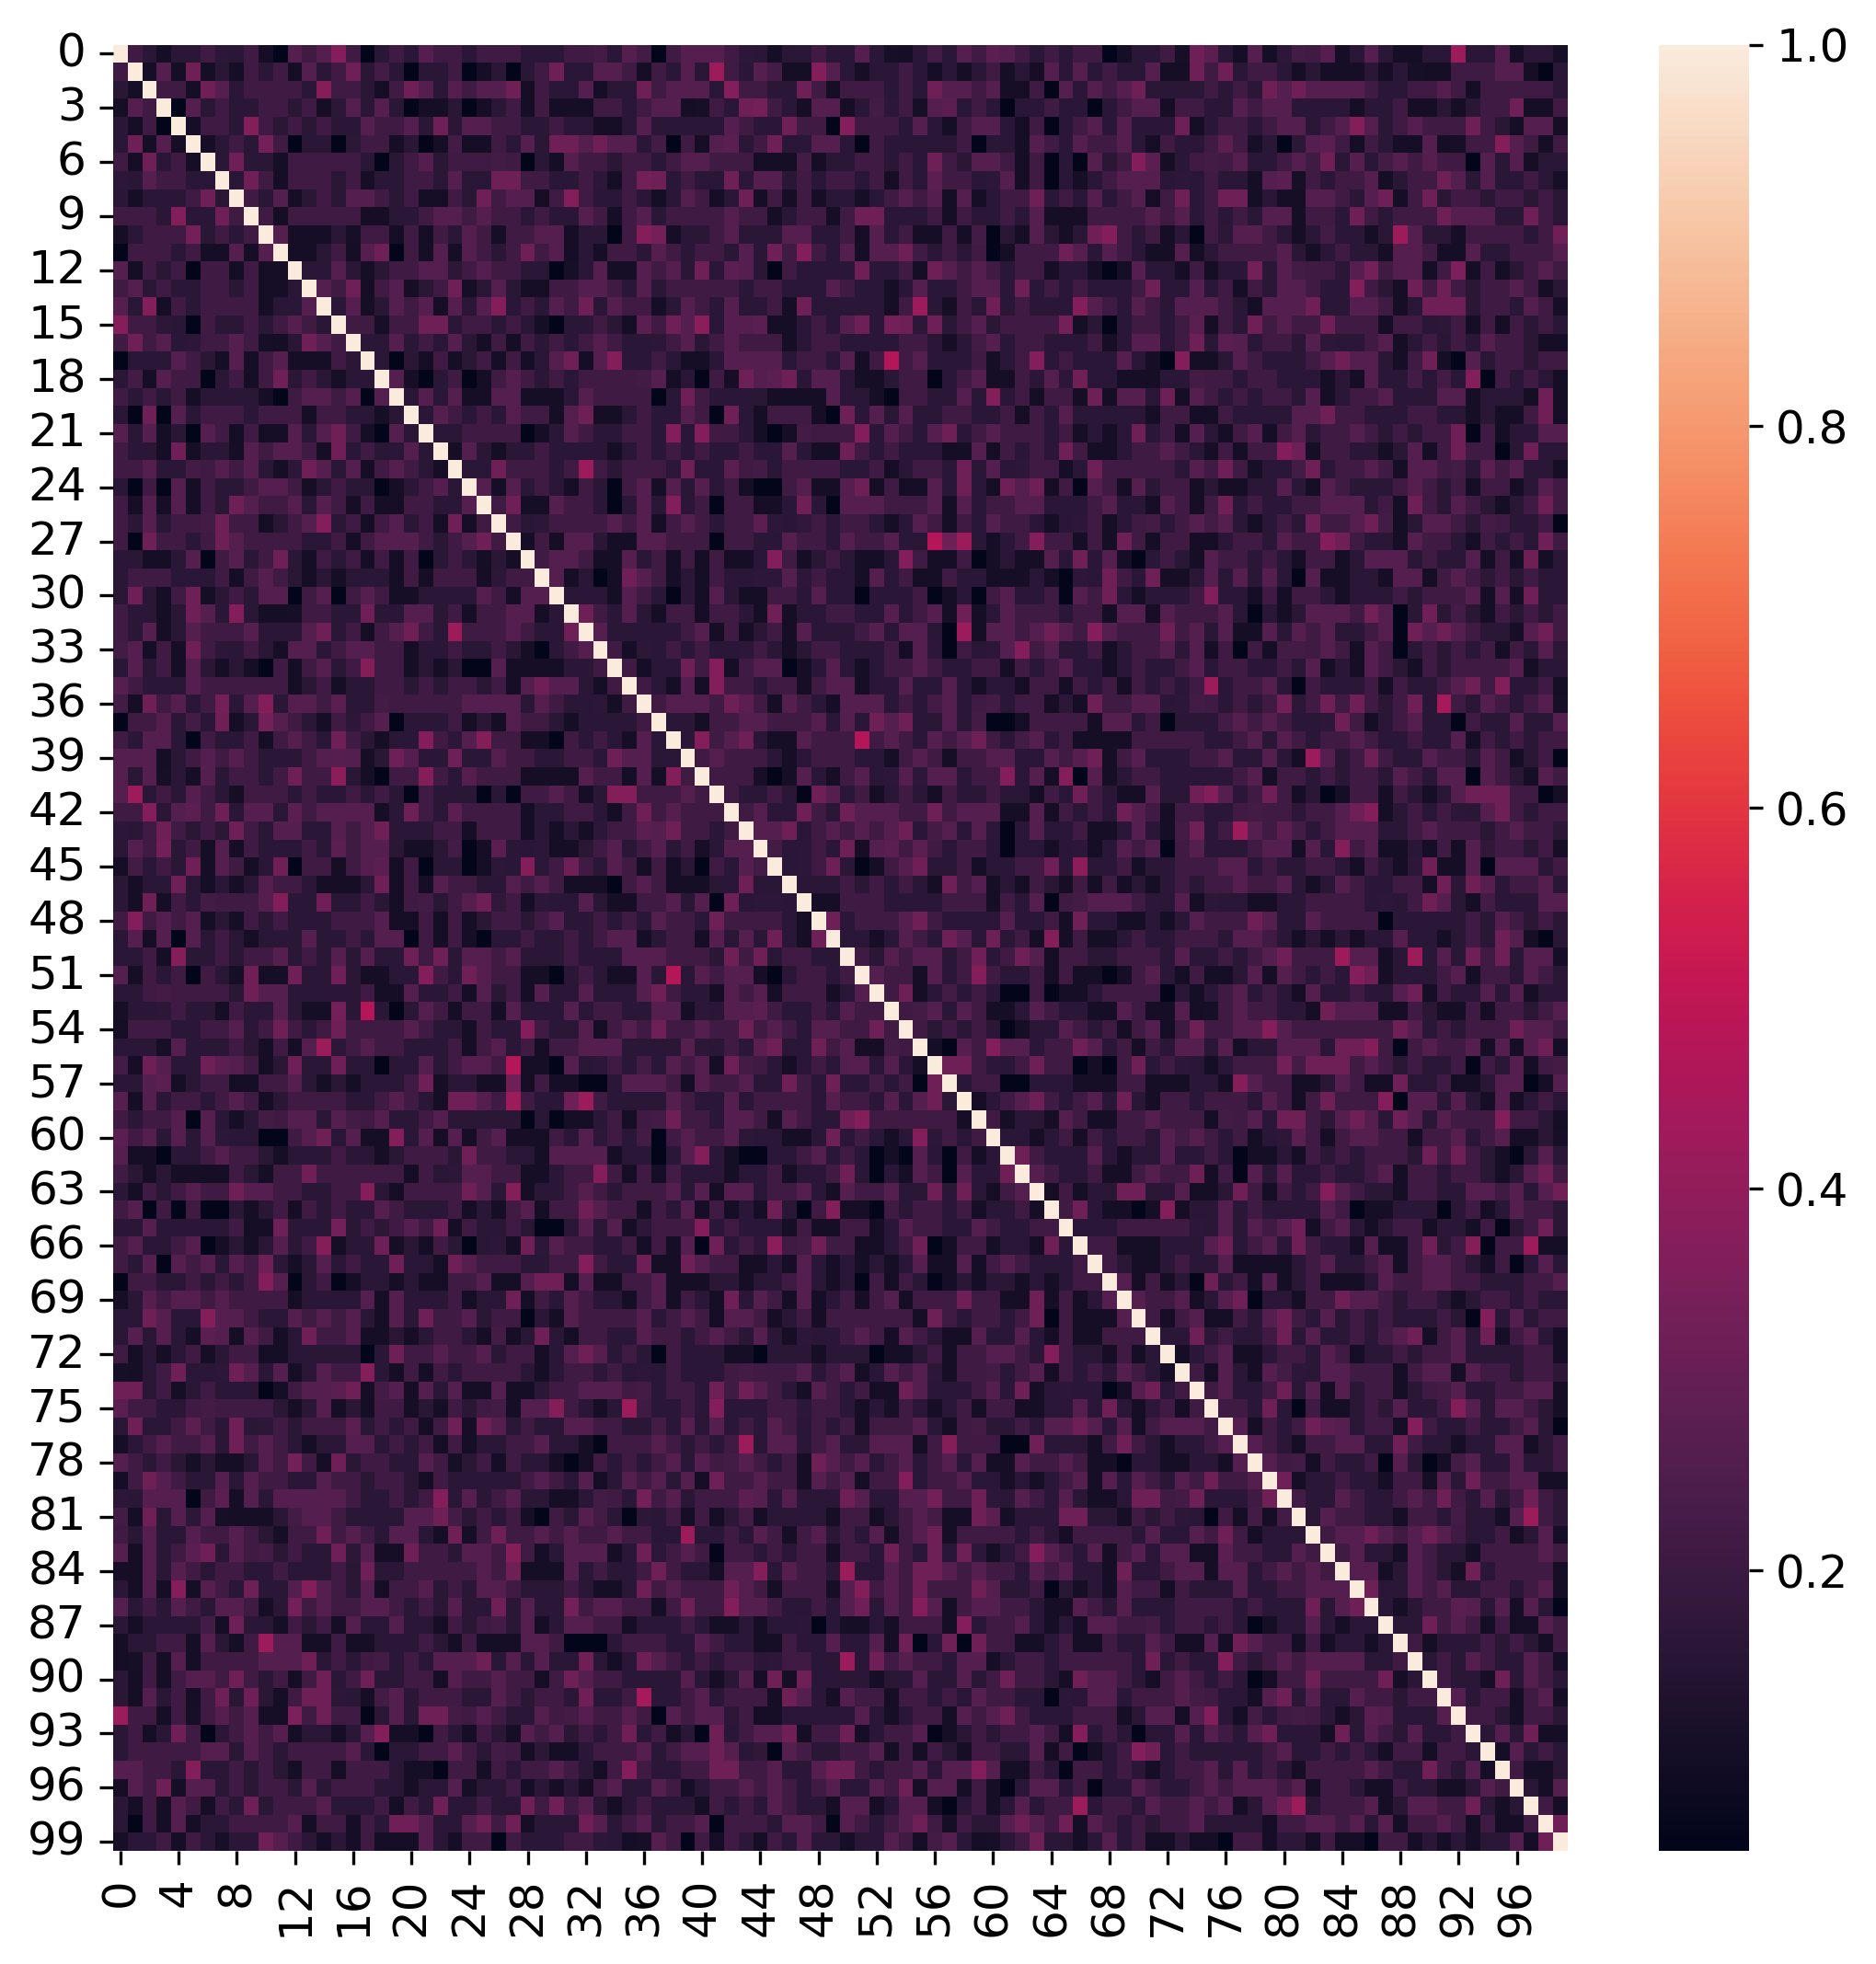

In [42]:
x = pr.buildSeqidMatrix(random_top100[:,to_mutate_alternative])
#plt.show(
sns.heatmap(x)
#plt.savefig(f'{output_path}/rndm_hits_interface_ident_mat_sampled.png')

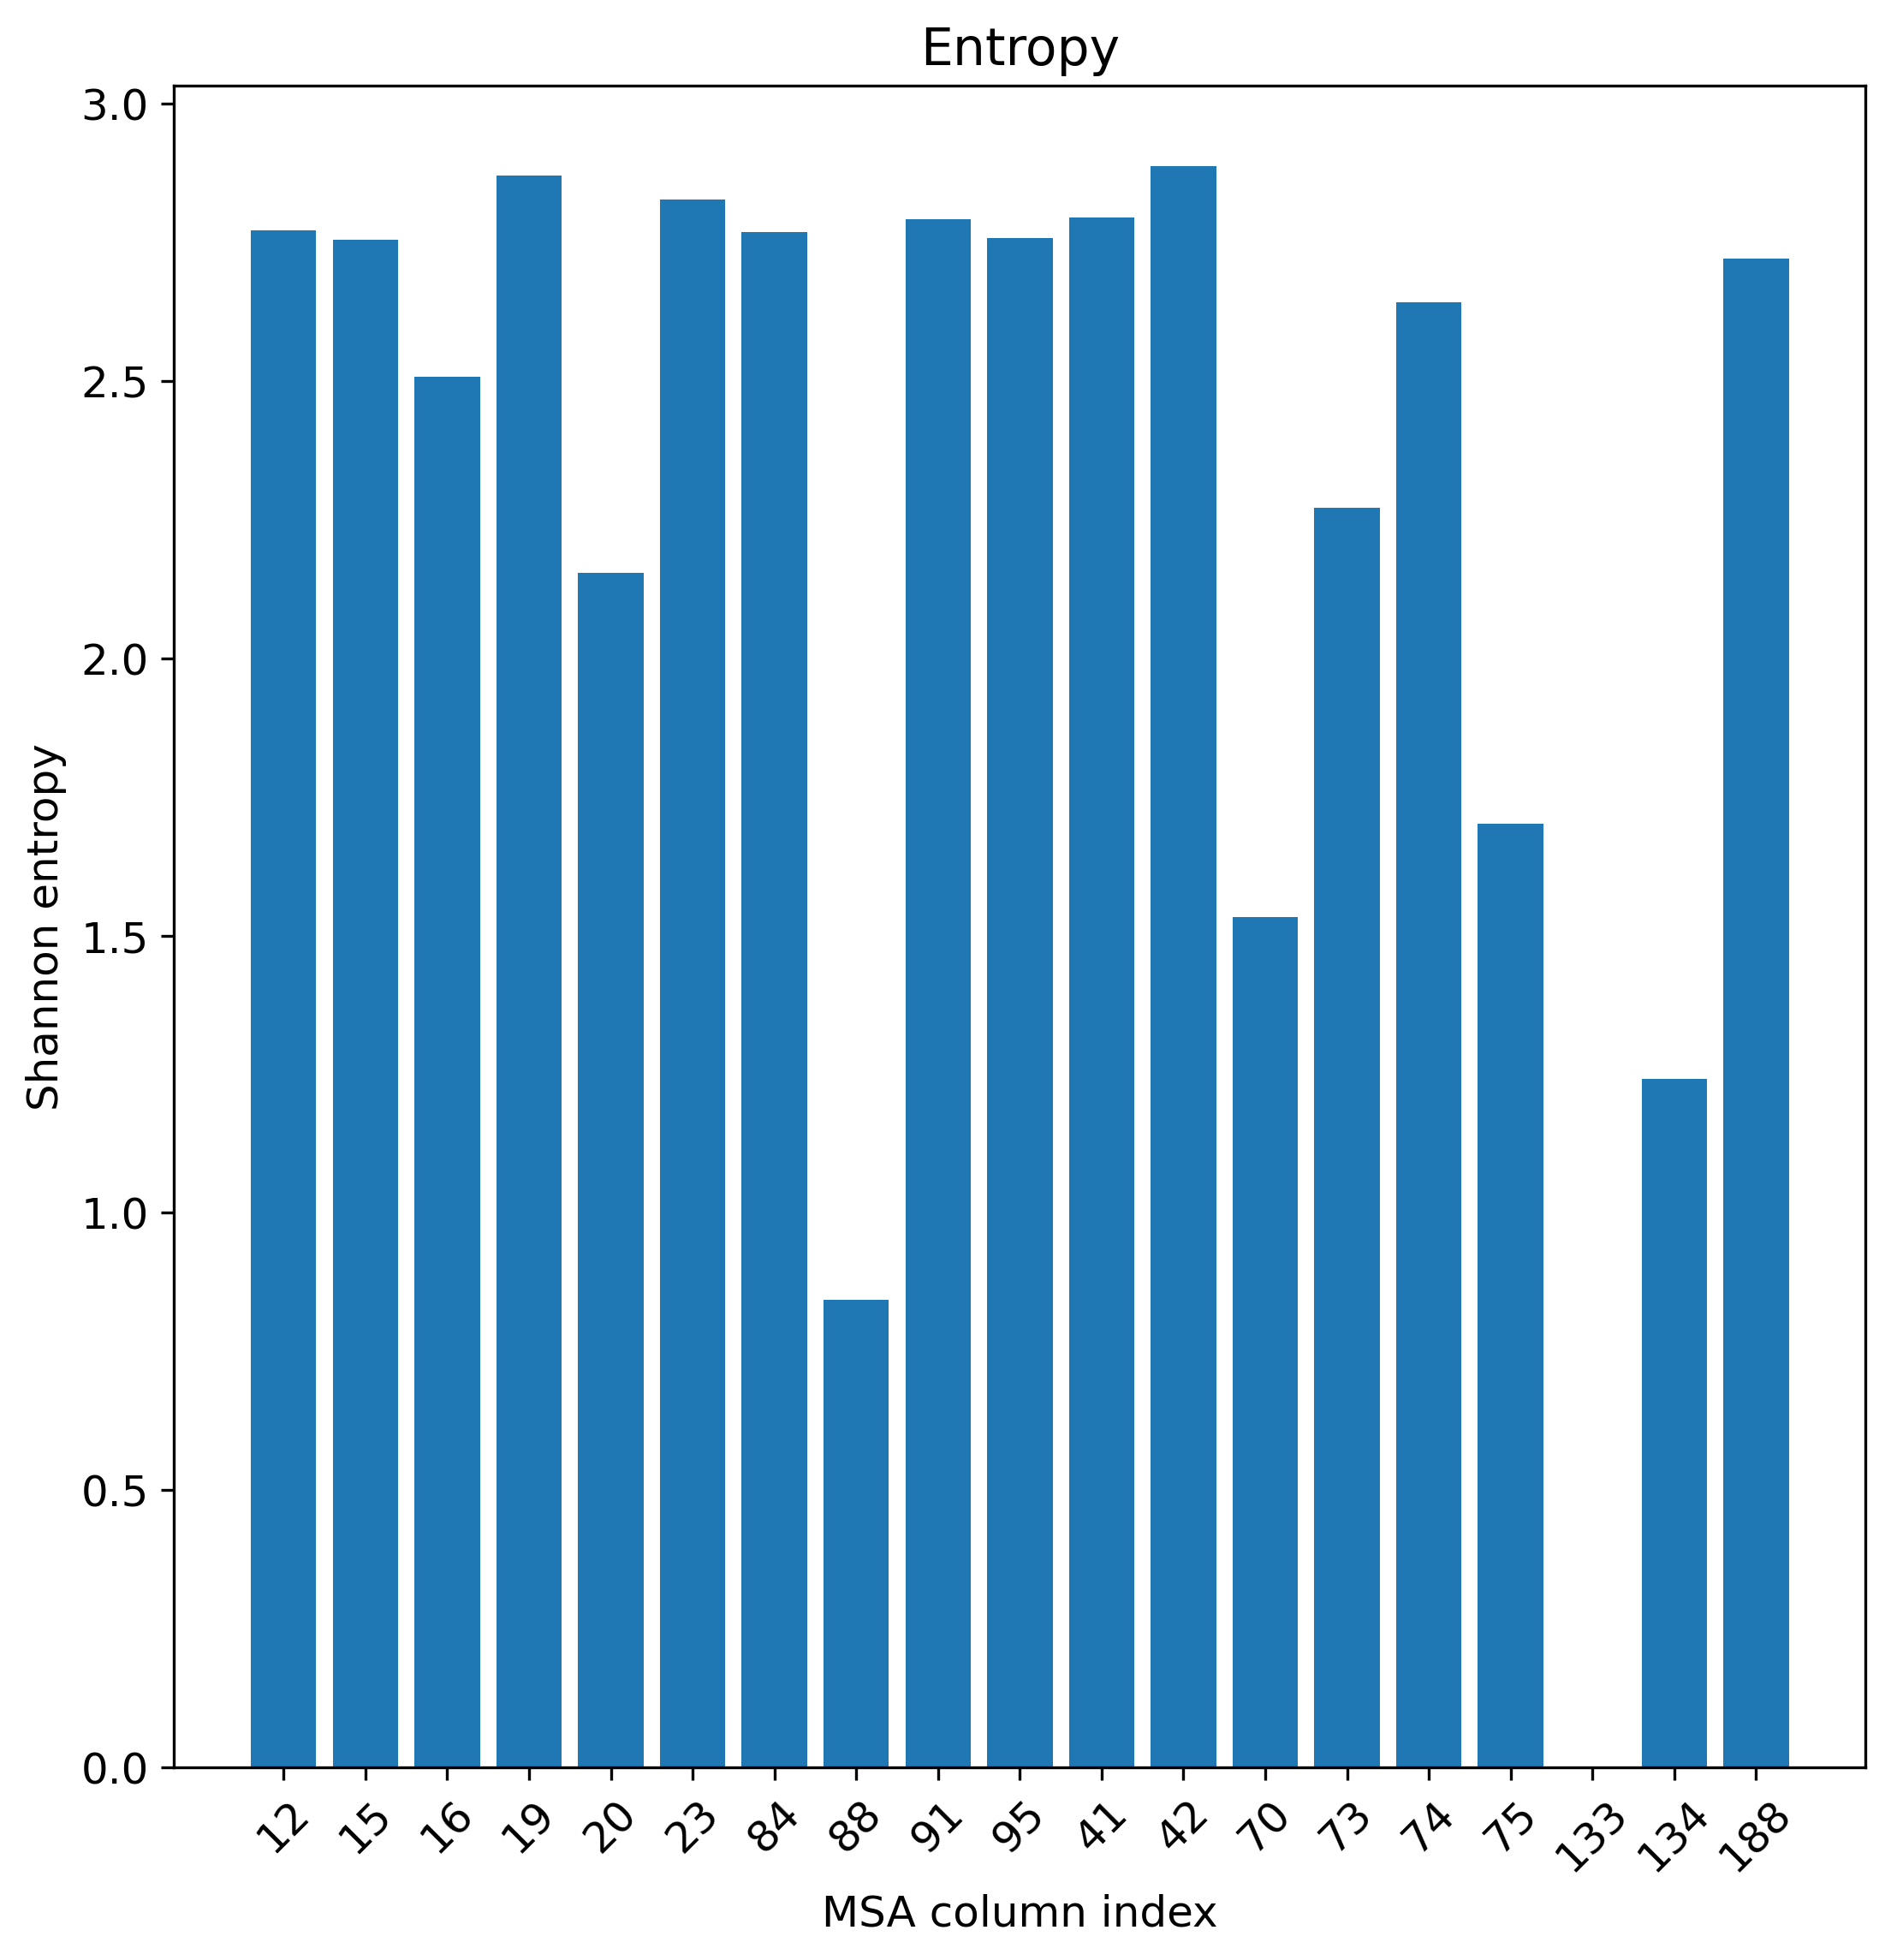

In [41]:
entropy_1 = pr.calcShannonEntropy(random_top100[:,to_mutate_alternative])#[:,to_mutate])
# interface
S = pr.showShannonEntropy(entropy_1)#[to_mutate_alternative])
# Ticks
IL2RB_ticks = np.array([41, 42, 70, 73, 74, 75, 133, 134, 188])#np.array([15, 16, 19, 20, 22, 23, 81, 83])#
IL2_ticks = np.array([12, 15, 16, 19, 20, 23, 84, 88, 91, 95])#np.array([133, 134])#
xticks_labels = np.append(IL2_ticks, IL2RB_ticks)
xticks = list(range(1,len(xticks_labels)+1))
plt.xticks(ticks=xticks, labels=xticks_labels, rotation=45)
#plt.savefig('entropy_IL2RB_interface.png', bbox_inches='tight')
plt.show(S)
#sns.barplot(S)

# AF3 prediction results

In [4]:
#### Multi replica
import os
import json
import pandas as pd
import numpy as np

af3_metrics_df = None
#'interfaces/Garcia/multiple_chains_1/AF3_models/'
where = "/ix/djishnu/Zak/AIM1-2/O-PPI_jason_lab/interfaces/Garcia/multiple_chains_3/AF3_MR_models_1/"
#'interfaces/sasa/multiple_chains_5/AF3_random_models/json/AF3_random_models/models'#
count = 0

for dir in os.listdir(where):
    source = os.path.join(where, dir)
    print('here 1')

    if os.path.isdir(source) and dir=='models':
        print('here 2')

        for pred_dir in os.listdir(source):
            pred_dir_path = os.path.join(source, pred_dir)

            if os.path.isdir(pred_dir_path):
                print('pred_dir = ', pred_dir_path)
                n_chain = pred_dir[8:]
                metrics = f'il_ilrb_{n_chain}_summary_confidences.json'
                pred_path = os.path.join(pred_dir_path , metrics)
                print('pred_path = ', pred_path)
                try:
                    with open(pred_path, "r") as f:
                        data = json.load(f)
                        ptm = data['ptm']
                        iptm = data['iptm']
                        ranking_score = data['ranking_score']
                        
                    if not count:
                        af3_metrics_df = pd.DataFrame({'ptm':ptm, 'iptm':iptm, 'ranking_score':ranking_score}, index = [int(n_chain)])
                    else:
                        af3_metrics_df_i = pd.DataFrame({'ptm':ptm, 'iptm':iptm, 'ranking_score':ranking_score}, index = [int(n_chain)])
                        af3_metrics_df = pd.concat([af3_metrics_df, af3_metrics_df_i], axis=0)
                except Exception as e:
                    print(e)
                    #pass
                    #raise Exception(e)
                count+=1

af3_metrics_df#.to_csv(f'multiple_chains_test_1_correct/AF3_models/af3_metrics_high_likelihood.csv') 

here 1
here 1
here 2
pred_dir =  /ix/djishnu/Zak/AIM1-2/O-PPI_jason_lab/interfaces/Garcia/multiple_chains_3/AF3_MR_models_1/models/il_ilrb_26
pred_path =  /ix/djishnu/Zak/AIM1-2/O-PPI_jason_lab/interfaces/Garcia/multiple_chains_3/AF3_MR_models_1/models/il_ilrb_26/il_ilrb_26_summary_confidences.json
pred_dir =  /ix/djishnu/Zak/AIM1-2/O-PPI_jason_lab/interfaces/Garcia/multiple_chains_3/AF3_MR_models_1/models/il_ilrb_14
pred_path =  /ix/djishnu/Zak/AIM1-2/O-PPI_jason_lab/interfaces/Garcia/multiple_chains_3/AF3_MR_models_1/models/il_ilrb_14/il_ilrb_14_summary_confidences.json
pred_dir =  /ix/djishnu/Zak/AIM1-2/O-PPI_jason_lab/interfaces/Garcia/multiple_chains_3/AF3_MR_models_1/models/il_ilrb_3
pred_path =  /ix/djishnu/Zak/AIM1-2/O-PPI_jason_lab/interfaces/Garcia/multiple_chains_3/AF3_MR_models_1/models/il_ilrb_3/il_ilrb_3_summary_confidences.json
pred_dir =  /ix/djishnu/Zak/AIM1-2/O-PPI_jason_lab/interfaces/Garcia/multiple_chains_3/AF3_MR_models_1/models/il_ilrb_9
pred_path =  /ix/djishnu/

,ptm,iptm,ranking_score
26,0.42,0.09,0.16
14,0.46,0.13,0.20
3,0.49,0.11,0.19
9,0.47,0.23,0.28
4,0.44,0.24,0.28
13,0.45,0.12,0.18
19,0.50,0.20,0.26
21,0.43,0.12,0.18
25,0.47,0.14,0.20
17,0.41,0.12,0.18


In [5]:
af3_hits = af3_metrics_df.loc[af3_metrics_df['iptm']>0.5,:].index
af3_hits = af3_metrics_df.loc[af3_metrics_df['ranking_score']>0.5,:].index
#np.union1d(af3_metrics_df.loc[af3_metrics_df['ptm']>0.5,:].index, af3_metrics_df.loc[af3_metrics_df['iptm']>0.5,:].index)
x = af3_metrics_df.loc[af3_hits,:]
x#.iloc[x.index>201,:]

,ptm,iptm,ranking_score


In [6]:
af3_metrics_df.shape

(27, 3)

In [12]:
import prody as pr
#'./interfaces/sasa/multiple_chains_6/generated_hits_ENS.fasta'
hits= pr.parseMSA('./interfaces/Garcia/multiple_chains_3/random_hits.fasta', aligned=True)
to_print = str(hits[0, :])
print(to_print)


@> 100 sequence(s) with 343 residues were parsed in 0.00s.


APTSSSTKKTQLQLVLLLLDLPAILNGINNYKNPKLTRMLTFKFYMPKKATELKHLQCLEEELKPLEEVLNLAQSKNFHLDPRDLISNINVIVLELKGSETTFMCEYADETATIVEFLNRWITFCQSIISTLTAVNGTSQFTCFYNSRANISCVWSQDGALQDTSCQVHAWPDRRRWNQTCELLPVSQASWACNLILGAPDSQKLTTVDIVTLRVLCREGVRWRVMAIQDFKPFENLRLMAPISLQVVHVETHRCNISWEISQASHHFERHLEFEARTLSPGHTWEEAPLLTLKQKQEWICLETLTPDTQYEFQVRVKPLQGEFTTWSPWSQPLAFRTKPAAL


In [34]:
to_correct = np.array([x if x not in to_mutate_alternative else None for x in list(range(parsed_msa_alternative.numResidues()))])
to_correct = to_correct[np.where(to_correct!=None)[0]]

In [18]:
mutant_id = 69
end_il2_signaling = 20
end_il2 = 153
to_use_il2_index = list(range(end_il2-end_il2_signaling))
to_use_il2rb_index = list(range(end_il2-end_il2_signaling, hits.numResidues()))

correct_scaffold = False

if correct_scaffold:
    x = deepcopy(parsed_msa_alternative[427])
    to_correct_ind = np.array([x if x not in to_mutate_alternative else None for x in list(range(parsed_msa_alternative.numResidues()))])
    to_correct_ind = np.array(to_correct_ind[np.where(to_correct_ind!=None)[0]], dtype=np.int32)
    hits[mutant_id].getArray()[to_correct_ind] = x.getArray()[to_correct_ind]

il2_interface = IL2_garcia
il2rb_interface = IL2RB_garcia

print(f'Mutant {mutant_id}')
print('IL2')
print(str(hits[mutant_id, to_use_il2_index]))
#il2_sasa_interface
print(f'Interface: \n{str(hits[mutant_id, il2_interface])}')
print('IL2RB')
#to_use_il2rb_index
print(str(hits[mutant_id, to_use_il2rb_index]))
print(f'Interface: \n{str(hits[mutant_id, il2rb_interface])}')
####################################################################################
print('\nCanonical human IL2-IL2RB')
print('IL2')
print(str(parsed_msa_alternative[427, to_use_il2_index]))
print(f'Interface: \n{str(parsed_msa_alternative[427, il2_interface])}')
print('IL2RB')
print(str(parsed_msa_alternative[427, to_use_il2rb_index]))
print(f'Interface: \n{str(parsed_msa_alternative[427, il2rb_interface])}')


Mutant 69
IL2
APTSSSTKKTQLQLPVLLLDLTNILNGINNYKNPKLTRMLTFKFYMPKKATELKHLQCLEEELKPLEEVLNLAQSKNFHLDPRDLISNINVIVLELKGSETTFMCEYADETATIVEFLNRWITFCQSIISTLT
Interface: 
PVLDTNDN
IL2RB
AVNGTSQFTCFYNSRANISCVWSQDGALQDTSCQVHAWPDRRRWNQTCELLPVSQASWACNLILGAPDSQKLTTVDIVTLRVLCREGVRWRVMAIQDFKPFENLRLMAPISLQVVHVETHRCNISWEISQASHIFERHLEFEARTLSPGHTWEEAPLLTLKQKQEWICLETLTPDTQYEFQVRVKPLQGEFTTWSPWSQPLAFRTKPAAL
Interface: 
HI

Canonical human IL2-IL2RB
IL2
APTSSSTKKTQLQLEHLLLDLQMILNGINNYKNPKLTRMLTFKFYMPKKATELKHLQCLEEELKPLEEVLNLAQSKNFHLRPRDLISNINVIVLELKGSETTFMCEYADETATIVEFLNRWITFCQSIISTLT
Interface: 
EHLDQMRN
IL2RB
AVNGTSQFTCFYNSRANISCVWSQDGALQDTSCQVHAWPDRRRWNQTCELLPVSQASWACNLILGAPDSQKLTTVDIVTLRVLCREGVRWRVMAIQDFKPFENLRLMAPISLQVVHVETHRCNISWEISQASHYFERHLEFEARTLSPGHTWEEAPLLTLKQKQEWICLETLTPDTQYEFQVRVKPLQGEFTTWSPWSQPLAFRTKPAAL
Interface: 
HY


In [12]:
from copy import deepcopy
x = deepcopy(parsed_msa_alternative[427])
#print(x)
#print('interface : ', to_mutate_alternative
x.getArray()[to_mutate_alternative] = hits[mutant_id].getArray()[to_mutate_alternative]
#print(x)


APTSSSTKKTQGQLNSLLHFLQRILNGINNYKNPKLTRMLTFKFYMPKKATELKHLQCLEEELKPLEEVLNLAQSKNFHLRPR-LISMINKIVLWLKGSETTFMCEYADETATIVEFLNRWITFCQSIISTLTAVNGTSQFTCFYNSRANISCVWSQDGALQDTSCQVHAWPDKARWNQTCELLPVSQASWACNLILGAPDSGKLTKVDIVTLRVLCREGVRWRVMAIQDFKPFENLRLMAPISLQVVHVETHRCNISWEISQASPAFERHLEFEARTLSPGHTWEEAPLLTLKQKQEWICLETLTPDTQYEFQVRVKPLQGEFTTWSPWSQPLAFRTKPAAL
interface :  [ 11  14  15  18  19  22  83  87  90  94 173 174 202 205 206 207 265 266
 320]
APTSSSTKKTQGQLNSLLHFLQRILNGINNYKNPKLTRMLTFKFYMPKKATELKHLQCLEEELKPLEEVLNLAQSKNFHLRPR-LISMINKIVLWLKGSETTFMCEYADETATIVEFLNRWITFCQSIISTLTAVNGTSQFTCFYNSRANISCVWSQDGALQDTSCQVHAWPDKARWNQTCELLPVSQASWACNLILGAPDSGKLTKVDIVTLRVLCREGVRWRVMAIQDFKPFENLRLMAPISLQVVHVETHRCNISWEISQASPAFERHLEFEARTLSPGHTWEEAPLLTLKQKQEWICLETLTPDTQYEFQVRVKPLQGEFTTWSPWSQPLAFRTKPAAL


In [74]:
parsed_msa_alternative[427, to_use_il2_index]

<Sequence: PW2vLBED51QtVw6cA40Y |receptor id| P60568| Taxa |taxID:9606 |soluble id| P14784 | Taxa | taxID:9606 Interleukin-2 || Interleukin-2 receptor subunit beta || (length 133; 133 residues and 0 gaps)>